In [1]:
import scipy.io as sio
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
import math
import time
import torch
from torch import nn
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
import math
import time


from tqdm import tqdm

from models.apl import *
from models.densenet import *
# from models.apl_plus import *

In [2]:
data_amp = sio.loadmat('data/train_data_split_amp.mat')
train_data_amp = data_amp['train_data']
train_data = train_data_amp
# data_pha = sio.loadmat('data/train_data_split_pha.mat')
# train_data_pha = data_pha['train_data']
# train_data = np.concatenate((train_data_amp,train_data_pha),1)

train_activity_label = data_amp['train_activity_label']
train_location_label = data_amp['train_location_label']
train_label = np.concatenate((train_activity_label, train_location_label), 1)

In [3]:
data_amp = sio.loadmat('data/test_data_split_amp.mat')
test_data_amp = data_amp['test_data']
test_data = test_data_amp
# data_pha = sio.loadmat('data/test_data_split_pha.mat')
# test_data_pha = data_pha['test_data']
# test_data = np.concatenate((test_data_amp,test_data_pha), 1)

test_activity_label = data_amp['test_activity_label']
test_location_label = data_amp['test_location_label']
test_label = np.concatenate((test_activity_label, test_location_label), 1)

In [4]:
import pandas as pd

In [5]:
data = np.concatenate((train_data,test_data), 0)

In [6]:
label = np.concatenate((train_label,test_label), 0)

In [7]:
# label_df.shape

In [8]:
# label_df

In [9]:
val_index = [3,
 4,
 13,
 22,
 26,
 1121,
 41,
 37,
 48,
 53,
 64,
 65,
 76,
 74,
 87,
 1136,
 92,
 97,
 1141,
 98,
 118,
 109,
 129,
 125,
 134,
 1149,
 149,
 148,
 1154,
 154,
 173,
 164,
 1159,
 179,
 194,
 190,
 208,
 198,
 213,
 218,
 229,
 1171,
 232,
 242,
 250,
 251,
 260,
 1180,
 267,
 271,
 279,
 277,
 299,
 288,
 1191,
 1192,
 1194,
 322,
 323,
 1197,
 336,
 334,
 350,
 355,
 367,
 365,
 377,
 371,
 387,
 1212,
 395,
 403,
 408,
 413,
 422,
 419,
 436,
 1225,
 1227,
 1228,
 1231,
 1230,
 464,
 471,
 476,
 485,
 488,
 1237,
 506,
 1241,
 512,
 522,
 527,
 532,
 542,
 1250,
 549,
 557,
 570,
 563,
 1260,
 579,
 1263,
 593,
 605,
 603,
 613,
 1268,
 625,
 623,
 639,
 629,
 645,
 1276,
 661,
 1278,
 669,
 664,
 675,
 680,
 688,
 1287,
 708,
 702,
 717,
 1294,
 723,
 726,
 735,
 1299,
 1302,
 748,
 767,
 759,
 776,
 777,
 786,
 1313,
 802,
 805,
 817,
 815,
 821,
 1322,
 835,
 839,
 852,
 843,
 855,
 865,
 869,
 1334,
 1335,
 882,
 895,
 892,
 909,
 912,
 920,
 915,
 927,
 1349,
 945,
 938,
 1353,
 1354,
 972,
 971,
 980,
 979,
 1364,
 990,
 997,
 998,
 1010,
 1013,
 1026,
 1373,
 1034,
 1036,
 1047,
 1055,
 1061,
 1062,
 1071,
 1077,
 1083,
 1086,
 1097,
 1093,
 1111,
 1393]

In [10]:
test_index = [7,
 1116,
 15,
 1118,
 32,
 1122,
 43,
 1125,
 49,
 47,
 61,
 56,
 70,
 71,
 84,
 85,
 88,
 93,
 107,
 106,
 117,
 112,
 1145,
 1146,
 136,
 131,
 141,
 1153,
 156,
 157,
 175,
 1157,
 1160,
 176,
 195,
 192,
 1166,
 200,
 220,
 1168,
 226,
 1172,
 234,
 240,
 247,
 248,
 257,
 265,
 1182,
 270,
 1185,
 285,
 289,
 1189,
 304,
 300,
 320,
 314,
 325,
 326,
 343,
 339,
 356,
 352,
 1206,
 363,
 369,
 379,
 386,
 382,
 1214,
 394,
 1219,
 410,
 426,
 425,
 439,
 438,
 445,
 443,
 460,
 452,
 475,
 474,
 1236,
 479,
 494,
 495,
 503,
 500,
 516,
 1244,
 523,
 1248,
 537,
 1251,
 554,
 1254,
 1255,
 560,
 1258,
 1259,
 1261,
 591,
 1264,
 1265,
 609,
 611,
 617,
 1270,
 1273,
 634,
 648,
 643,
 654,
 653,
 1282,
 663,
 685,
 1284,
 695,
 1288,
 1292,
 705,
 716,
 1295,
 1297,
 729,
 744,
 1300,
 1304,
 753,
 1306,
 1305,
 772,
 771,
 1311,
 1312,
 803,
 1315,
 810,
 813,
 819,
 822,
 841,
 836,
 846,
 850,
 1330,
 1329,
 872,
 1333,
 881,
 1336,
 900,
 890,
 913,
 908,
 1344,
 916,
 932,
 1348,
 1352,
 948,
 953,
 951,
 967,
 963,
 974,
 982,
 985,
 984,
 1366,
 999,
 1017,
 1011,
 1023,
 1028,
 1038,
 1039,
 1377,
 1378,
 1059,
 1057,
 1385,
 1078,
 1081,
 1386,
 1102,
 1101,
 1107,
 1392]

In [11]:
train_index = []
for i in range(1394):
    if i not in val_index and i not in test_index:
        train_index.append(i)

In [12]:
len(train_index)

1010

In [13]:
label

array([[4, 9],
       [4, 9],
       [4, 9],
       ...,
       [0, 7],
       [0, 8],
       [0, 8]], dtype=uint8)

In [30]:
train_data = data[train_index]
val_data = data[val_index]
test_data = data[test_index]

train_label = label[train_index]
val_label = label[val_index]
test_label = label[test_index]

# Parameters

In [31]:
batch_size = 64
num_epochs = 600

In [32]:
num_train_instances = len(train_data)

train_data = torch.from_numpy(train_data).type(torch.FloatTensor)
train_label = torch.from_numpy(train_label).type(torch.LongTensor)
# train_data = train_data.view(num_train_instances, 1, -1)
# train_label = train_label.view(num_train_instances, 2)

train_dataset = TensorDataset(train_data, train_label)
train_data_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

In [33]:
num_test_instances = len(test_data)

test_data = torch.from_numpy(test_data).type(torch.FloatTensor)
test_label = torch.from_numpy(test_label).type(torch.LongTensor)
# test_data = test_data.view(num_test_instances, 1, -1)
# test_label = test_label.view(num_test_instances, 2)

test_dataset = TensorDataset(test_data, test_label)
test_data_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# DenseNet

In [34]:
aplnet = DenseNet()
# aplnet = ResNet(block=BasicBlock, layers=[1, 1, 1, 1], inchannel=52)
# aplnet = ResNet(block=BasicBlock, layers=[2, 2, 2, 2], inchannel=52)
# aplnet = ResNet(block=BasicBlock, layers=[3, 4, 6, 3], inchannel=52)
#

# aplnet = ResNet(block=Bottleneck, layers=[2, 3, 4, 6])

aplnet = aplnet.cuda()

criterion = nn.CrossEntropyLoss(size_average=False).cuda()

optimizer = torch.optim.Adam(aplnet.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer,
                                                #  milestones=[10, 20, 30, 40, 60, 70, 80, 90, 100, 110, 120, 130,
                                                #              140, 150, 160, 170, 180, 190, 200, 250, 300, 350, 
                                                #              400, 450, 500, 550, 600],
                                                milestones = [i for i in range(20,600,20)],
                                                 gamma=0.5)

this training is using densenet
mau masuk block 1 in_planes sebanyak  128
keluar block 1 in_planes sebanyak  640
mau masuk block 2 in_planes sebanyak  320
in_planes sebanyak  1344


In [35]:
train_loss_act = np.zeros([num_epochs, 1])
train_loss_loc = np.zeros([num_epochs, 1])
test_loss_act = np.zeros([num_epochs, 1])
test_loss_loc = np.zeros([num_epochs, 1])
train_acc_act = np.zeros([num_epochs, 1])
train_acc_loc = np.zeros([num_epochs, 1])
test_acc_act = np.zeros([num_epochs, 1])
test_acc_loc = np.zeros([num_epochs, 1])

In [36]:
for epoch in range(num_epochs):
    print('Epoch:', epoch)
    aplnet.train()
    scheduler.step()
    # for i, (samples, labels) in enumerate(train_data_loader):
    loss_x = 0
    loss_y = 0
    for (samples, labels) in tqdm(train_data_loader):
        samplesV = Variable(samples.cuda())
        labels_act = labels[:, 0].squeeze()
        labels_loc = labels[:, 1].squeeze()
        labelsV_act = Variable(labels_act.cuda())
        labelsV_loc = Variable(labels_loc.cuda())

        # Forward + Backward + Optimize
        optimizer.zero_grad()
        predict_label_act, predict_label_loc,_,_,_,_,_,_ = aplnet(samplesV)

        loss_act = criterion(predict_label_act, labelsV_act)
        loss_loc = criterion(predict_label_loc, labelsV_loc)

        loss = loss_act + loss_loc
        # loss = loss_loc
        # print(loss.item())
        loss.backward()
        optimizer.step()

        # loss = loss1+0.5*loss2+0.25*loss3+0.25*loss4
        # loss = loss1+loss2+loss3+loss4

        loss_x += loss_act.item()
        loss_y += loss_loc.item()

        # loss.backward()
        # optimizer.step()

    train_loss_act[epoch] = loss_x / num_train_instances
    train_loss_loc[epoch] = loss_y / num_train_instances

    aplnet.eval()
    # loss_x = 0
    correct_train_act = 0
    correct_train_loc = 0
    for i, (samples, labels) in enumerate(train_data_loader):
        with torch.no_grad():
            samplesV = Variable(samples.cuda())
            labels = labels.squeeze()

            labels_act = labels[:, 0].squeeze()
            labels_loc = labels[:, 1].squeeze()
            labelsV_act = Variable(labels_act.cuda())
            labelsV_loc = Variable(labels_loc.cuda())

            predict_label_act, predict_label_loc,_,_,_,_,_,_ = aplnet(samplesV)

            prediction = predict_label_loc.data.max(1)[1]
            correct_train_loc += prediction.eq(labelsV_loc.data.long()).sum()

            prediction = predict_label_act.data.max(1)[1]
            correct_train_act += prediction.eq(labelsV_act.data.long()).sum()

            loss_act = criterion(predict_label_act, labelsV_act)
            loss_loc = criterion(predict_label_loc, labelsV_loc)
            # loss_x += loss.item()

    print("Activity Training accuracy:", (100 * float(correct_train_act) / num_train_instances))
    print("Location Training accuracy:", (100 * float(correct_train_loc) / num_train_instances))
    print("Activity Training loss:", loss_x / num_train_instances )
    print("Location Training loss:", loss_y / num_train_instances)

    # train_loss[epoch] = loss_x / num_train_instances
    train_acc_act[epoch] = 100 * float(correct_train_act) / num_train_instances
    train_acc_loc[epoch] = 100 * float(correct_train_loc) / num_train_instances


    trainacc_act = str(100 * float(correct_train_act) / num_train_instances)[0:6]
    trainacc_loc = str(100 * float(correct_train_loc) / num_train_instances)[0:6]
    

    loss_x = 0
    loss_y = 0
    correct_test_act = 0
    correct_test_loc = 0
    for i, (samples, labels) in enumerate(test_data_loader):
        with torch.no_grad():
            samplesV = Variable(samples.cuda())
            labels_act = labels[:, 0].squeeze()
            labels_loc = labels[:, 1].squeeze()
            labelsV_act = Variable(labels_act.cuda())
            labelsV_loc = Variable(labels_loc.cuda())

        predict_label_act, predict_label_loc,_,_,_,_,_,_ = aplnet(samplesV)
        prediction = predict_label_act.data.max(1)[1]
        correct_test_act += prediction.eq(labelsV_act.data.long()).sum()

        prediction = predict_label_loc.data.max(1)[1]
        correct_test_loc += prediction.eq(labelsV_loc.data.long()).sum()

        loss_act = criterion(predict_label_act, labelsV_act)
        loss_loc = criterion(predict_label_loc, labelsV_loc)
        loss_x += loss_act.item()
        loss_y += loss_loc.item()

    print("Activity Test accuracy:", (100 * float(correct_test_act) / num_test_instances))
    print("Location Test accuracy:", (100 * float(correct_test_loc) / num_test_instances))
    print("Activity Test loss:", loss_x / num_test_instances )
    print("Location Test loss:", loss_y / num_test_instances)

    test_loss_act[epoch] = loss_x / num_test_instances
    test_acc_act[epoch] = 100 * float(correct_test_act) / num_test_instances

    test_loss_loc[epoch] = loss_y / num_test_instances
    test_acc_loc[epoch] = 100 * float(correct_test_loc) / num_test_instances

    testacc_act = str(100 * float(correct_test_act) / num_test_instances)[0:6]
    testacc_loc = str(100 * float(correct_test_loc) / num_test_instances)[0:6]

    if epoch == 0:
        temp_test = correct_test_act
        temp_train = correct_train_act
    elif correct_test_act > temp_test:
        torch.save(aplnet, 'weights_densenet/net1111epoch' + str(
            epoch) + 'Train' + trainacc_act + 'Test' + testacc_act + 'Train' + trainacc_loc + 'Test' + testacc_loc + '.pkl')

        temp_test = correct_test_act
        temp_train = correct_train_act


# for learning curves
sio.savemat(
    'result/net1111TrainLossAct_Train' + str(100 * float(temp_train) / num_train_instances)[
                                                                 0:6] + 'Test' + str(
        100 * float(temp_test) / num_test_instances)[0:6] + '.mat', {'train_loss': train_loss_act})
sio.savemat(
    'result/net1111TestLossACT_Train' + str(100 * float(temp_train) / num_train_instances)[
                                                                0:6] + 'Test' + str(
        100 * float(temp_test) / num_test_instances)[0:6] + '.mat', {'test_loss': test_loss_act})
sio.savemat(
    'result/net1111TrainLossLOC_Train' + str(100 * float(temp_train) / num_train_instances)[
                                 0:6] + 'Test' + str(
        100 * float(temp_test) / num_test_instances)[0:6] + '.mat', {'train_loss': train_loss_loc})
sio.savemat(
    'result/net1111TestLossLOC_Train' + str(100 * float(temp_train) / num_train_instances)[
                                 0:6] + 'Test' + str(
        100 * float(temp_test) / num_test_instances)[0:6] + '.mat', {'test_loss': test_loss_loc})

sio.savemat('result/net1111TrainAccuracyACT_Train' + str(
    100 * float(temp_train) / num_train_instances)[0:6] + 'Test' + str(100 * float(temp_test) / num_test_instances)[
                                                                   0:6] + '.mat', {'train_acc': train_acc_act})
sio.savemat('result/net1111TestAccuracyACT_Train' + str(
    100 * float(temp_train) / num_train_instances)[0:6] + 'Test' + str(100 * float(temp_test) / num_test_instances)[
                                                                   0:6] + '.mat', {'test_acc': test_acc_act})
print(str(100 * float(temp_test) / num_test_instances)[0:6])

sio.savemat('result/net1111TrainAccuracyLOC_Train' + str(
    100 * float(temp_train) / num_train_instances)[0:6] + 'Test' + str(100 * float(temp_test) / num_test_instances)[
                                                                   0:6] + '.mat', {'train_acc': train_acc_loc})
sio.savemat('result/net1111TestAccuracyLOC_Train' + str(
    100 * float(temp_train) / num_train_instances)[0:6] + 'Test' + str(100 * float(temp_test) / num_test_instances)[
                                                                   0:6] + '.mat', {'test_acc': test_acc_loc})

Epoch: 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.57it/s]


Activity Training accuracy: 17.02970297029703
Location Training accuracy: 6.435643564356436
Activity Training loss: 1.9137121597138962
Location Training loss: 1.6093411058482556
Activity Test accuracy: 16.666666666666668
Location Test accuracy: 6.25
Activity Test loss: 1.8391971190770466
Location Test loss: 3.9954988161722818
Epoch: 1


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.61it/s]


Activity Training accuracy: 17.02970297029703
Location Training accuracy: 6.336633663366337
Activity Training loss: 1.7862465962324992
Location Training loss: 0.8089823618973836
Activity Test accuracy: 16.666666666666668
Location Test accuracy: 6.25
Activity Test loss: 1.8417739868164062
Location Test loss: 5.145620981852214
Epoch: 2


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.62it/s]


Activity Training accuracy: 16.93069306930693
Location Training accuracy: 6.237623762376238
Activity Training loss: 1.7147828659208695
Location Training loss: 0.5756357778417002
Activity Test accuracy: 16.666666666666668
Location Test accuracy: 6.25
Activity Test loss: 1.8716632922490437
Location Test loss: 7.34508482615153
Epoch: 3


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 74.30it/s]


Activity Training accuracy: 17.722772277227723
Location Training accuracy: 14.257425742574258
Activity Training loss: 1.6311722254989172
Location Training loss: 0.5043192665175636
Activity Test accuracy: 18.229166666666668
Location Test accuracy: 11.979166666666666
Activity Test loss: 1.8927601178487141
Location Test loss: 4.8257215817769366
Epoch: 4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.19it/s]


Activity Training accuracy: 21.18811881188119
Location Training accuracy: 32.277227722772274
Activity Training loss: 1.5871640724710898
Location Training loss: 0.45718815491931275
Activity Test accuracy: 20.3125
Location Test accuracy: 32.8125
Activity Test loss: 1.959493080774943
Location Test loss: 3.8226300875345864
Epoch: 5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 73.33it/s]


Activity Training accuracy: 17.92079207920792
Location Training accuracy: 16.633663366336634
Activity Training loss: 1.546749424698329
Location Training loss: 0.43449389202759997
Activity Test accuracy: 19.791666666666668
Location Test accuracy: 15.625
Activity Test loss: 2.077915628751119
Location Test loss: 7.1013766924540205
Epoch: 6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 73.88it/s]


Activity Training accuracy: 17.128712871287128
Location Training accuracy: 24.653465346534652
Activity Training loss: 1.5432521253529161
Location Training loss: 0.40098846737701116
Activity Test accuracy: 17.708333333333332
Location Test accuracy: 23.4375
Activity Test loss: 3.2172457377115884
Location Test loss: 4.12541937828064
Epoch: 7


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.36it/s]


Activity Training accuracy: 23.26732673267327
Location Training accuracy: 22.77227722772277
Activity Training loss: 1.4699695020619006
Location Training loss: 0.3221741846292326
Activity Test accuracy: 20.833333333333332
Location Test accuracy: 23.958333333333332
Activity Test loss: 1.8256133794784546
Location Test loss: 4.307086149851481
Epoch: 8


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.80it/s]


Activity Training accuracy: 16.138613861386137
Location Training accuracy: 15.94059405940594
Activity Training loss: 1.439941149418897
Location Training loss: 0.3467518154937442
Activity Test accuracy: 19.270833333333332
Location Test accuracy: 16.666666666666668
Activity Test loss: 10.93685539563497
Location Test loss: 20.0043462117513
Epoch: 9


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.06it/s]


Activity Training accuracy: 16.435643564356436
Location Training accuracy: 20.396039603960396
Activity Training loss: 1.4033331389474397
Location Training loss: 0.29402201718623094
Activity Test accuracy: 15.104166666666666
Location Test accuracy: 21.354166666666668
Activity Test loss: 10.148907621701559
Location Test loss: 9.687674522399902
Epoch: 10


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.01it/s]


Activity Training accuracy: 16.93069306930693
Location Training accuracy: 6.732673267326732
Activity Training loss: 1.3379928362251508
Location Training loss: 0.2892301361159523
Activity Test accuracy: 16.145833333333332
Location Test accuracy: 6.25
Activity Test loss: 28.249239444732666
Location Test loss: 42.328304290771484
Epoch: 11


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.57it/s]


Activity Training accuracy: 23.366336633663366
Location Training accuracy: 24.257425742574256
Activity Training loss: 1.294728945741559
Location Training loss: 0.2596016515599619
Activity Test accuracy: 20.833333333333332
Location Test accuracy: 25.0
Activity Test loss: 3.1060752471288047
Location Test loss: 4.552496274312337
Epoch: 12


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.17it/s]


Activity Training accuracy: 18.316831683168317
Location Training accuracy: 13.366336633663366
Activity Training loss: 1.2921574356532333
Location Training loss: 0.2371265996800791
Activity Test accuracy: 17.1875
Location Test accuracy: 14.0625
Activity Test loss: 10.36905829111735
Location Test loss: 18.954545338948567
Epoch: 13


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.77it/s]


Activity Training accuracy: 20.89108910891089
Location Training accuracy: 14.752475247524753
Activity Training loss: 1.2700448064520808
Location Training loss: 0.294266147424679
Activity Test accuracy: 21.875
Location Test accuracy: 14.583333333333334
Activity Test loss: 9.147141456604004
Location Test loss: 27.716702779134113
Epoch: 14


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.87it/s]


Activity Training accuracy: 16.03960396039604
Location Training accuracy: 20.396039603960396
Activity Training loss: 1.2042615002924852
Location Training loss: 0.24500232403821284
Activity Test accuracy: 16.666666666666668
Location Test accuracy: 18.75
Activity Test loss: 8.183090686798096
Location Test loss: 16.102335294087727
Epoch: 15


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.24it/s]


Activity Training accuracy: 18.712871287128714
Location Training accuracy: 24.95049504950495
Activity Training loss: 1.1675633156653678
Location Training loss: 0.23668984044896493
Activity Test accuracy: 19.270833333333332
Location Test accuracy: 21.875
Activity Test loss: 14.11207660039266
Location Test loss: 13.406368891398111
Epoch: 16


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.16it/s]


Activity Training accuracy: 23.96039603960396
Location Training accuracy: 12.871287128712872
Activity Training loss: 1.1351750591013692
Location Training loss: 0.23834232386976184
Activity Test accuracy: 25.520833333333332
Location Test accuracy: 14.0625
Activity Test loss: 7.246773878733317
Location Test loss: 12.034761110941568
Epoch: 17


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.51it/s]


Activity Training accuracy: 17.128712871287128
Location Training accuracy: 18.712871287128714
Activity Training loss: 1.2107364956695255
Location Training loss: 0.23825506739097066
Activity Test accuracy: 16.666666666666668
Location Test accuracy: 17.708333333333332
Activity Test loss: 29.680644353230793
Location Test loss: 28.586222966512043
Epoch: 18


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.60it/s]


Activity Training accuracy: 21.386138613861387
Location Training accuracy: 27.722772277227723
Activity Training loss: 1.1485927317402151
Location Training loss: 0.23519075459772998
Activity Test accuracy: 21.354166666666668
Location Test accuracy: 28.645833333333332
Activity Test loss: 7.096431573232015
Location Test loss: 11.372515678405762
Epoch: 19


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.84it/s]


Activity Training accuracy: 31.584158415841586
Location Training accuracy: 32.97029702970297
Activity Training loss: 0.9625119124308671
Location Training loss: 0.16766914235483302
Activity Test accuracy: 28.645833333333332
Location Test accuracy: 36.458333333333336
Activity Test loss: 3.1096909840901694
Location Test loss: 6.933347225189209
Epoch: 20


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.07it/s]


Activity Training accuracy: 20.198019801980198
Location Training accuracy: 45.445544554455445
Activity Training loss: 0.947460654230401
Location Training loss: 0.18082169211737
Activity Test accuracy: 19.791666666666668
Location Test accuracy: 43.75
Activity Test loss: 4.705418427785237
Location Test loss: 2.230048576990763
Epoch: 21


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.71it/s]


Activity Training accuracy: 36.53465346534654
Location Training accuracy: 49.603960396039604
Activity Training loss: 0.8582095420006478
Location Training loss: 0.1519348654416528
Activity Test accuracy: 36.458333333333336
Location Test accuracy: 47.916666666666664
Activity Test loss: 2.1055245399475098
Location Test loss: 2.947014093399048
Epoch: 22


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.47it/s]


Activity Training accuracy: 41.386138613861384
Location Training accuracy: 71.48514851485149
Activity Training loss: 0.8418073559751605
Location Training loss: 0.14122522774309215
Activity Test accuracy: 39.0625
Location Test accuracy: 68.22916666666667
Activity Test loss: 2.545308470726013
Location Test loss: 0.9764444430669149
Epoch: 23


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.05it/s]


Activity Training accuracy: 38.415841584158414
Location Training accuracy: 44.257425742574256
Activity Training loss: 0.7816654243091545
Location Training loss: 0.1375311266077627
Activity Test accuracy: 39.0625
Location Test accuracy: 42.1875
Activity Test loss: 3.0874557495117188
Location Test loss: 6.573969999949138
Epoch: 24


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.98it/s]


Activity Training accuracy: 24.554455445544555
Location Training accuracy: 61.08910891089109
Activity Training loss: 0.7283814534102336
Location Training loss: 0.13608279558691647
Activity Test accuracy: 21.354166666666668
Location Test accuracy: 59.895833333333336
Activity Test loss: 6.019788106282552
Location Test loss: 1.5477226575215657
Epoch: 25


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.99it/s]


Activity Training accuracy: 57.12871287128713
Location Training accuracy: 63.366336633663366
Activity Training loss: 0.7218247045384776
Location Training loss: 0.14191033580515644
Activity Test accuracy: 53.125
Location Test accuracy: 65.10416666666667
Activity Test loss: 1.5537615617116292
Location Test loss: 1.2946843306223552
Epoch: 26


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.82it/s]


Activity Training accuracy: 28.316831683168317
Location Training accuracy: 39.20792079207921
Activity Training loss: 0.7003714268750484
Location Training loss: 0.12746021063020913
Activity Test accuracy: 27.604166666666668
Location Test accuracy: 39.583333333333336
Activity Test loss: 4.509708722432454
Location Test loss: 5.459150473276774
Epoch: 27


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 74.13it/s]


Activity Training accuracy: 19.405940594059405
Location Training accuracy: 18.514851485148515
Activity Training loss: 0.7182004003241511
Location Training loss: 0.13567951551758417
Activity Test accuracy: 19.791666666666668
Location Test accuracy: 19.791666666666668
Activity Test loss: 8.547498941421509
Location Test loss: 9.456510225931803
Epoch: 28


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 74.41it/s]


Activity Training accuracy: 25.940594059405942
Location Training accuracy: 32.17821782178218
Activity Training loss: 0.6980307437405728
Location Training loss: 0.12762359298101747
Activity Test accuracy: 26.5625
Location Test accuracy: 32.8125
Activity Test loss: 3.691586414972941
Location Test loss: 4.094271341959636
Epoch: 29


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 74.62it/s]


Activity Training accuracy: 19.603960396039604
Location Training accuracy: 38.71287128712871
Activity Training loss: 0.6175773903875068
Location Training loss: 0.1282638724487607
Activity Test accuracy: 17.708333333333332
Location Test accuracy: 40.625
Activity Test loss: 13.55921188990275
Location Test loss: 3.472027619679769
Epoch: 30


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.56it/s]


Activity Training accuracy: 31.980198019801982
Location Training accuracy: 42.97029702970297
Activity Training loss: 0.6149570238472212
Location Training loss: 0.133182955496382
Activity Test accuracy: 31.770833333333332
Location Test accuracy: 42.1875
Activity Test loss: 5.090672651926677
Location Test loss: 6.797437826792399
Epoch: 31


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.59it/s]


Activity Training accuracy: 40.79207920792079
Location Training accuracy: 73.56435643564356
Activity Training loss: 0.5955027948511709
Location Training loss: 0.10553645662742087
Activity Test accuracy: 38.020833333333336
Location Test accuracy: 71.35416666666667
Activity Test loss: 2.721463362375895
Location Test loss: 2.010373671849569
Epoch: 32


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.53it/s]


Activity Training accuracy: 43.46534653465346
Location Training accuracy: 48.31683168316832
Activity Training loss: 0.635541300254293
Location Training loss: 0.11179688307318357
Activity Test accuracy: 43.229166666666664
Location Test accuracy: 51.041666666666664
Activity Test loss: 3.44511616230011
Location Test loss: 3.9073686599731445
Epoch: 33


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.62it/s]


Activity Training accuracy: 24.257425742574256
Location Training accuracy: 39.504950495049506
Activity Training loss: 0.6230333800363068
Location Training loss: 0.1509575081343698
Activity Test accuracy: 22.395833333333332
Location Test accuracy: 40.625
Activity Test loss: 10.170791784922281
Location Test loss: 5.688125451405843
Epoch: 34


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.36it/s]


Activity Training accuracy: 29.900990099009903
Location Training accuracy: 52.87128712871287
Activity Training loss: 0.5845369320104618
Location Training loss: 0.12677819964909318
Activity Test accuracy: 29.6875
Location Test accuracy: 51.041666666666664
Activity Test loss: 3.15321675936381
Location Test loss: 1.8279831409454346
Epoch: 35


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.27it/s]


Activity Training accuracy: 38.31683168316832
Location Training accuracy: 62.277227722772274
Activity Training loss: 0.5723465116897432
Location Training loss: 0.11567418457257865
Activity Test accuracy: 35.9375
Location Test accuracy: 62.5
Activity Test loss: 2.9730926354726157
Location Test loss: 1.5548320213953655
Epoch: 36


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.51it/s]


Activity Training accuracy: 22.277227722772277
Location Training accuracy: 61.28712871287129
Activity Training loss: 0.5354860796786771
Location Training loss: 0.10493066240065169
Activity Test accuracy: 22.395833333333332
Location Test accuracy: 57.8125
Activity Test loss: 9.592508633931478
Location Test loss: 1.3618239959081013
Epoch: 37


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.75it/s]


Activity Training accuracy: 29.603960396039604
Location Training accuracy: 46.23762376237624
Activity Training loss: 0.5077162449902827
Location Training loss: 0.11188112155045613
Activity Test accuracy: 27.604166666666668
Location Test accuracy: 45.3125
Activity Test loss: 5.429553389549255
Location Test loss: 2.6433373292287192
Epoch: 38


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.80it/s]


Activity Training accuracy: 36.23762376237624
Location Training accuracy: 42.17821782178218
Activity Training loss: 0.4909387182481218
Location Training loss: 0.11714773909880383
Activity Test accuracy: 34.895833333333336
Location Test accuracy: 41.666666666666664
Activity Test loss: 4.98909060160319
Location Test loss: 5.273214022318522
Epoch: 39


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.11it/s]


Activity Training accuracy: 37.92079207920792
Location Training accuracy: 68.61386138613861
Activity Training loss: 0.43504459834334874
Location Training loss: 0.1067728840478576
Activity Test accuracy: 33.333333333333336
Location Test accuracy: 64.58333333333333
Activity Test loss: 4.466064532597859
Location Test loss: 1.4718434015909831
Epoch: 40


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.78it/s]


Activity Training accuracy: 36.336633663366335
Location Training accuracy: 82.27722772277228
Activity Training loss: 0.33767794146396146
Location Training loss: 0.07564191027443008
Activity Test accuracy: 35.416666666666664
Location Test accuracy: 80.72916666666667
Activity Test loss: 4.647510131200154
Location Test loss: 0.6138826012611389
Epoch: 41


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.70it/s]


Activity Training accuracy: 50.99009900990099
Location Training accuracy: 76.33663366336634
Activity Training loss: 0.33641905170856135
Location Training loss: 0.07375603737217365
Activity Test accuracy: 50.520833333333336
Location Test accuracy: 74.47916666666667
Activity Test loss: 2.341807802518209
Location Test loss: 1.1718194087346394
Epoch: 42


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.70it/s]


Activity Training accuracy: 67.82178217821782
Location Training accuracy: 95.54455445544555
Activity Training loss: 0.3189966126243667
Location Training loss: 0.06792308646853608
Activity Test accuracy: 64.58333333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.9859727621078491
Location Test loss: 0.18193342039982477
Epoch: 43


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.55it/s]


Activity Training accuracy: 58.91089108910891
Location Training accuracy: 87.22772277227723
Activity Training loss: 0.31389816869603526
Location Training loss: 0.07232194230107977
Activity Test accuracy: 57.291666666666664
Location Test accuracy: 86.97916666666667
Activity Test loss: 2.4974390665690103
Location Test loss: 0.42656201124191284
Epoch: 44


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.74it/s]


Activity Training accuracy: 40.0990099009901
Location Training accuracy: 78.01980198019803
Activity Training loss: 0.2996452171023529
Location Training loss: 0.07211416027333477
Activity Test accuracy: 37.5
Location Test accuracy: 76.04166666666667
Activity Test loss: 4.459672490755717
Location Test loss: 0.7682164510091146
Epoch: 45


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 74.74it/s]


Activity Training accuracy: 70.5940594059406
Location Training accuracy: 93.66336633663366
Activity Training loss: 0.3211801056814666
Location Training loss: 0.07277884412520003
Activity Test accuracy: 66.14583333333333
Location Test accuracy: 93.75
Activity Test loss: 1.2534404198328655
Location Test loss: 0.22873794535795847
Epoch: 46


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 74.88it/s]


Activity Training accuracy: 60.89108910891089
Location Training accuracy: 80.4950495049505
Activity Training loss: 0.2949607339235816
Location Training loss: 0.08596857196033592
Activity Test accuracy: 56.25
Location Test accuracy: 78.125
Activity Test loss: 2.1578821341196694
Location Test loss: 0.5489307641983032
Epoch: 47


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 74.82it/s]


Activity Training accuracy: 42.07920792079208
Location Training accuracy: 90.1980198019802
Activity Training loss: 0.2951985378076534
Location Training loss: 0.076893947266116
Activity Test accuracy: 40.104166666666664
Location Test accuracy: 89.58333333333333
Activity Test loss: 4.343918164571126
Location Test loss: 0.2637433310349782
Epoch: 48


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 74.19it/s]


Activity Training accuracy: 43.06930693069307
Location Training accuracy: 51.28712871287129
Activity Training loss: 0.2733477781314661
Location Training loss: 0.0666950793549566
Activity Test accuracy: 41.145833333333336
Location Test accuracy: 50.0
Activity Test loss: 5.15246566136678
Location Test loss: 3.0510416825612388
Epoch: 49


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 74.12it/s]


Activity Training accuracy: 63.86138613861386
Location Training accuracy: 84.55445544554455
Activity Training loss: 0.26660339619853707
Location Training loss: 0.06060149350968918
Activity Test accuracy: 60.9375
Location Test accuracy: 83.33333333333333
Activity Test loss: 1.6170941591262817
Location Test loss: 0.4250235358874003
Epoch: 50


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 73.08it/s]


Activity Training accuracy: 69.20792079207921
Location Training accuracy: 83.66336633663366
Activity Training loss: 0.30605691872020757
Location Training loss: 0.07033116935503365
Activity Test accuracy: 64.0625
Location Test accuracy: 81.25
Activity Test loss: 1.284062922000885
Location Test loss: 0.6610804200172424
Epoch: 51


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.10it/s]


Activity Training accuracy: 47.722772277227726
Location Training accuracy: 56.73267326732673
Activity Training loss: 0.280396556854248
Location Training loss: 0.05536078143827986
Activity Test accuracy: 48.958333333333336
Location Test accuracy: 53.125
Activity Test loss: 2.8836821715037027
Location Test loss: 2.296340306599935
Epoch: 52


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.27it/s]


Activity Training accuracy: 61.386138613861384
Location Training accuracy: 84.65346534653466
Activity Training loss: 0.22900626022036713
Location Training loss: 0.06071410096517884
Activity Test accuracy: 55.208333333333336
Location Test accuracy: 84.89583333333333
Activity Test loss: 1.7839209636052449
Location Test loss: 0.5710469285647074
Epoch: 53


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.01it/s]


Activity Training accuracy: 46.23762376237624
Location Training accuracy: 87.82178217821782
Activity Training loss: 0.21119929209794147
Location Training loss: 0.05512610933568218
Activity Test accuracy: 45.833333333333336
Location Test accuracy: 85.9375
Activity Test loss: 3.7707987626393638
Location Test loss: 0.5084203879038492
Epoch: 54


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 74.77it/s]


Activity Training accuracy: 40.0
Location Training accuracy: 65.74257425742574
Activity Training loss: 0.20712324557918133
Location Training loss: 0.050240865202233344
Activity Test accuracy: 35.9375
Location Test accuracy: 66.14583333333333
Activity Test loss: 5.556026140848796
Location Test loss: 1.7517284154891968
Epoch: 55


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.14it/s]


Activity Training accuracy: 53.86138613861386
Location Training accuracy: 82.57425742574257
Activity Training loss: 0.22045263630328793
Location Training loss: 0.04313264530484039
Activity Test accuracy: 51.5625
Location Test accuracy: 80.20833333333333
Activity Test loss: 2.20930023988088
Location Test loss: 0.6557023525238037
Epoch: 56


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.39it/s]


Activity Training accuracy: 34.554455445544555
Location Training accuracy: 64.05940594059406
Activity Training loss: 0.21988508300025864
Location Training loss: 0.04939552392109786
Activity Test accuracy: 30.729166666666668
Location Test accuracy: 66.66666666666667
Activity Test loss: 5.680030981699626
Location Test loss: 1.4119646946589153
Epoch: 57


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.13it/s]


Activity Training accuracy: 47.02970297029703
Location Training accuracy: 60.198019801980195
Activity Training loss: 0.2276577637927367
Location Training loss: 0.039190383594815095
Activity Test accuracy: 45.833333333333336
Location Test accuracy: 60.416666666666664
Activity Test loss: 4.22138516108195
Location Test loss: 2.229223092397054
Epoch: 58


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.38it/s]


Activity Training accuracy: 55.34653465346535
Location Training accuracy: 80.89108910891089
Activity Training loss: 0.22267884783225483
Location Training loss: 0.048125006597821075
Activity Test accuracy: 50.0
Location Test accuracy: 78.64583333333333
Activity Test loss: 2.4149496952692666
Location Test loss: 0.5811590751012167
Epoch: 59


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.05it/s]


Activity Training accuracy: 61.18811881188119
Location Training accuracy: 83.36633663366337
Activity Training loss: 0.19153256038628003
Location Training loss: 0.048115696824423154
Activity Test accuracy: 58.333333333333336
Location Test accuracy: 83.33333333333333
Activity Test loss: 1.6704116662343342
Location Test loss: 0.9502943555514017
Epoch: 60


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.08it/s]


Activity Training accuracy: 72.37623762376238
Location Training accuracy: 93.66336633663366
Activity Training loss: 0.1561471721913555
Location Training loss: 0.029638312299652855
Activity Test accuracy: 70.83333333333333
Location Test accuracy: 92.1875
Activity Test loss: 1.3520874579747517
Location Test loss: 0.3309707244237264
Epoch: 61


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 74.16it/s]


Activity Training accuracy: 87.22772277227723
Location Training accuracy: 98.81188118811882
Activity Training loss: 0.1442836034415972
Location Training loss: 0.030846327602273165
Activity Test accuracy: 83.85416666666667
Location Test accuracy: 97.91666666666667
Activity Test loss: 0.46553083260854083
Location Test loss: 0.08892044921716054
Epoch: 62


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.20it/s]


Activity Training accuracy: 72.57425742574257
Location Training accuracy: 90.5940594059406
Activity Training loss: 0.12276155972244716
Location Training loss: 0.02599604536991308
Activity Test accuracy: 68.22916666666667
Location Test accuracy: 90.625
Activity Test loss: 1.6214008331298828
Location Test loss: 0.3754333158334096
Epoch: 63


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.70it/s]


Activity Training accuracy: 91.98019801980197
Location Training accuracy: 95.54455445544555
Activity Training loss: 0.13028652620787667
Location Training loss: 0.037380531164679195
Activity Test accuracy: 87.5
Location Test accuracy: 94.27083333333333
Activity Test loss: 0.46151992678642273
Location Test loss: 0.1626433233420054
Epoch: 64


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.30it/s]


Activity Training accuracy: 76.63366336633663
Location Training accuracy: 89.9009900990099
Activity Training loss: 0.15710205536077518
Location Training loss: 0.043234116370135016
Activity Test accuracy: 71.35416666666667
Location Test accuracy: 86.45833333333333
Activity Test loss: 1.3734923799832661
Location Test loss: 0.5348093310991923
Epoch: 65


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.40it/s]


Activity Training accuracy: 59.20792079207921
Location Training accuracy: 84.95049504950495
Activity Training loss: 0.11525545073027658
Location Training loss: 0.02962569063252742
Activity Test accuracy: 56.25
Location Test accuracy: 83.85416666666667
Activity Test loss: 1.8989087740580242
Location Test loss: 0.7433660825093588
Epoch: 66


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 74.55it/s]


Activity Training accuracy: 83.36633663366337
Location Training accuracy: 97.62376237623762
Activity Training loss: 0.11165895934152131
Location Training loss: 0.025909866200815333
Activity Test accuracy: 78.125
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.7100698153177897
Location Test loss: 0.138287087281545
Epoch: 67


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.50it/s]


Activity Training accuracy: 77.42574257425743
Location Training accuracy: 92.17821782178218
Activity Training loss: 0.11432539897389932
Location Training loss: 0.02451024598414355
Activity Test accuracy: 70.3125
Location Test accuracy: 88.54166666666667
Activity Test loss: 1.1017469763755798
Location Test loss: 0.2733050286769867
Epoch: 68


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.32it/s]


Activity Training accuracy: 54.851485148514854
Location Training accuracy: 91.88118811881188
Activity Training loss: 0.10224689611113898
Location Training loss: 0.030466166404214234
Activity Test accuracy: 48.4375
Location Test accuracy: 92.70833333333333
Activity Test loss: 3.0205655495325723
Location Test loss: 0.2926062047481537
Epoch: 69


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.18it/s]


Activity Training accuracy: 66.03960396039604
Location Training accuracy: 87.92079207920793
Activity Training loss: 0.10702893096621674
Location Training loss: 0.02240275563579975
Activity Test accuracy: 63.541666666666664
Location Test accuracy: 85.41666666666667
Activity Test loss: 1.709574580192566
Location Test loss: 0.4601571261882782
Epoch: 70


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.19it/s]


Activity Training accuracy: 88.01980198019803
Location Training accuracy: 92.87128712871286
Activity Training loss: 0.0982723604334463
Location Training loss: 0.020046600492873993
Activity Test accuracy: 81.77083333333333
Location Test accuracy: 90.10416666666667
Activity Test loss: 0.4760235647360484
Location Test loss: 0.27210618555545807
Epoch: 71


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.29it/s]


Activity Training accuracy: 82.37623762376238
Location Training accuracy: 98.31683168316832
Activity Training loss: 0.09181725459523721
Location Training loss: 0.018086952856271574
Activity Test accuracy: 77.08333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.8980118135611216
Location Test loss: 0.1333817889293035
Epoch: 72


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 74.50it/s]


Activity Training accuracy: 66.03960396039604
Location Training accuracy: 90.99009900990099
Activity Training loss: 0.09837541603805995
Location Training loss: 0.029458678417866774
Activity Test accuracy: 63.020833333333336
Location Test accuracy: 89.0625
Activity Test loss: 1.564619317650795
Location Test loss: 0.3815529892841975
Epoch: 73


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 74.68it/s]


Activity Training accuracy: 72.47524752475248
Location Training accuracy: 91.18811881188118
Activity Training loss: 0.10108392403857543
Location Training loss: 0.03316996410341546
Activity Test accuracy: 68.75
Location Test accuracy: 90.625
Activity Test loss: 1.3284546732902527
Location Test loss: 0.3003323972225189
Epoch: 74


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 74.37it/s]


Activity Training accuracy: 71.88118811881188
Location Training accuracy: 90.39603960396039
Activity Training loss: 0.08905847993227516
Location Training loss: 0.04117352879873597
Activity Test accuracy: 65.625
Location Test accuracy: 91.66666666666667
Activity Test loss: 1.235488474369049
Location Test loss: 0.473845640818278
Epoch: 75


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 74.36it/s]


Activity Training accuracy: 78.91089108910892
Location Training accuracy: 95.04950495049505
Activity Training loss: 0.09313931748418525
Location Training loss: 0.028570284937868024
Activity Test accuracy: 75.52083333333333
Location Test accuracy: 94.27083333333333
Activity Test loss: 1.0669046839078267
Location Test loss: 0.19628681242465973
Epoch: 76


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 74.46it/s]


Activity Training accuracy: 78.11881188118812
Location Training accuracy: 90.39603960396039
Activity Training loss: 0.07862443711497996
Location Training loss: 0.02082247220643676
Activity Test accuracy: 72.91666666666667
Location Test accuracy: 88.54166666666667
Activity Test loss: 0.9575086832046509
Location Test loss: 0.5537095864613851
Epoch: 77


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 74.32it/s]


Activity Training accuracy: 78.91089108910892
Location Training accuracy: 97.92079207920793
Activity Training loss: 0.07075988549997311
Location Training loss: 0.020252705180999076
Activity Test accuracy: 71.875
Location Test accuracy: 94.79166666666667
Activity Test loss: 1.075551450252533
Location Test loss: 0.1505246708790461
Epoch: 78


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.32it/s]


Activity Training accuracy: 70.99009900990099
Location Training accuracy: 95.34653465346534
Activity Training loss: 0.07899363206164671
Location Training loss: 0.022529554898195928
Activity Test accuracy: 64.58333333333333
Location Test accuracy: 94.79166666666667
Activity Test loss: 1.2837887803713481
Location Test loss: 0.14046370734771094
Epoch: 79


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.19it/s]


Activity Training accuracy: 96.03960396039604
Location Training accuracy: 99.00990099009901
Activity Training loss: 0.06513061228365001
Location Training loss: 0.01862347899097027
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 97.91666666666667
Activity Test loss: 0.2794527808825175
Location Test loss: 0.10623411213358243
Epoch: 80


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 74.98it/s]


Activity Training accuracy: 84.65346534653466
Location Training accuracy: 93.76237623762377
Activity Training loss: 0.05542722468328948
Location Training loss: 0.015336160081447942
Activity Test accuracy: 75.0
Location Test accuracy: 92.1875
Activity Test loss: 0.9592775106430054
Location Test loss: 0.26590514679749805
Epoch: 81


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.08it/s]


Activity Training accuracy: 97.62376237623762
Location Training accuracy: 99.8019801980198
Activity Training loss: 0.04817127343451623
Location Training loss: 0.017178266709393795
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 97.91666666666667
Activity Test loss: 0.23787429928779602
Location Test loss: 0.06625439537068208
Epoch: 82


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.30it/s]


Activity Training accuracy: 93.76237623762377
Location Training accuracy: 98.01980198019803
Activity Training loss: 0.05731313559088377
Location Training loss: 0.015169874689366558
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 97.91666666666667
Activity Test loss: 0.3497149298588435
Location Test loss: 0.08752084399263065
Epoch: 83


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.11it/s]


Activity Training accuracy: 91.18811881188118
Location Training accuracy: 98.61386138613861
Activity Training loss: 0.05745095297841742
Location Training loss: 0.012150646819926725
Activity Test accuracy: 85.9375
Location Test accuracy: 95.3125
Activity Test loss: 0.6015674273173014
Location Test loss: 0.08978330343961716
Epoch: 84


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.18it/s]


Activity Training accuracy: 51.78217821782178
Location Training accuracy: 86.13861386138613
Activity Training loss: 0.06166904078851832
Location Training loss: 0.01755291999566673
Activity Test accuracy: 48.958333333333336
Location Test accuracy: 83.85416666666667
Activity Test loss: 5.085113922754924
Location Test loss: 0.868927796681722
Epoch: 85


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.19it/s]


Activity Training accuracy: 99.20792079207921
Location Training accuracy: 99.8019801980198
Activity Training loss: 0.06015101789247872
Location Training loss: 0.016050986517773997
Activity Test accuracy: 92.1875
Location Test accuracy: 98.4375
Activity Test loss: 0.21631686886151633
Location Test loss: 0.05625070072710514
Epoch: 86


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.11it/s]


Activity Training accuracy: 99.10891089108911
Location Training accuracy: 99.5049504950495
Activity Training loss: 0.04235943697466708
Location Training loss: 0.014516308225027405
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.23187458515167236
Location Test loss: 0.04416128993034363
Epoch: 87


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 74.87it/s]


Activity Training accuracy: 97.72277227722772
Location Training accuracy: 98.41584158415841
Activity Training loss: 0.05690693088097147
Location Training loss: 0.012938267907293716
Activity Test accuracy: 90.625
Location Test accuracy: 96.875
Activity Test loss: 0.2663607100645701
Location Test loss: 0.09526617949207623
Epoch: 88


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.30it/s]


Activity Training accuracy: 98.21782178217822
Location Training accuracy: 99.20792079207921
Activity Training loss: 0.05909680918891831
Location Training loss: 0.014500377585392188
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 97.91666666666667
Activity Test loss: 0.24000349392493567
Location Test loss: 0.06206018105149269
Epoch: 89


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.19it/s]


Activity Training accuracy: 98.61386138613861
Location Training accuracy: 99.60396039603961
Activity Training loss: 0.05990811952269903
Location Training loss: 0.015066877597629433
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.23004076878229776
Location Test loss: 0.053390481819709144
Epoch: 90


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.24it/s]


Activity Training accuracy: 96.23762376237623
Location Training accuracy: 99.20792079207921
Activity Training loss: 0.0377880602779955
Location Training loss: 0.010480350344487936
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.2967636088530223
Location Test loss: 0.03655433220167955
Epoch: 91


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.27it/s]


Activity Training accuracy: 65.64356435643565
Location Training accuracy: 96.13861386138613
Activity Training loss: 0.0637230105919413
Location Training loss: 0.026662158730006453
Activity Test accuracy: 63.020833333333336
Location Test accuracy: 95.83333333333333
Activity Test loss: 1.6479417483011882
Location Test loss: 0.16856407622496286
Epoch: 92


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.03it/s]


Activity Training accuracy: 97.32673267326733
Location Training accuracy: 96.23762376237623
Activity Training loss: 0.054388246205773684
Location Training loss: 0.014117613405284316
Activity Test accuracy: 92.1875
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.2853013252218564
Location Test loss: 0.0971211517850558
Epoch: 93


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.04it/s]


Activity Training accuracy: 91.38613861386139
Location Training accuracy: 98.41584158415841
Activity Training loss: 0.054104629365524445
Location Training loss: 0.01553468934380182
Activity Test accuracy: 83.85416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.444298913081487
Location Test loss: 0.0781305121878783
Epoch: 94


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.18it/s]


Activity Training accuracy: 96.73267326732673
Location Training accuracy: 97.52475247524752
Activity Training loss: 0.04210616710162399
Location Training loss: 0.013692377286382241
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 97.91666666666667
Activity Test loss: 0.30872492492198944
Location Test loss: 0.06539979204535484
Epoch: 95


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.03it/s]


Activity Training accuracy: 85.94059405940594
Location Training accuracy: 95.04950495049505
Activity Training loss: 0.04094660825068408
Location Training loss: 0.013987235975737618
Activity Test accuracy: 82.8125
Location Test accuracy: 93.75
Activity Test loss: 0.6310565372308096
Location Test loss: 0.1706112672885259
Epoch: 96


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 74.77it/s]


Activity Training accuracy: 82.37623762376238
Location Training accuracy: 94.25742574257426
Activity Training loss: 0.03763078970484214
Location Training loss: 0.012673593718226593
Activity Test accuracy: 79.6875
Location Test accuracy: 93.22916666666667
Activity Test loss: 0.81895312666893
Location Test loss: 0.2160981297492981
Epoch: 97


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 74.74it/s]


Activity Training accuracy: 95.64356435643565
Location Training accuracy: 97.72277227722772
Activity Training loss: 0.048853497871077886
Location Training loss: 0.015034520478531866
Activity Test accuracy: 88.02083333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.404355709751447
Location Test loss: 0.1274502786497275
Epoch: 98


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 74.44it/s]


Activity Training accuracy: 93.56435643564356
Location Training accuracy: 99.3069306930693
Activity Training loss: 0.05970510869923205
Location Training loss: 0.016558753485136694
Activity Test accuracy: 87.5
Location Test accuracy: 96.875
Activity Test loss: 0.5546508381764094
Location Test loss: 0.06842068769037724
Epoch: 99


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 74.24it/s]


Activity Training accuracy: 88.31683168316832
Location Training accuracy: 98.21782178217822
Activity Training loss: 0.042730354200495355
Location Training loss: 0.013801738723079757
Activity Test accuracy: 83.85416666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.5273175835609436
Location Test loss: 0.06868379873534043
Epoch: 100


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 73.93it/s]


Activity Training accuracy: 96.03960396039604
Location Training accuracy: 99.60396039603961
Activity Training loss: 0.03831837690702759
Location Training loss: 0.012928156716988819
Activity Test accuracy: 87.5
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.3842962682247162
Location Test loss: 0.03586274106055498
Epoch: 101


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 74.14it/s]


Activity Training accuracy: 99.70297029702971
Location Training accuracy: 99.8019801980198
Activity Training loss: 0.042991419593886575
Location Training loss: 0.01762282951633529
Activity Test accuracy: 93.75
Location Test accuracy: 98.4375
Activity Test loss: 0.18144540737072626
Location Test loss: 0.054461694012085594
Epoch: 102


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 73.81it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.031240222359647844
Location Training loss: 0.009221491778250969
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.15467307468255362
Location Test loss: 0.02023208048194647
Epoch: 103


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 74.40it/s]


Activity Training accuracy: 99.00990099009901
Location Training accuracy: 100.0
Activity Training loss: 0.026762068389665963
Location Training loss: 0.009462362099992166
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2543753385543823
Location Test loss: 0.02762733617176612
Epoch: 104


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 74.31it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.028392269705781844
Location Training loss: 0.010414922443946989
Activity Test accuracy: 94.27083333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.150954099992911
Location Test loss: 0.022756887910266716
Epoch: 105


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 74.28it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.03661057677599463
Location Training loss: 0.014450058429548055
Activity Test accuracy: 93.75
Location Test accuracy: 100.0
Activity Test loss: 0.1796096364657084
Location Test loss: 0.0178764754285415
Epoch: 106


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 73.62it/s]


Activity Training accuracy: 98.61386138613861
Location Training accuracy: 99.8019801980198
Activity Training loss: 0.030811941977774742
Location Training loss: 0.013225090798765125
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.18671647210915884
Location Test loss: 0.030647556607921917
Epoch: 107


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 74.75it/s]


Activity Training accuracy: 99.4059405940594
Location Training accuracy: 99.70297029702971
Activity Training loss: 0.02858454738513078
Location Training loss: 0.012280407075834747
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.1938020040591558
Location Test loss: 0.03735640707115332
Epoch: 108


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 74.29it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02927920393424459
Location Training loss: 0.010946963594691588
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 100.0
Activity Test loss: 0.16974388311306635
Location Test loss: 0.019802959635853767
Epoch: 109


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 73.61it/s]


Activity Training accuracy: 99.10891089108911
Location Training accuracy: 97.22772277227723
Activity Training loss: 0.03044003915078569
Location Training loss: 0.011607387130803401
Activity Test accuracy: 94.27083333333333
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.16282951335112253
Location Test loss: 0.09305654714504878
Epoch: 110


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 74.46it/s]


Activity Training accuracy: 99.3069306930693
Location Training accuracy: 99.3069306930693
Activity Training loss: 0.023289249439050655
Location Training loss: 0.011103545424371662
Activity Test accuracy: 93.75
Location Test accuracy: 98.4375
Activity Test loss: 0.1798884173234304
Location Test loss: 0.06033100467175245
Epoch: 111


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 73.50it/s]


Activity Training accuracy: 98.41584158415841
Location Training accuracy: 99.5049504950495
Activity Training loss: 0.029871619809972178
Location Training loss: 0.012640548637597868
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2548785557349523
Location Test loss: 0.029470698287089665
Epoch: 112


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 74.45it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.023372711757622143
Location Training loss: 0.009810439194783126
Activity Test accuracy: 95.3125
Location Test accuracy: 98.4375
Activity Test loss: 0.1484099179506302
Location Test loss: 0.02831921384980281
Epoch: 113


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 73.05it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02248080054132065
Location Training loss: 0.01089720891253783
Activity Test accuracy: 95.3125
Location Test accuracy: 98.4375
Activity Test loss: 0.138781708975633
Location Test loss: 0.029634878039360046
Epoch: 114


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 74.29it/s]


Activity Training accuracy: 99.4059405940594
Location Training accuracy: 99.70297029702971
Activity Training loss: 0.030009997717224724
Location Training loss: 0.01227215444392497
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 97.91666666666667
Activity Test loss: 0.2163600300749143
Location Test loss: 0.05665856661895911
Epoch: 115


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.46it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 99.70297029702971
Activity Training loss: 0.025725561085313854
Location Training loss: 0.011509529847909908
Activity Test accuracy: 96.35416666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.15330307682355246
Location Test loss: 0.03184824592123429
Epoch: 116


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 73.38it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.029894711180488663
Location Training loss: 0.013828184079415728
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.16516893108685812
Location Test loss: 0.024930050286153953
Epoch: 117


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 74.74it/s]


Activity Training accuracy: 96.53465346534654
Location Training accuracy: 99.4059405940594
Activity Training loss: 0.04314133105891766
Location Training loss: 0.01633273684742427
Activity Test accuracy: 92.1875
Location Test accuracy: 97.91666666666667
Activity Test loss: 0.22699704269568124
Location Test loss: 0.04789307713508606
Epoch: 118


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.75it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0294840141688243
Location Training loss: 0.01380759724000893
Activity Test accuracy: 94.27083333333333
Location Test accuracy: 100.0
Activity Test loss: 0.16709382832050323
Location Test loss: 0.015771097503602505
Epoch: 119


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 74.21it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.025749997986425268
Location Training loss: 0.009764102661963737
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.16467513889074326
Location Test loss: 0.02132776379585266
Epoch: 120


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 73.11it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02487419613517157
Location Training loss: 0.007610220808794003
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.15342996766169867
Location Test loss: 0.02703425334766507
Epoch: 121


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 74.45it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.024539931398807186
Location Training loss: 0.009040519226305556
Activity Test accuracy: 94.27083333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.18410936246315637
Location Test loss: 0.023248078456769388
Epoch: 122


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.77it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.026057474861050596
Location Training loss: 0.011315602890335688
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.14524096002181372
Location Test loss: 0.025720808034141857
Epoch: 123


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 74.62it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.021914855088337813
Location Training loss: 0.010432590352426661
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.148576557636261
Location Test loss: 0.024692215956747532
Epoch: 124


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.74it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.030512274668948486
Location Training loss: 0.009244575963752104
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.19182397176822027
Location Test loss: 0.022524028706053894
Epoch: 125


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 74.64it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.023363947868347168
Location Training loss: 0.007499322265681654
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.1657573009530703
Location Test loss: 0.030158731155097485
Epoch: 126


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 73.03it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.021844029072487708
Location Training loss: 0.010600414488575245
Activity Test accuracy: 94.27083333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.16185751805702844
Location Test loss: 0.021970586540798347
Epoch: 127


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.83it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03965678834679103
Location Training loss: 0.011244927390967266
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.1556540553768476
Location Test loss: 0.022026038418213528
Epoch: 128


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.96it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.025225540198902094
Location Training loss: 0.009086166174695043
Activity Test accuracy: 94.27083333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1572406937678655
Location Test loss: 0.02207812915245692
Epoch: 129


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.78it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.028875891318415652
Location Training loss: 0.009699468521198424
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.1407947118083636
Location Test loss: 0.029436912077168625
Epoch: 130


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 73.28it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.019567817272526204
Location Training loss: 0.009691978504162023
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.14396845052639642
Location Test loss: 0.03228011882553498
Epoch: 131


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.43it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.019572991191750707
Location Training loss: 0.007750077235816729
Activity Test accuracy: 94.27083333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.15887484699487686
Location Test loss: 0.02557557759185632
Epoch: 132


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 74.42it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 99.8019801980198
Activity Training loss: 0.031077214278797113
Location Training loss: 0.011786891461008846
Activity Test accuracy: 93.75
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.17325262228647867
Location Test loss: 0.024520770957072575
Epoch: 133


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 73.65it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.022962353784259003
Location Training loss: 0.00694009260375901
Activity Test accuracy: 96.35416666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.14781667292118073
Location Test loss: 0.02672614126155774
Epoch: 134


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 74.47it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01868498762055199
Location Training loss: 0.00866912305355072
Activity Test accuracy: 96.35416666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.14111495514710745
Location Test loss: 0.032276965056856476
Epoch: 135


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 73.39it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.019531981425710245
Location Training loss: 0.012275431165010623
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13177348424990973
Location Test loss: 0.025993253104388714
Epoch: 136


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 73.13it/s]


Activity Training accuracy: 97.72277227722772
Location Training accuracy: 99.5049504950495
Activity Training loss: 0.025990138549615842
Location Training loss: 0.00939357572852975
Activity Test accuracy: 90.625
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.23947307467460632
Location Test loss: 0.03861499764025211
Epoch: 137


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 73.12it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.029913253713362287
Location Training loss: 0.009275839603183293
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.14413796365261078
Location Test loss: 0.023380365533133347
Epoch: 138


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.69it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0216254196544685
Location Training loss: 0.008857082523921929
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.14731811732053757
Location Test loss: 0.04055575715998808
Epoch: 139


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.74it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02148084817546429
Location Training loss: 0.012316150564958554
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13605132947365442
Location Test loss: 0.02420986381669839
Epoch: 140


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.77it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02721080774127847
Location Training loss: 0.011312532203622383
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1502233992020289
Location Test loss: 0.021491507689158123
Epoch: 141


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.76it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.023522228297620715
Location Training loss: 0.009644883354701619
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.14890826493501663
Location Test loss: 0.022849771815041702
Epoch: 142


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.67it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.019486573869639104
Location Training loss: 0.010189724381607358
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.14699268092711767
Location Test loss: 0.023591256079574425
Epoch: 143


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 73.80it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02358516053398057
Location Training loss: 0.009466979689527266
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13811839123566946
Location Test loss: 0.02109570273508628
Epoch: 144


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.85it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03383446967247689
Location Training loss: 0.008465227558471188
Activity Test accuracy: 96.35416666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.14198325326045355
Location Test loss: 0.039760141633450985
Epoch: 145


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.66it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01864968768440851
Location Training loss: 0.011182759008785285
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1332559585571289
Location Test loss: 0.02377127856016159
Epoch: 146


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.60it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.017489895903237976
Location Training loss: 0.008891563692895493
Activity Test accuracy: 96.35416666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.14052034666140875
Location Test loss: 0.02108240717401107
Epoch: 147


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 73.56it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.022992850471251082
Location Training loss: 0.011439701354149545
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1380331963300705
Location Test loss: 0.021203653576473396
Epoch: 148


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.76it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01782909127155153
Location Training loss: 0.006979759229291784
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.1395957867304484
Location Test loss: 0.023277306308348972
Epoch: 149


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.84it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.027283230394420058
Location Training loss: 0.009065958296898567
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.14344990501801172
Location Test loss: 0.017968197197963793
Epoch: 150


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.56it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02211601456793228
Location Training loss: 0.007532738163919732
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1471945991118749
Location Test loss: 0.02009582535053293
Epoch: 151


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.96it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.022733461768320293
Location Training loss: 0.008892403808560701
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13771895815928778
Location Test loss: 0.021806440471361082
Epoch: 152


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.79it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02015877675892103
Location Training loss: 0.00708720855193563
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.14197860658168793
Location Test loss: 0.020715830847620964
Epoch: 153


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.71it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 99.8019801980198
Activity Training loss: 0.020301755997213986
Location Training loss: 0.010432473134876477
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.14848913252353668
Location Test loss: 0.0256505503008763
Epoch: 154


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 73.28it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.030619918886977848
Location Training loss: 0.006925867247109366
Activity Test accuracy: 96.35416666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1387638971209526
Location Test loss: 0.02085780476530393
Epoch: 155


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.82it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.023097705723035454
Location Training loss: 0.007707468663701917
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.14230803151925406
Location Test loss: 0.026070622572054464
Epoch: 156


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 73.21it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02245437473353773
Location Training loss: 0.009238608240491093
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13741323351860046
Location Test loss: 0.022064491485555966
Epoch: 157


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.87it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.021533714633176822
Location Training loss: 0.00853842970463309
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.14681795239448547
Location Test loss: 0.017402712100495894
Epoch: 158


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 73.07it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.025870697864211433
Location Training loss: 0.009493944963606277
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.14645901322364807
Location Test loss: 0.02226010678956906
Epoch: 159


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.86it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01910999075020894
Location Training loss: 0.006317353927262939
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.14606114228566489
Location Test loss: 0.019606899314870436
Epoch: 160


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 73.06it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01937987928343291
Location Training loss: 0.008598702673864837
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.14374128729104996
Location Test loss: 0.01913351301724712
Epoch: 161


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.62it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.017600468656804303
Location Training loss: 0.008067516053077019
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13891532272100449
Location Test loss: 0.02026258936772744
Epoch: 162


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.82it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01964272163291969
Location Training loss: 0.008784466067163071
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.1361919492483139
Location Test loss: 0.022481489616135757
Epoch: 163


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.05it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01661033329397145
Location Training loss: 0.006032790022321267
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13745393604040146
Location Test loss: 0.022016257513314486
Epoch: 164


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 73.99it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.024372108619992096
Location Training loss: 0.013000309718127297
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1371656209230423
Location Test loss: 0.019496453925967216
Epoch: 165


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.89it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01581152305744662
Location Training loss: 0.006536203858875992
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13551754504442215
Location Test loss: 0.01967363354439537
Epoch: 166


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.73it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01925553059814
Location Training loss: 0.010943653899254184
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13786189009745917
Location Test loss: 0.018250064303477604
Epoch: 167


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.53it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.025294613277558053
Location Training loss: 0.0077030924139636575
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1347666084766388
Location Test loss: 0.020050272345542908
Epoch: 168


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.59it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01747213855828389
Location Training loss: 0.008401347549244908
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13772801558176676
Location Test loss: 0.02084277446071307
Epoch: 169


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 73.26it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01924123746333736
Location Training loss: 0.005672406442094558
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13188803444306055
Location Test loss: 0.02254145685583353
Epoch: 170


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.98it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.024519546374236003
Location Training loss: 0.0108016306220895
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13299099604288736
Location Test loss: 0.021474617533385754
Epoch: 171


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 73.23it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.019346490649893733
Location Training loss: 0.006591847715991558
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1339797799785932
Location Test loss: 0.019482468410084646
Epoch: 172


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.81it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.022342147537977388
Location Training loss: 0.006013942487759165
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13335875670115152
Location Test loss: 0.02126217835272352
Epoch: 173


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.78it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.016776163979332046
Location Training loss: 0.007262515416829893
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1286439672112465
Location Test loss: 0.02069007729490598
Epoch: 174


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.50it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.016689987347857788
Location Training loss: 0.006776305575772087
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13606400042772293
Location Test loss: 0.01879248209297657
Epoch: 175


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 73.19it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.018131866726544824
Location Training loss: 0.006165357199635836
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13668335477511087
Location Test loss: 0.021992249103883903
Epoch: 176


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.65it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.017604488665514652
Location Training loss: 0.009728234888303398
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1344717020789782
Location Test loss: 0.01986547124882539
Epoch: 177


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.54it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.020122385084038914
Location Training loss: 0.009090163138243231
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1336381956934929
Location Test loss: 0.020756321493536234
Epoch: 178


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 73.34it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.023051708464575285
Location Training loss: 0.007534878029681669
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1329297423362732
Location Test loss: 0.019269063758353393
Epoch: 179


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 73.24it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.016772541226726948
Location Training loss: 0.009662746129059556
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1297802875439326
Location Test loss: 0.01975443757449587
Epoch: 180


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.97it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.018423478733194935
Location Training loss: 0.007655211191366215
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13391386220852533
Location Test loss: 0.019102818332612514
Epoch: 181


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 73.07it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.015837650133831666
Location Training loss: 0.007124864022330483
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13206207007169724
Location Test loss: 0.019398972236861784
Epoch: 182


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.85it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.018058854872637455
Location Training loss: 0.008588283177059475
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13532654444376627
Location Test loss: 0.02012546407058835
Epoch: 183


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 73.13it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01972196603765582
Location Training loss: 0.010279743373394013
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13500883430242538
Location Test loss: 0.02003660285845399
Epoch: 184


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.49it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01941516119064671
Location Training loss: 0.00995771461489177
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13469287504752478
Location Test loss: 0.01932693055520455
Epoch: 185


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.73it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.025256073533898533
Location Training loss: 0.011205949730212146
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13456635673840842
Location Test loss: 0.018908417628457148
Epoch: 186


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 73.22it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01673384468154152
Location Training loss: 0.00745216162488012
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1359452803929647
Location Test loss: 0.020422518563767273
Epoch: 187


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.98it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.019528563069825124
Location Training loss: 0.009765544932077427
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1343139037489891
Location Test loss: 0.020476192546387512
Epoch: 188


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 73.16it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.021563733214198952
Location Training loss: 0.012206662851985139
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13260026524464288
Location Test loss: 0.01866793989514311
Epoch: 189


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.83it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01778165341013729
Location Training loss: 0.007603056138694876
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13140327980120978
Location Test loss: 0.01831125219662984
Epoch: 190


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 73.09it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02063893377780914
Location Training loss: 0.008133758265193147
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13749520232280096
Location Test loss: 0.017714963915447395
Epoch: 191


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.85it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01806142212140678
Location Training loss: 0.007958188977571997
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13403298457463583
Location Test loss: 0.020531205615649622
Epoch: 192


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.54it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.017874268435015536
Location Training loss: 0.008637026468716046
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1353291297952334
Location Test loss: 0.020143679964045685
Epoch: 193


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.22it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.015357256820886442
Location Training loss: 0.0058207727599852155
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1361920709411303
Location Test loss: 0.02022161815936367
Epoch: 194


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.79it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.018645274048984643
Location Training loss: 0.0067271238506430445
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13603956749041876
Location Test loss: 0.019370889601608116
Epoch: 195


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.72it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01895858335613024
Location Training loss: 0.008161909361877063
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1354964921871821
Location Test loss: 0.020397758421798546
Epoch: 196


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.74it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01714809587096224
Location Training loss: 0.009149044870149971
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13733350237210593
Location Test loss: 0.01950766270359357
Epoch: 197


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.75it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.023263774295844655
Location Training loss: 0.008588173041249265
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13290161887804666
Location Test loss: 0.02026405092328787
Epoch: 198


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.58it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01784812347723706
Location Training loss: 0.00787237662785124
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13479972630739212
Location Test loss: 0.019988476919631164
Epoch: 199


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.62it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.013938161730766296
Location Training loss: 0.0058468156816935775
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13502221554517746
Location Test loss: 0.01990021237482627
Epoch: 200


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.56it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.016537123682475327
Location Training loss: 0.006629645573620749
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1333675061662992
Location Test loss: 0.019411978777498007
Epoch: 201


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 73.10it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.017381003823610814
Location Training loss: 0.009653711997636474
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1342484081784884
Location Test loss: 0.019738209744294483
Epoch: 202


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.74it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.017753527424123026
Location Training loss: 0.008265471576464059
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13571244726578394
Location Test loss: 0.01961264479905367
Epoch: 203


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.91it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.017446584837271434
Location Training loss: 0.009909466956511582
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13348223517338434
Location Test loss: 0.01929738884791732
Epoch: 204


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.70it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.015798607085010793
Location Training loss: 0.008209465458841608
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1330544352531433
Location Test loss: 0.020275932736694813
Epoch: 205


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 73.32it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.029121548911132434
Location Training loss: 0.007345695601831568
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13270078351100287
Location Test loss: 0.02016227024917801
Epoch: 206


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 73.09it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.022786490161820213
Location Training loss: 0.008591599511628105
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1329240302244822
Location Test loss: 0.019688628769169252
Epoch: 207


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.77it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.020233973388624663
Location Training loss: 0.008346006215208828
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1317094936966896
Location Test loss: 0.018785480720301468
Epoch: 208


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.96it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.016952927808950444
Location Training loss: 0.007824138057704018
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1330152228474617
Location Test loss: 0.019665918468187254
Epoch: 209


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.54it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02300710108610663
Location Training loss: 0.007749894128577544
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1352204978466034
Location Test loss: 0.019192539621144533
Epoch: 210


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.33it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.026933130651417347
Location Training loss: 0.010530917789086257
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13497655342022577
Location Test loss: 0.01920220364506046
Epoch: 211


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.73it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.014463126246291811
Location Training loss: 0.006048641420236908
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13592045257488886
Location Test loss: 0.01987042184919119
Epoch: 212


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.81it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.021961613368279863
Location Training loss: 0.008867766361425418
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13510063042243323
Location Test loss: 0.019296623145540554
Epoch: 213


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.41it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.018887589296492018
Location Training loss: 0.006078258230544553
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1326685001452764
Location Test loss: 0.021141668936858576
Epoch: 214


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.62it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01969983436093472
Location Training loss: 0.008913360963953603
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13879694789648056
Location Test loss: 0.020105416265626747
Epoch: 215


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.25it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01746039033526241
Location Training loss: 0.006529877371717207
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13671592126290003
Location Test loss: 0.020505336734155815
Epoch: 216


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.06it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.015272637316496066
Location Training loss: 0.010411637977208241
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13251934945583344
Location Test loss: 0.01940631726756692
Epoch: 217


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.37it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.016389178019939082
Location Training loss: 0.00584215363948652
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13473359495401382
Location Test loss: 0.020219007972627878
Epoch: 218


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.76it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02171300251295071
Location Training loss: 0.007062148826547188
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13392919301986694
Location Test loss: 0.019186915674557287
Epoch: 219


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.72it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.017885782547516396
Location Training loss: 0.01138108866934729
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13561795155207315
Location Test loss: 0.01953085418790579
Epoch: 220


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.72it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0159262348814766
Location Training loss: 0.006065743778011587
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1312144324183464
Location Test loss: 0.019119801310201485
Epoch: 221


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.88it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.023546486384797803
Location Training loss: 0.009094776227922723
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13541571299235025
Location Test loss: 0.018590943577388924
Epoch: 222


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.69it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.017738407142091506
Location Training loss: 0.00549899034275867
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13483455777168274
Location Test loss: 0.019652355927973986
Epoch: 223


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 73.21it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.018414003070038144
Location Training loss: 0.0063664414800039615
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1347983330488205
Location Test loss: 0.019190206037213404
Epoch: 224


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 73.00it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.017869789588569416
Location Training loss: 0.007770260888161046
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13363409787416458
Location Test loss: 0.02058764547109604
Epoch: 225


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 73.06it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.016308322696402523
Location Training loss: 0.0061256659503030305
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13426504035790762
Location Test loss: 0.020138459901014965
Epoch: 226


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 73.22it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02367603365737613
Location Training loss: 0.010292435754643808
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13443727046251297
Location Test loss: 0.019354723238696653
Epoch: 227


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.43it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.016739959734501226
Location Training loss: 0.009831724042939667
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1318820888797442
Location Test loss: 0.019274338458975155
Epoch: 228


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.36it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.019681392860884713
Location Training loss: 0.008365789350896779
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13421903302272162
Location Test loss: 0.01922662074988087
Epoch: 229


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.86it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.020199036421162067
Location Training loss: 0.007926446878083861
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13738096008698145
Location Test loss: 0.019616561165700357
Epoch: 230


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.50it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01705898427137054
Location Training loss: 0.007367834729133266
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13522077103455862
Location Test loss: 0.019236943684518337
Epoch: 231


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.74it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.014648253227224444
Location Training loss: 0.007777219715684947
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1358369862039884
Location Test loss: 0.01915748603641987
Epoch: 232


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.55it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01852003784462957
Location Training loss: 0.008203495507783229
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13545633107423782
Location Test loss: 0.01980084351574381
Epoch: 233


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.39it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.018933958169257286
Location Training loss: 0.009634867546581986
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13946246604124704
Location Test loss: 0.019472856850673754
Epoch: 234


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.57it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.015474398921031763
Location Training loss: 0.0060271505229543935
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1362036938468615
Location Test loss: 0.01958392933011055
Epoch: 235


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.08it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01531898588827341
Location Training loss: 0.006584052431701433
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1369452401995659
Location Test loss: 0.02077416330575943
Epoch: 236


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.80it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02703632880555521
Location Training loss: 0.012909579454082073
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1316923921306928
Location Test loss: 0.019058143720030785
Epoch: 237


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.59it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02608827317115104
Location Training loss: 0.008064253805297437
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13471854229768118
Location Test loss: 0.01901148787389199
Epoch: 238


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.57it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01678407891552047
Location Training loss: 0.005236609678457279
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13289965937534967
Location Test loss: 0.01938769283394019
Epoch: 239


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.58it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.023390362345346128
Location Training loss: 0.006510553715547713
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13407617807388306
Location Test loss: 0.02021423013259967
Epoch: 240


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.54it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.018732811171229522
Location Training loss: 0.008548577675724974
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1338705817858378
Location Test loss: 0.0180060228643318
Epoch: 241


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.31it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.017472087186161833
Location Training loss: 0.009884372028974023
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13356807827949524
Location Test loss: 0.017780684710790712
Epoch: 242


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.47it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02326762888691213
Location Training loss: 0.010822453165408408
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13375404477119446
Location Test loss: 0.01897228400533398
Epoch: 243


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 73.48it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.020770907254502324
Location Training loss: 0.007097152893496032
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13527546574672064
Location Test loss: 0.020340590737760067
Epoch: 244


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.42it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.026482566925558712
Location Training loss: 0.012343662918204127
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1344087372223536
Location Test loss: 0.01921603192264835
Epoch: 245


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.52it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.013903481387855982
Location Training loss: 0.0069753735667408105
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13203365604082742
Location Test loss: 0.020027332473546267
Epoch: 246


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.29it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.019495998927862336
Location Training loss: 0.01041190882425497
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13587996115287146
Location Test loss: 0.01935767273729046
Epoch: 247


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.48it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.022260677519411142
Location Training loss: 0.00976393590174099
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13319184879461923
Location Test loss: 0.01949219840268294
Epoch: 248


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 73.15it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.019187015590101185
Location Training loss: 0.007202976366671005
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13589335729678473
Location Test loss: 0.01980826708798607
Epoch: 249


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.65it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.016354510866769468
Location Training loss: 0.008888525847751315
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1353936865925789
Location Test loss: 0.020244940649718046
Epoch: 250


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.63it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.026798824272533453
Location Training loss: 0.014357759515837868
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13525085399548212
Location Test loss: 0.01955130013326804
Epoch: 251


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.73it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01698334783610731
Location Training loss: 0.009657029438726972
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13801775872707367
Location Test loss: 0.020147795788943768
Epoch: 252


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 73.30it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.016102296969678142
Location Training loss: 0.006221761237276663
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13704441984494528
Location Test loss: 0.01942368100086848
Epoch: 253


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.82it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.022824750619359537
Location Training loss: 0.009280904493119456
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13850831240415573
Location Test loss: 0.01998771106203397
Epoch: 254


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.00it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.018271230913624904
Location Training loss: 0.012797105563159036
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1371399313211441
Location Test loss: 0.01976575283333659
Epoch: 255


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.33it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.026024076018002953
Location Training loss: 0.016687746272228732
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13561633229255676
Location Test loss: 0.019583255673448246
Epoch: 256


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.50it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.018158972204321683
Location Training loss: 0.008076688898081826
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13508984446525574
Location Test loss: 0.019848312872151535
Epoch: 257


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.88it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01752065181142033
Location Training loss: 0.006224722850440753
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1365023454030355
Location Test loss: 0.02102744486182928
Epoch: 258


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.06it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02137848439783153
Location Training loss: 0.008242925352389269
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13372807701428732
Location Test loss: 0.020682452401767176
Epoch: 259


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.58it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.016406641030075525
Location Training loss: 0.007420765955259304
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13652840505043665
Location Test loss: 0.019622010023643572
Epoch: 260


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.63it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01969860302339686
Location Training loss: 0.007021558048701523
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13299417992432913
Location Test loss: 0.018400858466823895
Epoch: 261


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.98it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02531931474067197
Location Training loss: 0.018579846414008942
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13972285389900208
Location Test loss: 0.01971382399400075
Epoch: 262


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.47it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.017770461044689215
Location Training loss: 0.0072762234081136115
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1365241085489591
Location Test loss: 0.019509381304184597
Epoch: 263


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.67it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.025877635962892286
Location Training loss: 0.011773972891935028
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13552398482958475
Location Test loss: 0.019799695815891027
Epoch: 264


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.56it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.016597835675324545
Location Training loss: 0.0068681729016917764
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13455928365389505
Location Test loss: 0.019346553056190412
Epoch: 265


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.62it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.012052137721883188
Location Training loss: 0.005752836271087722
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13258087386687598
Location Test loss: 0.020067911129444838
Epoch: 266


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.41it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.015857224063117906
Location Training loss: 0.006721502144147854
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13529358555873236
Location Test loss: 0.019930756961305935
Epoch: 267


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 73.47it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.017552359800527592
Location Training loss: 0.008981736786294691
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13658225536346436
Location Test loss: 0.020035485892246168
Epoch: 268


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.18it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.016035483851291166
Location Training loss: 0.007019991449790426
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13350405792395273
Location Test loss: 0.019552174179504316
Epoch: 269


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.77it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02098235812517676
Location Training loss: 0.0073197188943919566
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1338608761628469
Location Test loss: 0.019796170915166538
Epoch: 270


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.23it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01901608171439407
Location Training loss: 0.0063623623535184574
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13545755545298258
Location Test loss: 0.018786489497870207
Epoch: 271


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.68it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02350177050817131
Location Training loss: 0.012821352157262293
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13892830659945807
Location Test loss: 0.018729904666543007
Epoch: 272


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 73.10it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01874589220722123
Location Training loss: 0.011422952050619786
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1334018881122271
Location Test loss: 0.019187784908960264
Epoch: 273


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.68it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.015785163227874453
Location Training loss: 0.007619973736824375
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13261707872152328
Location Test loss: 0.020440092775970697
Epoch: 274


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.46it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.021551622671656088
Location Training loss: 0.007001617949197788
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13114947577317557
Location Test loss: 0.018717661189536255
Epoch: 275


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.27it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.020498108568758066
Location Training loss: 0.012877443329532548
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13484656314055124
Location Test loss: 0.020094171942522127
Epoch: 276


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.74it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02148070524234583
Location Training loss: 0.009176551779307941
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13348097105820975
Location Test loss: 0.01806636108085513
Epoch: 277


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.20it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.017424135013382032
Location Training loss: 0.01087036395427024
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13296948870023093
Location Test loss: 0.01956421198944251
Epoch: 278


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.29it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.021349601167263373
Location Training loss: 0.00644936085042387
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13393302510182062
Location Test loss: 0.021345367655158043
Epoch: 279


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.72it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.019657723856444407
Location Training loss: 0.008162801188997704
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13522151360909143
Location Test loss: 0.020417011342942715
Epoch: 280


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.17it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02377361504748316
Location Training loss: 0.0075740144984556895
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13706481705109277
Location Test loss: 0.020243764699747164
Epoch: 281


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.18it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.021355465438106274
Location Training loss: 0.008616088611064571
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13585523764292398
Location Test loss: 0.019544415331135195
Epoch: 282


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.82it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.017565189906866244
Location Training loss: 0.007700844123812005
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1343375245730082
Location Test loss: 0.01921861261750261
Epoch: 283


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.47it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01624348281633736
Location Training loss: 0.010034464093128054
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1385586385925611
Location Test loss: 0.01904692469785611
Epoch: 284


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.58it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.016309122874005006
Location Training loss: 0.0077379679473319855
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13646120329697928
Location Test loss: 0.01912209391593933
Epoch: 285


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.61it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.024949426285111077
Location Training loss: 0.009760279982987017
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13356012602647147
Location Test loss: 0.019030106719583273
Epoch: 286


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.26it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.020446500447717043
Location Training loss: 0.007751876558407698
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1378918612996737
Location Test loss: 0.019739373897512753
Epoch: 287


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.16it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.019583142659451703
Location Training loss: 0.007560845899699938
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13563348104556402
Location Test loss: 0.020888514971981447
Epoch: 288


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.14it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.016369367235957985
Location Training loss: 0.00692661460673455
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13407675673564276
Location Test loss: 0.020820504520088434
Epoch: 289


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.97it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02424620977132627
Location Training loss: 0.011285374616042222
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13774403433005014
Location Test loss: 0.019739810843020678
Epoch: 290


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.99it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01635838522769437
Location Training loss: 0.007021319630122421
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13540506114562353
Location Test loss: 0.01938552176579833
Epoch: 291


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.87it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.015452230920886049
Location Training loss: 0.0112658957443615
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13469363749027252
Location Test loss: 0.019302090629935265
Epoch: 292


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.82it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.022134190148646288
Location Training loss: 0.009226356328714012
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13438315937916437
Location Test loss: 0.01989252834270398
Epoch: 293


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.74it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01847516448781042
Location Training loss: 0.006494456396834685
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13486047834157944
Location Test loss: 0.018561479325095814
Epoch: 294


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.63it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.015233521709347716
Location Training loss: 0.006007471562612175
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13550265381733576
Location Test loss: 0.01994750400384267
Epoch: 295


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.88it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.022177519243542512
Location Training loss: 0.006889903604394138
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1322783703605334
Location Test loss: 0.018857178278267384
Epoch: 296


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.93it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01872563686701331
Location Training loss: 0.011487254692186224
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13787816713253656
Location Test loss: 0.02031343476846814
Epoch: 297


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.52it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.020166913530614117
Location Training loss: 0.011893978464131308
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13362430284420648
Location Test loss: 0.018419009322921436
Epoch: 298


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.65it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.015543000001718502
Location Training loss: 0.00702818365085243
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13135115057229996
Location Test loss: 0.018869164555023115
Epoch: 299


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.92it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01848187266600014
Location Training loss: 0.009477964589501372
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1357632577419281
Location Test loss: 0.019615883473306894
Epoch: 300


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.88it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.016834476619663804
Location Training loss: 0.006545235452675584
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13552639881769815
Location Test loss: 0.020090349329014618
Epoch: 301


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.27it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.019853601538308775
Location Training loss: 0.010635589491022696
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13579618434111276
Location Test loss: 0.020809905293087166
Epoch: 302


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.55it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01804884409550393
Location Training loss: 0.006511352218613767
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13848614692687988
Location Test loss: 0.02071773198743661
Epoch: 303


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.05it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.022246191318672483
Location Training loss: 0.009434883739098465
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13821615278720856
Location Test loss: 0.02103943781306346
Epoch: 304


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.85it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03446748070787675
Location Training loss: 0.00926208350032863
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1375251660744349
Location Test loss: 0.020378123347957928
Epoch: 305


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.48it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.016468571111707405
Location Training loss: 0.010797426679936967
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13692897806564966
Location Test loss: 0.02142731488371889
Epoch: 306


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.03it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.018248634645254305
Location Training loss: 0.008757281391927512
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13524035861094794
Location Test loss: 0.01993810400987665
Epoch: 307


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.85it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.015277047617600696
Location Training loss: 0.009216566206795155
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13715538134177527
Location Test loss: 0.019116866247107584
Epoch: 308


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.35it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.022945554746259558
Location Training loss: 0.009426039309784917
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13578246533870697
Location Test loss: 0.01916583130757014
Epoch: 309


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.23it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.021362595422433156
Location Training loss: 0.008097626977037675
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1372381498416265
Location Test loss: 0.018836872807393473
Epoch: 310


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.31it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.018236522863406945
Location Training loss: 0.005923859716051876
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1372498720884323
Location Test loss: 0.020424892970671255
Epoch: 311


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.71it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.021381104848172405
Location Training loss: 0.012259323422861571
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13614747673273087
Location Test loss: 0.01942744478583336
Epoch: 312


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.97it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02084659727493135
Location Training loss: 0.008300536487362172
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13796032965183258
Location Test loss: 0.020270478290816147
Epoch: 313


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.01it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02906615191166944
Location Training loss: 0.016853786857411412
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1384610136349996
Location Test loss: 0.019475803865740698
Epoch: 314


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.04it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0175995008485152
Location Training loss: 0.005717829917327012
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13635064413150152
Location Test loss: 0.019734580845882494
Epoch: 315


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.83it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.015674955508496503
Location Training loss: 0.0058510385527469145
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13333480805158615
Location Test loss: 0.019612790861477453
Epoch: 316


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.38it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.019783085171539004
Location Training loss: 0.011936174288834676
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13916980971892676
Location Test loss: 0.01904325435558955
Epoch: 317


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.80it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01415926713754635
Location Training loss: 0.008223004889960335
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.14207114279270172
Location Test loss: 0.019830105050156515
Epoch: 318


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.47it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.022279181427294664
Location Training loss: 0.01408562176298387
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13690052429835
Location Test loss: 0.018811119720339775
Epoch: 319


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.32it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.015851457402257636
Location Training loss: 0.007444755762520403
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1347806677222252
Location Test loss: 0.01895160786807537
Epoch: 320


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.33it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01945233238805639
Location Training loss: 0.007615169469672854
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13722185790538788
Location Test loss: 0.020580038893967867
Epoch: 321


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.00it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.018479235544063076
Location Training loss: 0.007565928257928036
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13175166894992194
Location Test loss: 0.019868431457628805
Epoch: 322


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.22it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.015109050716504011
Location Training loss: 0.0073140972321576415
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13636010885238647
Location Test loss: 0.019206952458868425
Epoch: 323


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.76it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02174326547301642
Location Training loss: 0.00706044600741698
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13465332488218942
Location Test loss: 0.020728428071985643
Epoch: 324


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.06it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.019455055258061626
Location Training loss: 0.009939107726706137
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1363845815261205
Location Test loss: 0.019686680752784014
Epoch: 325


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 70.75it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.017340563193406208
Location Training loss: 0.006075726095402595
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13519537697235742
Location Test loss: 0.019213314168155193
Epoch: 326


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.32it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.020674819727935414
Location Training loss: 0.00921845443473004
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13432341565688452
Location Test loss: 0.02039433643221855
Epoch: 327


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.52it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.023150646834090204
Location Training loss: 0.007682105898857117
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13598264008760452
Location Test loss: 0.020646835677325726
Epoch: 328


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.07it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.022432058488968575
Location Training loss: 0.01003164796545954
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1351712296406428
Location Test loss: 0.020349493715912104
Epoch: 329


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.27it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.013461787128212428
Location Training loss: 0.007020120986617437
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13294159124294916
Location Test loss: 0.019748053047806025
Epoch: 330


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.86it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.017564890231236373
Location Training loss: 0.00808460666696624
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13208687553803125
Location Test loss: 0.01964245007062952
Epoch: 331


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.82it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02190396850652034
Location Training loss: 0.008923937719647246
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13509033620357513
Location Test loss: 0.02017619802306096
Epoch: 332


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.05it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.014319054029955723
Location Training loss: 0.006743153708406014
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13439669460058212
Location Test loss: 0.02016426358992855
Epoch: 333


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.32it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.022190494820623116
Location Training loss: 0.011052130310252161
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13216022650400797
Location Test loss: 0.01889263077949484
Epoch: 334


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.64it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01925699489541573
Location Training loss: 0.009730508141588457
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1353875920176506
Location Test loss: 0.020118366926908493
Epoch: 335


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.56it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.020707236540199507
Location Training loss: 0.007601537666108348
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13630920400222143
Location Test loss: 0.01993014585847656
Epoch: 336


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.45it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.018122140428807477
Location Training loss: 0.010665540057833833
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1372119461496671
Location Test loss: 0.020335878090312082
Epoch: 337


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.05it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.017736497226327953
Location Training loss: 0.005651811399672291
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13653762886921564
Location Test loss: 0.02026039082556963
Epoch: 338


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.44it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.021653643014407396
Location Training loss: 0.014501643830006666
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13544783741235733
Location Test loss: 0.01928586047142744
Epoch: 339


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.29it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02013170583413379
Location Training loss: 0.01031001101035883
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13562452544768652
Location Test loss: 0.021300278293589752
Epoch: 340


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.73it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.021690222237369803
Location Training loss: 0.007064877804553155
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13577499240636826
Location Test loss: 0.020537656421462696
Epoch: 341


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.10it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.028645321402219263
Location Training loss: 0.009006374233429974
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13518943140904108
Location Test loss: 0.020052898519982893
Epoch: 342


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.74it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0177582322370888
Location Training loss: 0.01041209985419075
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.137058287858963
Location Test loss: 0.0205156357648472
Epoch: 343


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.69it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.017071124144119793
Location Training loss: 0.008741639864326703
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13777147978544235
Location Test loss: 0.019812671312441427
Epoch: 344


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.16it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.027595785171678752
Location Training loss: 0.016146694300788463
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13489035268624625
Location Test loss: 0.02009908218557636
Epoch: 345


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.62it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.019071063841923627
Location Training loss: 0.010533861284798916
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13581238935391107
Location Test loss: 0.019285468695064385
Epoch: 346


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.09it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.014083714679916306
Location Training loss: 0.006456517538811901
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13518705715735754
Location Test loss: 0.019795519144584734
Epoch: 347


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.80it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.019025994970066712
Location Training loss: 0.008842696367514015
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13419893135627112
Location Test loss: 0.02022339605415861
Epoch: 348


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.21it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.017490440931650673
Location Training loss: 0.006428365129055363
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1345886910955111
Location Test loss: 0.01961734254534046
Epoch: 349


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.85it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.017946576363969558
Location Training loss: 0.007243171776875411
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13379114866256714
Location Test loss: 0.018503126843521994
Epoch: 350


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 70.86it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.019444746664254973
Location Training loss: 0.008189181172021545
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13850220292806625
Location Test loss: 0.018416845705360174
Epoch: 351


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.18it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03398003935223759
Location Training loss: 0.008940941906801544
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1378613884250323
Location Test loss: 0.01935988835369547
Epoch: 352


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.06it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.016804211299018105
Location Training loss: 0.007734651096386484
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13888724644978842
Location Test loss: 0.019521507279326517
Epoch: 353


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 70.93it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02165839922900247
Location Training loss: 0.009643295554831477
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13488656530777612
Location Test loss: 0.020171068298319977
Epoch: 354


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.13it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0222639272708704
Location Training loss: 0.010080887908392613
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13410568485657373
Location Test loss: 0.019624368598063786
Epoch: 355


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.02it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.016154404235358286
Location Training loss: 0.007123416234361063
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13691401233275732
Location Test loss: 0.019698144712795813
Epoch: 356


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.20it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.014659339189529419
Location Training loss: 0.00720021639129903
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13666140784819922
Location Test loss: 0.01977449857319395
Epoch: 357


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.70it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.017636049059357974
Location Training loss: 0.00873610527798681
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1363057220975558
Location Test loss: 0.019985527731478214
Epoch: 358


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.72it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01961353356295293
Location Training loss: 0.010924742304452575
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13497902949651083
Location Test loss: 0.018844119583566982
Epoch: 359


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.33it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.021436054311176338
Location Training loss: 0.00783648560247799
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13651033490896225
Location Test loss: 0.019575930510958035
Epoch: 360


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.44it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.025287724603520762
Location Training loss: 0.012940768661475418
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1376135547955831
Location Test loss: 0.020358829914281767
Epoch: 361


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.46it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.017038908748343438
Location Training loss: 0.00627772058590804
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13713612407445908
Location Test loss: 0.02117177766437332
Epoch: 362


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.61it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.017817128501316108
Location Training loss: 0.00834024558858116
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.14086636155843735
Location Test loss: 0.019765837273250025
Epoch: 363


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.40it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.020389924692635487
Location Training loss: 0.011325891640516792
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13676645855108896
Location Test loss: 0.01963084905097882
Epoch: 364


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.09it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.023652026352315846
Location Training loss: 0.009849912223249378
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13628893593947092
Location Test loss: 0.019577111583203077
Epoch: 365


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.28it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02327790345885966
Location Training loss: 0.006521577011830736
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13760012636582056
Location Test loss: 0.020616095047444105
Epoch: 366


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.74it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.023934880194097462
Location Training loss: 0.008095582080359506
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13737170646588007
Location Test loss: 0.02019729744642973
Epoch: 367


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.63it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.018390217984076775
Location Training loss: 0.010076451213052957
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13532702376445135
Location Test loss: 0.01965002389624715
Epoch: 368


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.01it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.019410052423429962
Location Training loss: 0.007695826593011912
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13743851582209268
Location Test loss: 0.019474424577007692
Epoch: 369


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.00it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01868189526076364
Location Training loss: 0.007703786572017292
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13325676321983337
Location Test loss: 0.019742318739493687
Epoch: 370


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.87it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.016542536846481926
Location Training loss: 0.008705788496697304
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13592065125703812
Location Test loss: 0.01926209420586626
Epoch: 371


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.26it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.016365512467847013
Location Training loss: 0.006567559059303586
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13594198475281397
Location Test loss: 0.019482189634193976
Epoch: 372


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.62it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.017974371927799566
Location Training loss: 0.0078891985634766
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13611304263273874
Location Test loss: 0.01938070993249615
Epoch: 373


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.61it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.015356092877907328
Location Training loss: 0.006335804190966163
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13602954397598901
Location Test loss: 0.019093156481782596
Epoch: 374


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.20it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.016212487722387408
Location Training loss: 0.005769869257317911
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13921392460664114
Location Test loss: 0.018528629870464403
Epoch: 375


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.71it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01710696536125523
Location Training loss: 0.010463664614328063
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13639246672391891
Location Test loss: 0.01930497121065855
Epoch: 376


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.21it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.021183786533846713
Location Training loss: 0.013060000332275239
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13474386682113013
Location Test loss: 0.01922972872853279
Epoch: 377


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.54it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03094602669819747
Location Training loss: 0.013994629946675632
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13337159156799316
Location Test loss: 0.01923638318354885
Epoch: 378


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.13it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.023200032085475355
Location Training loss: 0.009615802484573704
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13923336068789163
Location Test loss: 0.0195303854222099
Epoch: 379


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.83it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.022400064987711386
Location Training loss: 0.010548954036566291
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13690953701734543
Location Test loss: 0.01969268809383114
Epoch: 380


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.09it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02008949636232735
Location Training loss: 0.00762225339318266
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13635514676570892
Location Test loss: 0.019029364610711735
Epoch: 381


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.23it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02305795916236273
Location Training loss: 0.007873834802372621
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13779567430416742
Location Test loss: 0.01977483027925094
Epoch: 382


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.64it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.020524933521110234
Location Training loss: 0.008146738622448232
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13543644299109778
Location Test loss: 0.019336028800656397
Epoch: 383


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.86it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.020235609152529498
Location Training loss: 0.007621519046254677
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13439164807399115
Location Test loss: 0.020058393478393555
Epoch: 384


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.65it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.019309329632485266
Location Training loss: 0.00810748658853002
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13742826133966446
Location Test loss: 0.01891438476741314
Epoch: 385


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 73.02it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0225775275194999
Location Training loss: 0.007436508191103982
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13576707492272058
Location Test loss: 0.020356712862849236
Epoch: 386


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.98it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.015645522764413663
Location Training loss: 0.0075595510625603175
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13408320397138596
Location Test loss: 0.019480937936653692
Epoch: 387


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.75it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.020932836668326123
Location Training loss: 0.009596835460403179
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13517123460769653
Location Test loss: 0.019396076910197735
Epoch: 388


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.17it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01690196386068174
Location Training loss: 0.0063116112410432045
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1355601648489634
Location Test loss: 0.018895495993395645
Epoch: 389


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.65it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.015430772363549412
Location Training loss: 0.006664561192588051
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1369280144572258
Location Test loss: 0.0199215750520428
Epoch: 390


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.48it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.020955188026522645
Location Training loss: 0.009184358512411023
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13613787790139517
Location Test loss: 0.01862360971669356
Epoch: 391


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.81it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.022743324684624623
Location Training loss: 0.008444293890849199
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13806881507237753
Location Test loss: 0.018543442245572805
Epoch: 392


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.48it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.022022358025654706
Location Training loss: 0.00833999496875423
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13821562876303992
Location Test loss: 0.020006336271762848
Epoch: 393


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.49it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.018409679313697438
Location Training loss: 0.009956163108938992
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1367443452278773
Location Test loss: 0.019261710656185944
Epoch: 394


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.93it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02096574306488037
Location Training loss: 0.0072369620646580615
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1336174930135409
Location Test loss: 0.018934217126419146
Epoch: 395


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.65it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02240713409858175
Location Training loss: 0.007045857357506705
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13550113141536713
Location Test loss: 0.020462733693420887
Epoch: 396


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.78it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.019444413704447227
Location Training loss: 0.006450122093210126
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13221886257330576
Location Test loss: 0.020675851342578728
Epoch: 397


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.66it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01553115738500463
Location Training loss: 0.006967512156703684
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13435577601194382
Location Test loss: 0.019539110828191042
Epoch: 398


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.01it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.017634151890726372
Location Training loss: 0.007488496616335198
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13516585528850555
Location Test loss: 0.020015614572912455
Epoch: 399


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.96it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.025430200654681365
Location Training loss: 0.010598025242290875
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13595892240603766
Location Test loss: 0.01967009560515483
Epoch: 400


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.51it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.018613258151724786
Location Training loss: 0.010196697667683705
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13460667679707208
Location Test loss: 0.019296593498438597
Epoch: 401


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.91it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0161834849284427
Location Training loss: 0.007962317750005438
Activity Test accuracy: 94.27083333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13711538165807724
Location Test loss: 0.018489498179405928
Epoch: 402


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.26it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.017700069375557473
Location Training loss: 0.006602933929108157
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13524675369262695
Location Test loss: 0.01943448806802432
Epoch: 403


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.63it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01747307511839536
Location Training loss: 0.009726930136727815
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13501318047444025
Location Test loss: 0.019013881217688322
Epoch: 404


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.81it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.021325379492032646
Location Training loss: 0.009516042456178382
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13893627127011618
Location Test loss: 0.019942506837348144
Epoch: 405


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 70.82it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01602993878987756
Location Training loss: 0.006129726221655855
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13723298410574594
Location Test loss: 0.02016335679218173
Epoch: 406


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 73.55it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.019051880677147668
Location Training loss: 0.007930656677425497
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13473322242498398
Location Test loss: 0.019831339207788307
Epoch: 407


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.27it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02132310463060247
Location Training loss: 0.00733424174313498
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.136554424961408
Location Test loss: 0.01993253470088045
Epoch: 408


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.86it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.014568143787950573
Location Training loss: 0.006114798658850169
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13641402373711267
Location Test loss: 0.02075153061499198
Epoch: 409


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.06it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.021553595231311156
Location Training loss: 0.011789878465161465
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13919060925642648
Location Test loss: 0.019571553605298202
Epoch: 410


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.33it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01860488505646734
Location Training loss: 0.008545492132111351
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1387055665254593
Location Test loss: 0.020233760277430218
Epoch: 411


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.06it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.021196701886630295
Location Training loss: 0.008947436319719447
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13817816972732544
Location Test loss: 0.02035010155911247
Epoch: 412


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.36it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.015141035159035485
Location Training loss: 0.00683936475232096
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13484077652295431
Location Test loss: 0.01982002379372716
Epoch: 413


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.55it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.020667157521342287
Location Training loss: 0.006829934050836185
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1371672029296557
Location Test loss: 0.02078187217315038
Epoch: 414


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.83it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.017293487503977106
Location Training loss: 0.007544372710261015
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1368386596441269
Location Test loss: 0.018777672511835892
Epoch: 415


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.92it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01698947829185146
Location Training loss: 0.006477248491627155
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13659211993217468
Location Test loss: 0.019259511027485132
Epoch: 416


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.70it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01832015785840478
Location Training loss: 0.007097828727547485
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13630705326795578
Location Test loss: 0.02008243929594755
Epoch: 417


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.81it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02156477664956952
Location Training loss: 0.009122367011438502
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13515108823776245
Location Test loss: 0.02066074466953675
Epoch: 418


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.26it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0189194260552378
Location Training loss: 0.006239607207255788
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13289288679758707
Location Test loss: 0.02065907573948304
Epoch: 419


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.52it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.015518430731084087
Location Training loss: 0.006166040528528761
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13489142308632532
Location Test loss: 0.021124660037457943
Epoch: 420


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.69it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01960039811559243
Location Training loss: 0.012162314075054508
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.137088713546594
Location Test loss: 0.021104904202123482
Epoch: 421


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.48it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02152297626627554
Location Training loss: 0.007332318740906101
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.134184663494428
Location Test loss: 0.019456733018159866
Epoch: 422


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.66it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.024961360669372105
Location Training loss: 0.014084889688114128
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13652569303909937
Location Test loss: 0.020091707352548838
Epoch: 423


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.84it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.019624663579581987
Location Training loss: 0.006094497279955609
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13267464687426886
Location Test loss: 0.019837418881555397
Epoch: 424


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 73.20it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02353546607612383
Location Training loss: 0.013454441519656983
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13659205536047617
Location Test loss: 0.019748336014648277
Epoch: 425


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.48it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.017524681675552142
Location Training loss: 0.007544406643598386
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13435435046752295
Location Test loss: 0.02015173543865482
Epoch: 426


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.17it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.018797962559331763
Location Training loss: 0.008035584989160594
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13443990548451742
Location Test loss: 0.021350590822597344
Epoch: 427


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.23it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01669101361000892
Location Training loss: 0.008601461085352567
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13543818394343057
Location Test loss: 0.01963112037628889
Epoch: 428


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.98it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02121150036259453
Location Training loss: 0.01082929266561376
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1345303605000178
Location Test loss: 0.020089799538254738
Epoch: 429


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.37it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.018936891366939733
Location Training loss: 0.008055809464785133
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13754012932380041
Location Test loss: 0.020065537343422573
Epoch: 430


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.95it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.017423714800636366
Location Training loss: 0.007465761531107496
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13408253838618597
Location Test loss: 0.018973900626103084
Epoch: 431


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.22it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01672398878796266
Location Training loss: 0.008371026091056295
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13660693913698196
Location Test loss: 0.02029394047955672
Epoch: 432


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.37it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.015417881885377488
Location Training loss: 0.0076804765085182565
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1371870736281077
Location Test loss: 0.019695163394014042
Epoch: 433


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.39it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.016419240655285296
Location Training loss: 0.009555536021690557
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13507520904143652
Location Test loss: 0.01872785110026598
Epoch: 434


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.41it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.017540695643661047
Location Training loss: 0.007655600399369061
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13292341927687326
Location Test loss: 0.01910158572718501
Epoch: 435


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.15it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01606171491122482
Location Training loss: 0.008423449571179872
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13610880821943283
Location Test loss: 0.01968995373075207
Epoch: 436


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 70.94it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.020213310700832026
Location Training loss: 0.006493036389941036
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13372864574193954
Location Test loss: 0.019555996016909678
Epoch: 437


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 70.84it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01947916368446728
Location Training loss: 0.007836600916810555
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13848003993431726
Location Test loss: 0.019104862430443365
Epoch: 438


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.28it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.016928549774802557
Location Training loss: 0.008205377421166638
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13496489326159158
Location Test loss: 0.01994542016958197
Epoch: 439


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.33it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.022637690766022938
Location Training loss: 0.019755208713583428
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.139723539352417
Location Test loss: 0.02100498570750157
Epoch: 440


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.75it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02073772664707486
Location Training loss: 0.008110051034110607
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13503211488326392
Location Test loss: 0.020127825438976288
Epoch: 441


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.61it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0192196255863303
Location Training loss: 0.007664471908961192
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13400327414274216
Location Test loss: 0.02068391644085447
Epoch: 442


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.52it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.018651127933275582
Location Training loss: 0.007398484042375394
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.14157667756080627
Location Test loss: 0.020301387800524633
Epoch: 443


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.84it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.017346319172642018
Location Training loss: 0.009081487623181674
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1389452094833056
Location Test loss: 0.021024003624916077
Epoch: 444


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.61it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02313053342375425
Location Training loss: 0.010166925000082148
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.14041553437709808
Location Test loss: 0.020618908883382876
Epoch: 445


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.37it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.020079441442347988
Location Training loss: 0.00892514033187734
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13822697599728903
Location Test loss: 0.020857402123510838
Epoch: 446


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.46it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02108702270111235
Location Training loss: 0.007034425880059157
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1355991984407107
Location Test loss: 0.019879492465406656
Epoch: 447


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.89it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01863086495068994
Location Training loss: 0.007717543338785077
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13633502771457037
Location Test loss: 0.01996801793575287
Epoch: 448


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.06it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.018903464846091695
Location Training loss: 0.0058716132204131325
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13611871500809988
Location Test loss: 0.019914635146657627
Epoch: 449


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.19it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.019958826102832755
Location Training loss: 0.014254274256158583
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13612081358830133
Location Test loss: 0.018977226379017036
Epoch: 450


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 70.78it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.023848565262142976
Location Training loss: 0.00769347887818176
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1382455180088679
Location Test loss: 0.018831423483788967
Epoch: 451


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.67it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01617597430059225
Location Training loss: 0.008131320022120334
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13512464612722397
Location Test loss: 0.019526129122823477
Epoch: 452


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.31it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.020785491360296116
Location Training loss: 0.007565283465503466
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13774708410104117
Location Test loss: 0.019198413627843063
Epoch: 453


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.24it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.018186748263859513
Location Training loss: 0.006538244727814552
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13344068825244904
Location Test loss: 0.019993143466611702
Epoch: 454


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.60it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.023647740394762248
Location Training loss: 0.009684822745252364
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13838780671358109
Location Test loss: 0.02037501148879528
Epoch: 455


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 70.62it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01997414505717778
Location Training loss: 0.0066103113759862315
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1344075252612432
Location Test loss: 0.02039702453960975
Epoch: 456


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 70.76it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01656043783272847
Location Training loss: 0.008815417755948435
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13531310359636942
Location Test loss: 0.019686063285917044
Epoch: 457


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 69.70it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.014829049281554646
Location Training loss: 0.007181205770166794
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13295885672171912
Location Test loss: 0.019222316487381857
Epoch: 458


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 70.86it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02163738505084916
Location Training loss: 0.009422485191043061
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13255016754070917
Location Test loss: 0.020624784442285698
Epoch: 459


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.77it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01584424137479008
Location Training loss: 0.007340962166833405
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13260780026515326
Location Test loss: 0.019719031018515427
Epoch: 460


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.11it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.015659985329845163
Location Training loss: 0.006463967293205828
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.12981602549552917
Location Test loss: 0.019716129327813785
Epoch: 461


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 70.86it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02194134997259272
Location Training loss: 0.006235652409567691
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13713652888933817
Location Test loss: 0.019765580383439858
Epoch: 462


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 70.44it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01461261105124313
Location Training loss: 0.005535380379988415
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13667884220679602
Location Test loss: 0.02000689661751191
Epoch: 463


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 70.83it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.016391897496610585
Location Training loss: 0.009444050077754671
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13384504367907843
Location Test loss: 0.02066018246114254
Epoch: 464


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.58it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.019071062484590135
Location Training loss: 0.008193494217230542
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13594677795966467
Location Test loss: 0.018889039754867554
Epoch: 465


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 70.67it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.013345424875174419
Location Training loss: 0.005818045552414243
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13342638313770294
Location Test loss: 0.020288831399132807
Epoch: 466


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.93it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.018090169618625453
Location Training loss: 0.00664356796458216
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13435896237691244
Location Test loss: 0.019573334449281294
Epoch: 467


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.13it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0176844051568815
Location Training loss: 0.006694378784977564
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13502768675486246
Location Test loss: 0.020997106563299894
Epoch: 468


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.37it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.019497623715070213
Location Training loss: 0.009632203941888148
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13652394463618597
Location Test loss: 0.0194022124633193
Epoch: 469


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.55it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.014926657582273578
Location Training loss: 0.0059724808624475306
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.134533221522967
Location Test loss: 0.01942256698384881
Epoch: 470


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 70.74it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01872801913483308
Location Training loss: 0.007772663324186117
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13477148115634918
Location Test loss: 0.020275819425781567
Epoch: 471


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.94it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.023884984762361734
Location Training loss: 0.009329505338527189
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13664275656143823
Location Test loss: 0.019672764620433252
Epoch: 472


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.73it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03078507400385224
Location Training loss: 0.009509202675654157
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13770868132511774
Location Test loss: 0.018963083624839783
Epoch: 473


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.68it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01584376843258886
Location Training loss: 0.006681054328927899
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13834674408038458
Location Test loss: 0.01964998695378502
Epoch: 474


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.87it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.014969858556690783
Location Training loss: 0.005547057711842037
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.138142096499602
Location Test loss: 0.018803485203534365
Epoch: 475


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.60it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02158996034966837
Location Training loss: 0.01284644481274161
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13921860108772913
Location Test loss: 0.01981017179787159
Epoch: 476


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.33it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.016963419701793405
Location Training loss: 0.00801061745917443
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13768905152877173
Location Test loss: 0.02074883629878362
Epoch: 477


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.16it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.020008514600225014
Location Training loss: 0.008570947815286051
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13319431245326996
Location Test loss: 0.019869093938420217
Epoch: 478


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.48it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.018297573274905138
Location Training loss: 0.012357955418600894
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13723716388146082
Location Test loss: 0.020263541645059984
Epoch: 479


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.46it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.015487480753719217
Location Training loss: 0.00649695749034976
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13496617476145426
Location Test loss: 0.019854640277723472
Epoch: 480


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 70.79it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.021460854062939634
Location Training loss: 0.007544325365878568
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1351134181022644
Location Test loss: 0.0216393709803621
Epoch: 481


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.25it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01708374489652048
Location Training loss: 0.007732063369585736
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13537725309530893
Location Test loss: 0.02093253331258893
Epoch: 482


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 73.06it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02113893448126198
Location Training loss: 0.01124450559958373
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13413038601477942
Location Test loss: 0.020607951873292524
Epoch: 483


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.02it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.012715111008965142
Location Training loss: 0.006608982030117866
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1370941326022148
Location Test loss: 0.02025497906530897
Epoch: 484


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.87it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.021086098445524084
Location Training loss: 0.0076697462561106915
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13369144747654596
Location Test loss: 0.019924055319279432
Epoch: 485


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.62it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01611552064371581
Location Training loss: 0.006595549444750984
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1361044446627299
Location Test loss: 0.02075635828077793
Epoch: 486


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.72it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.016885186746568963
Location Training loss: 0.007853974800298709
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13616860161225
Location Test loss: 0.018861986851940554
Epoch: 487


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 70.67it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01739798084934159
Location Training loss: 0.009430397943694992
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13457389424244562
Location Test loss: 0.01983463081220786
Epoch: 488


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.03it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.013442636303382344
Location Training loss: 0.006272647463449157
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13402111331621805
Location Test loss: 0.019816138315945864
Epoch: 489


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.08it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.017548128047792037
Location Training loss: 0.006969493598040968
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13204002380371094
Location Test loss: 0.01941993444537123
Epoch: 490


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.33it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.016720401857158926
Location Training loss: 0.006947797802415225
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13481246928373972
Location Test loss: 0.02081315902372201
Epoch: 491


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.92it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.024585229571502987
Location Training loss: 0.0077969563036861984
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13807623336712518
Location Test loss: 0.02108832448720932
Epoch: 492


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.20it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.014997068342595997
Location Training loss: 0.006854520221747974
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1329654504855474
Location Test loss: 0.019743822670231264
Epoch: 493


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.21it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.023513159067323892
Location Training loss: 0.007934394936160286
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13518457611401877
Location Test loss: 0.019603271658221882
Epoch: 494


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.43it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02227143061043012
Location Training loss: 0.012802684292344763
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13523723433415094
Location Test loss: 0.0195719706825912
Epoch: 495


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.51it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.019883190080671027
Location Training loss: 0.007397778612552303
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13488046576579413
Location Test loss: 0.019691071783502895
Epoch: 496


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.45it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.019831931384483185
Location Training loss: 0.007360558919977433
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13297967116038004
Location Test loss: 0.019609416524569195
Epoch: 497


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.46it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.020587880658631277
Location Training loss: 0.011907823339547262
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13449565569559732
Location Test loss: 0.01964622378970186
Epoch: 498


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.41it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.019114542863156538
Location Training loss: 0.010266353204698845
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13568146030108133
Location Test loss: 0.020243526436388493
Epoch: 499


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.46it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01615208883096676
Location Training loss: 0.008629394079198932
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.134351447224617
Location Test loss: 0.019004835436741512
Epoch: 500


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.12it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.017519123955528335
Location Training loss: 0.006420433639299752
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13594094663858414
Location Test loss: 0.01980570564046502
Epoch: 501


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.22it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02076567237329955
Location Training loss: 0.012141911596945016
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13213978211085
Location Test loss: 0.019457113308211166
Epoch: 502


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.29it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02027800239548825
Location Training loss: 0.0064805271601913
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1349471534291903
Location Test loss: 0.019377037106702726
Epoch: 503


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.42it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.017906388197794998
Location Training loss: 0.01046584539189197
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13798328737417856
Location Test loss: 0.019755931105464697
Epoch: 504


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.31it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.013530669531019607
Location Training loss: 0.0055297239434601055
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1349236493309339
Location Test loss: 0.01998523126045863
Epoch: 505


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.10it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.024080979647022663
Location Training loss: 0.009676961261447114
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13355102141698202
Location Test loss: 0.019818938647707302
Epoch: 506


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.39it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.017465365169071916
Location Training loss: 0.008204453740969743
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1341235712170601
Location Test loss: 0.019585033257802326
Epoch: 507


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.73it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.017834513995907093
Location Training loss: 0.007387151812562848
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13732906430959702
Location Test loss: 0.019847665913403034
Epoch: 508


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 70.65it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.022038300084595633
Location Training loss: 0.006971997479991158
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13581643998622894
Location Test loss: 0.020365392323583364
Epoch: 509


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.42it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.019020070829013788
Location Training loss: 0.007850238105448167
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1360579455892245
Location Test loss: 0.01963802318399151
Epoch: 510


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.74it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.016342956919481257
Location Training loss: 0.006609521334124084
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1349822680155436
Location Test loss: 0.020057051597783964
Epoch: 511


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 70.97it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.020795985525197323
Location Training loss: 0.007658356428146362
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13581542174021402
Location Test loss: 0.018646398093551397
Epoch: 512


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 70.66it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.025122928943964513
Location Training loss: 0.007798580913850576
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13949872801701227
Location Test loss: 0.019275472188989323
Epoch: 513


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 69.58it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.022719912039171352
Location Training loss: 0.007414281279733865
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1361059918999672
Location Test loss: 0.019882271221528452
Epoch: 514


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 70.19it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.019795813979488788
Location Training loss: 0.010498801788481156
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13662205636501312
Location Test loss: 0.019539001242568094
Epoch: 515


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.12it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.019322291046085925
Location Training loss: 0.009264931053218276
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13695438454548517
Location Test loss: 0.018991220742464066
Epoch: 516


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 70.84it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.015438298158126302
Location Training loss: 0.006775643654388957
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1378006786108017
Location Test loss: 0.019759351542840402
Epoch: 517


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 70.27it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02036291771005876
Location Training loss: 0.008269040434077234
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1355915144085884
Location Test loss: 0.019331681386878092
Epoch: 518


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 70.34it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.020397054647455122
Location Training loss: 0.012159658422564517
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13604096074899039
Location Test loss: 0.020962789965172608
Epoch: 519


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 70.81it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.018502034025617165
Location Training loss: 0.007704707758851571
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13495281835397085
Location Test loss: 0.019913275570919115
Epoch: 520


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.01it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.028861552860477185
Location Training loss: 0.01145583870682386
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13806691269079843
Location Test loss: 0.020226549512396257
Epoch: 521


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.98it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.015973119304911926
Location Training loss: 0.006320683481079517
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.139169971148173
Location Test loss: 0.02124173038949569
Epoch: 522


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 70.81it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.024669031134926446
Location Training loss: 0.009155694564970413
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13764022787412009
Location Test loss: 0.019677361163000267
Epoch: 523


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 70.63it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.023958735713864317
Location Training loss: 0.009448622698240941
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13851350049177805
Location Test loss: 0.020229788962751627
Epoch: 524


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.23it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.017656559017625185
Location Training loss: 0.006056539861872645
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13789378106594086
Location Test loss: 0.019953138505419094
Epoch: 525


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.41it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01634531277831238
Location Training loss: 0.006503418619089788
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13671108583609262
Location Test loss: 0.01951556621740262
Epoch: 526


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.38it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.019494021853598036
Location Training loss: 0.008591064840260119
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1359525447090467
Location Test loss: 0.01980783526475231
Epoch: 527


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.01it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.024552873632695416
Location Training loss: 0.010624347863220933
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1326179876923561
Location Test loss: 0.02016565017402172
Epoch: 528


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 70.65it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.027158618740516133
Location Training loss: 0.01830629791953776
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13639791558186212
Location Test loss: 0.02111587766557932
Epoch: 529


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 70.89it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.020593459446831504
Location Training loss: 0.00654339616251464
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13622500250736871
Location Test loss: 0.01876410950596134
Epoch: 530


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.05it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.014086819963880105
Location Training loss: 0.006070655333523703
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1331485758225123
Location Test loss: 0.020287390643109877
Epoch: 531


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.64it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.018058242066071765
Location Training loss: 0.007219008024376218
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13631223887205124
Location Test loss: 0.020984656487902004
Epoch: 532


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 70.09it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.017192645120148613
Location Training loss: 0.01057702358996514
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13362962504227957
Location Test loss: 0.019330323518564303
Epoch: 533


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.11it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.018013009281441717
Location Training loss: 0.008101876389862287
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13566015660762787
Location Test loss: 0.02047091443091631
Epoch: 534


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.46it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.028160419971636028
Location Training loss: 0.010882862104047644
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13820498436689377
Location Test loss: 0.019243633685012657
Epoch: 535


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.00it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.017015952225958947
Location Training loss: 0.010355459861826188
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13686835020780563
Location Test loss: 0.019354704457024734
Epoch: 536


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 69.69it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.017446467309895127
Location Training loss: 0.006564658540900391
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1354236602783203
Location Test loss: 0.019693881273269653
Epoch: 537


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 70.54it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02306312900958675
Location Training loss: 0.010793628285426904
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13365498433510462
Location Test loss: 0.01966200318808357
Epoch: 538


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.25it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02117159880033814
Location Training loss: 0.008962517003021617
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13711696614821753
Location Test loss: 0.020059648125121992
Epoch: 539


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 70.94it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.022985981950665466
Location Training loss: 0.014276473283177556
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13591154664754868
Location Test loss: 0.019813111051917076
Epoch: 540


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.23it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02061789856098666
Location Training loss: 0.01183243449961785
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13305085400740305
Location Test loss: 0.019338690986235935
Epoch: 541


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.72it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.021164233879287644
Location Training loss: 0.008472915672429717
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.134422334531943
Location Test loss: 0.01959019588927428
Epoch: 542


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.33it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.012441439646305424
Location Training loss: 0.0059241404332736934
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13478566457827887
Location Test loss: 0.019149240106344223
Epoch: 543


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.09it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01906246838003102
Location Training loss: 0.007619842149243497
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13695070147514343
Location Test loss: 0.020619311680396397
Epoch: 544


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.66it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.022361209782043305
Location Training loss: 0.013106979164156584
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13455108056465784
Location Test loss: 0.019460386130958796
Epoch: 545


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.58it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.023950584395097035
Location Training loss: 0.00735032734009299
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13424350569645563
Location Test loss: 0.01963360421359539
Epoch: 546


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.20it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02485677650069246
Location Training loss: 0.010979087901587534
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13785686095555624
Location Test loss: 0.01972402088964979
Epoch: 547


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 70.75it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.018249266867590423
Location Training loss: 0.009247339184921566
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1397884041070938
Location Test loss: 0.020066604328652222
Epoch: 548


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 70.80it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.020795222379193446
Location Training loss: 0.007643750250929653
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1352555826306343
Location Test loss: 0.018521183791259926
Epoch: 549


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 70.96it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.016449107893622746
Location Training loss: 0.00715417072619542
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13576089342435202
Location Test loss: 0.019318317528814077
Epoch: 550


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.34it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01889186147415992
Location Training loss: 0.009757872988091837
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.135590727130572
Location Test loss: 0.019626964970181387
Epoch: 551


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.28it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.022516052734733807
Location Training loss: 0.011269417670693728
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13364317019780478
Location Test loss: 0.020355992174396913
Epoch: 552


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.44it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.019550228177910984
Location Training loss: 0.006982983914342257
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13536949952443442
Location Test loss: 0.019175567508985598
Epoch: 553


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.86it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.022100314468440442
Location Training loss: 0.00943852003553126
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13419914990663528
Location Test loss: 0.019361991590509813
Epoch: 554


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 70.11it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.021076750961860808
Location Training loss: 0.012979150600362532
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13586020469665527
Location Test loss: 0.019172181685765583
Epoch: 555


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.09it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01961953061642033
Location Training loss: 0.00842940901765729
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1350423221786817
Location Test loss: 0.01997179351747036
Epoch: 556


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.29it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.017132079424244342
Location Training loss: 0.007522691358434092
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1377351557215055
Location Test loss: 0.02062457101419568
Epoch: 557


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.27it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.017577617209736662
Location Training loss: 0.006972895474127024
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13781321297089258
Location Test loss: 0.019670473877340555
Epoch: 558


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.34it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02098349669192097
Location Training loss: 0.009103559650997125
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13635956992705664
Location Test loss: 0.020810845773667097
Epoch: 559


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.60it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01809430446955237
Location Training loss: 0.0071660658510604705
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.133251224954923
Location Test loss: 0.019708226745327313
Epoch: 560


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 70.98it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.013070324240344586
Location Training loss: 0.007340709629035232
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1344215323527654
Location Test loss: 0.02003874769434333
Epoch: 561


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.51it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.017924362539064768
Location Training loss: 0.006045387021385797
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13611180583635965
Location Test loss: 0.02054411203910907
Epoch: 562


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.23it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.017153706674528594
Location Training loss: 0.007912247045205371
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1337204153339068
Location Test loss: 0.019975916637728613
Epoch: 563


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 70.82it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02791475216941078
Location Training loss: 0.007638532483931816
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1338201935092608
Location Test loss: 0.020672688726335764
Epoch: 564


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.75it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01863435698617803
Location Training loss: 0.006587548317885635
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13440081725517908
Location Test loss: 0.019525527643660705
Epoch: 565


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.61it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.022660080365615315
Location Training loss: 0.00912474135656168
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13671223570903143
Location Test loss: 0.020935411099344492
Epoch: 566


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.51it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0175114234780321
Location Training loss: 0.009749327673770413
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13193053876360258
Location Test loss: 0.020157770874599617
Epoch: 567


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.48it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.017796535008024462
Location Training loss: 0.007027746840278701
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13474120448033014
Location Test loss: 0.01980603253468871
Epoch: 568


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.58it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.018210081918404834
Location Training loss: 0.007803481345129485
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13840542982021967
Location Test loss: 0.02021465900664528
Epoch: 569


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.73it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01896704910415234
Location Training loss: 0.009727126625504824
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13279411445061365
Location Test loss: 0.019353501498699188
Epoch: 570


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 70.88it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.019338862435652478
Location Training loss: 0.013065603080362377
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1344203526775042
Location Test loss: 0.01909018571799
Epoch: 571


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 70.67it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.019585808521450157
Location Training loss: 0.008862685921168564
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13635575026273727
Location Test loss: 0.0194412749260664
Epoch: 572


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.07it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.014624984282078129
Location Training loss: 0.007416989941998284
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13524486124515533
Location Test loss: 0.02073158649727702
Epoch: 573


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.05it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.021153098580860855
Location Training loss: 0.006975125440276495
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1364981308579445
Location Test loss: 0.02009070726732413
Epoch: 574


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.06it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.018354755640029908
Location Training loss: 0.00686809774672631
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1330496370792389
Location Test loss: 0.01981849642470479
Epoch: 575


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.26it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.017540734829288897
Location Training loss: 0.007371824389637106
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13538366804520288
Location Test loss: 0.019097919420649607
Epoch: 576


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 70.81it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.033918366160723246
Location Training loss: 0.01625323770659985
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13427827755610147
Location Test loss: 0.018323660052071016
Epoch: 577


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.42it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01627530095600846
Location Training loss: 0.00916929963496652
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13779443502426147
Location Test loss: 0.019769571721553802
Epoch: 578


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.81it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.016827625567370122
Location Training loss: 0.012690148155878087
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13972342014312744
Location Test loss: 0.019387615689386923
Epoch: 579


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.64it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.017647024841591863
Location Training loss: 0.006365650287359068
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1359883869687716
Location Test loss: 0.02062572135279576
Epoch: 580


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.31it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.024252039695730303
Location Training loss: 0.009656541344552938
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13603569815556207
Location Test loss: 0.018741178326308727
Epoch: 581


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 70.47it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.015717140577807286
Location Training loss: 0.007532162610257026
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13627737015485764
Location Test loss: 0.01948996524636944
Epoch: 582


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.34it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0159813919279835
Location Training loss: 0.012637054802167534
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1326719174782435
Location Test loss: 0.019832029938697815
Epoch: 583


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 70.87it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.015519585320264987
Location Training loss: 0.005947056353682339
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13356651365756989
Location Test loss: 0.018401081363360088
Epoch: 584


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.00it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01901985725553909
Location Training loss: 0.007230689752810072
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13582772016525269
Location Test loss: 0.01934371826549371
Epoch: 585


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 70.89it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.020970431383293454
Location Training loss: 0.008758792163121818
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1350263978044192
Location Test loss: 0.019438350883622963
Epoch: 586


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.33it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01676194399300188
Location Training loss: 0.007955851265699556
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13443669428428015
Location Test loss: 0.020435203177233536
Epoch: 587


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.22it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.018129390596163156
Location Training loss: 0.011248670075789537
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13534400115410486
Location Test loss: 0.020405848044902086
Epoch: 588


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.06it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.022983205820074175
Location Training loss: 0.009817383062131334
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13505358745654425
Location Test loss: 0.018658995628356934
Epoch: 589


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.94it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.016416132951727006
Location Training loss: 0.015327351842776383
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1350073367357254
Location Test loss: 0.019157106056809425
Epoch: 590


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 70.45it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.014854137850279855
Location Training loss: 0.005742078650705885
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13542490949233374
Location Test loss: 0.0194435544932882
Epoch: 591


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.93it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02216448432738238
Location Training loss: 0.011918722653743065
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.133270134528478
Location Test loss: 0.018725303156922262
Epoch: 592


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.26it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01838631815839522
Location Training loss: 0.006936415513553242
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.134036215643088
Location Test loss: 0.01932524625832836
Epoch: 593


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.34it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.013348187638981508
Location Training loss: 0.005833400992473753
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13563981652259827
Location Test loss: 0.019537537824362516
Epoch: 594


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.00it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02158304187330869
Location Training loss: 0.008776157755072754
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13847412914037704
Location Test loss: 0.01976126090933879
Epoch: 595


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.02it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02180225648502312
Location Training loss: 0.007421711721632741
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13701657950878143
Location Test loss: 0.019756232543538015
Epoch: 596


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.25it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.022155882226358545
Location Training loss: 0.012110355348870306
Activity Test accuracy: 96.35416666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.13235963881015778
Location Test loss: 0.019363590826590855
Epoch: 597


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 70.59it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.014462950914212973
Location Training loss: 0.006612869005392093
Activity Test accuracy: 95.83333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1326762412985166
Location Test loss: 0.019349115279813606
Epoch: 598


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.56it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.018745566240631707
Location Training loss: 0.0060954054983535615
Activity Test accuracy: 94.79166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1354299709200859
Location Test loss: 0.01903169710809986
Epoch: 599


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 71.91it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.025111958059934106
Location Training loss: 0.008205374005702462
Activity Test accuracy: 95.3125
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1364112893740336
Location Test loss: 0.01984040082121889
96.354


In [37]:
#backup before replaced by resnet
d_train_loss_act= train_loss_act
d_train_loss_loc=train_loss_loc
d_test_loss_act=test_loss_act
d_test_loss_loc = test_loss_loc
d_train_acc_act=train_acc_act
d_train_acc_loc = train_acc_loc
d_test_acc_act = test_acc_act
d_test_acc_loc= test_acc_loc

<AxesSubplot:>

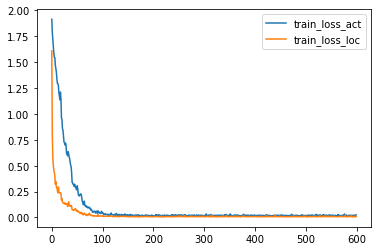

In [38]:
# train loss act vs loc
train_loss_act_df = pd.DataFrame(train_loss_act)
train_loss_act_df = train_loss_act_df.rename(columns={0:'train_loss_act'})
train_loss_loc_df = pd.DataFrame(train_loss_loc)
train_loss_loc_df = train_loss_loc_df.rename(columns={0:'train_loss_loc'})
pd.concat([train_loss_act_df,train_loss_loc_df], axis=1).plot()

<AxesSubplot:>

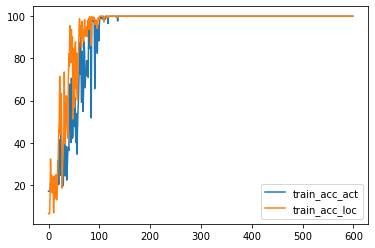

In [39]:
# train acc act vs loc
train_acc_act_df = pd.DataFrame(train_acc_act)
train_acc_act_df = train_acc_act_df.rename(columns={0:'train_acc_act'})
train_acc_loc_df = pd.DataFrame(train_acc_loc)
train_acc_loc_df = train_acc_loc_df.rename(columns={0:'train_acc_loc'})
pd.concat([train_acc_act_df,train_acc_loc_df], axis=1).plot()

<AxesSubplot:>

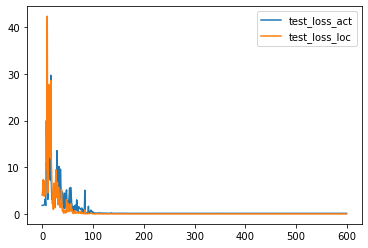

In [40]:
# test loss act vs loc
test_loss_act_df = pd.DataFrame(test_loss_act)
test_loss_act_df = test_loss_act_df.rename(columns={0:'test_loss_act'})
test_loss_loc_df = pd.DataFrame(test_loss_loc)
test_loss_loc_df = test_loss_loc_df.rename(columns={0:'test_loss_loc'})
pd.concat([test_loss_act_df,test_loss_loc_df], axis=1).plot()

<AxesSubplot:>

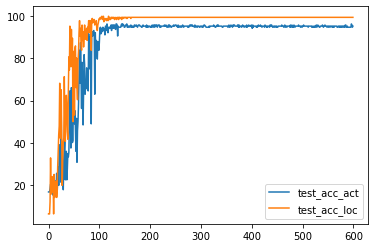

In [41]:
# test acc act vs loc
test_acc_act_df = pd.DataFrame(test_acc_act)
test_acc_act_df = test_acc_act_df.rename(columns={0:'test_acc_act'})
test_acc_loc_df = pd.DataFrame(test_acc_loc)
test_acc_loc_df = test_acc_loc_df.rename(columns={0:'test_acc_loc'})
pd.concat([test_acc_act_df,test_acc_loc_df], axis=1).plot()

# Resnet

In [42]:
from models.apl import *

In [43]:
# aplnet = DenseNet()
aplnet = ResNet(block=BasicBlock, layers=[1, 1, 1, 1], inchannel=52)
# aplnet = ResNet(block=BasicBlock, layers=[2, 2, 2, 2], inchannel=52)
# aplnet = ResNet(block=BasicBlock, layers=[3, 4, 6, 3], inchannel=52)
#

# aplnet = ResNet(block=Bottleneck, layers=[2, 3, 4, 6])

aplnet = aplnet.cuda()

criterion = nn.CrossEntropyLoss(size_average=False).cuda()

optimizer = torch.optim.Adam(aplnet.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer,
                                                #  milestones=[10, 20, 30, 40, 60, 70, 80, 90, 100, 110, 120, 130,
                                                #              140, 150, 160, 170, 180, 190, 200, 250, 300, 350, 
                                                #              400, 450, 500, 550, 600],
                                                milestones = [i for i in range(20,600,20)],
                                                 gamma=0.5)

/home/user2/miniconda3/envs/torch_cuda111/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [44]:
train_loss_act = np.zeros([num_epochs, 1])
train_loss_loc = np.zeros([num_epochs, 1])
test_loss_act = np.zeros([num_epochs, 1])
test_loss_loc = np.zeros([num_epochs, 1])
train_acc_act = np.zeros([num_epochs, 1])
train_acc_loc = np.zeros([num_epochs, 1])
test_acc_act = np.zeros([num_epochs, 1])
test_acc_loc = np.zeros([num_epochs, 1])

In [45]:
for epoch in range(num_epochs):
    print('Epoch:', epoch)
    aplnet.train()
    scheduler.step()
    # for i, (samples, labels) in enumerate(train_data_loader):
    loss_x = 0
    loss_y = 0
    for (samples, labels) in tqdm(train_data_loader):
        samplesV = Variable(samples.cuda())
        labels_act = labels[:, 0].squeeze()
        labels_loc = labels[:, 1].squeeze()
        labelsV_act = Variable(labels_act.cuda())
        labelsV_loc = Variable(labels_loc.cuda())

        # Forward + Backward + Optimize
        optimizer.zero_grad()
        predict_label_act, predict_label_loc,_,_,_,_,_,_,_ = aplnet(samplesV)

        loss_act = criterion(predict_label_act, labelsV_act)
        loss_loc = criterion(predict_label_loc, labelsV_loc)

        loss = loss_act + loss_loc
        # loss = loss_loc
        # print(loss.item())
        loss.backward()
        optimizer.step()

        # loss = loss1+0.5*loss2+0.25*loss3+0.25*loss4
        # loss = loss1+loss2+loss3+loss4

        loss_x += loss_act.item()
        loss_y += loss_loc.item()

        # loss.backward()
        # optimizer.step()

    train_loss_act[epoch] = loss_x / num_train_instances
    train_loss_loc[epoch] = loss_y / num_train_instances

    aplnet.eval()
    # loss_x = 0
    correct_train_act = 0
    correct_train_loc = 0
    for i, (samples, labels) in enumerate(train_data_loader):
        with torch.no_grad():
            samplesV = Variable(samples.cuda())
            labels = labels.squeeze()

            labels_act = labels[:, 0].squeeze()
            labels_loc = labels[:, 1].squeeze()
            labelsV_act = Variable(labels_act.cuda())
            labelsV_loc = Variable(labels_loc.cuda())

            predict_label_act, predict_label_loc,_,_,_,_,_,_,_ = aplnet(samplesV)

            prediction = predict_label_loc.data.max(1)[1]
            correct_train_loc += prediction.eq(labelsV_loc.data.long()).sum()

            prediction = predict_label_act.data.max(1)[1]
            correct_train_act += prediction.eq(labelsV_act.data.long()).sum()

            loss_act = criterion(predict_label_act, labelsV_act)
            loss_loc = criterion(predict_label_loc, labelsV_loc)
            # loss_x += loss.item()

    print("Activity Training accuracy:", (100 * float(correct_train_act) / num_train_instances))
    print("Location Training accuracy:", (100 * float(correct_train_loc) / num_train_instances))
    print("Activity Training loss:", loss_x / num_train_instances )
    print("Location Training loss:", loss_y / num_train_instances)

    # train_loss[epoch] = loss_x / num_train_instances
    train_acc_act[epoch] = 100 * float(correct_train_act) / num_train_instances
    train_acc_loc[epoch] = 100 * float(correct_train_loc) / num_train_instances


    trainacc_act = str(100 * float(correct_train_act) / num_train_instances)[0:6]
    trainacc_loc = str(100 * float(correct_train_loc) / num_train_instances)[0:6]
    

    loss_x = 0
    loss_y = 0
    correct_test_act = 0
    correct_test_loc = 0
    for i, (samples, labels) in enumerate(test_data_loader):
        with torch.no_grad():
            samplesV = Variable(samples.cuda())
            labels_act = labels[:, 0].squeeze()
            labels_loc = labels[:, 1].squeeze()
            labelsV_act = Variable(labels_act.cuda())
            labelsV_loc = Variable(labels_loc.cuda())

        predict_label_act, predict_label_loc,_,_,_,_,_,_,_ = aplnet(samplesV)
        prediction = predict_label_act.data.max(1)[1]
        correct_test_act += prediction.eq(labelsV_act.data.long()).sum()

        prediction = predict_label_loc.data.max(1)[1]
        correct_test_loc += prediction.eq(labelsV_loc.data.long()).sum()

        loss_act = criterion(predict_label_act, labelsV_act)
        loss_loc = criterion(predict_label_loc, labelsV_loc)
        loss_x += loss_act.item()
        loss_y += loss_loc.item()

    print("Activity Test accuracy:", (100 * float(correct_test_act) / num_test_instances))
    print("Location Test accuracy:", (100 * float(correct_test_loc) / num_test_instances))
    print("Activity Test loss:", loss_x / num_test_instances )
    print("Location Test loss:", loss_y / num_test_instances)

    test_loss_act[epoch] = loss_x / num_test_instances
    test_acc_act[epoch] = 100 * float(correct_test_act) / num_test_instances

    test_loss_loc[epoch] = loss_y / num_test_instances
    test_acc_loc[epoch] = 100 * float(correct_test_loc) / num_test_instances

    testacc_act = str(100 * float(correct_test_act) / num_test_instances)[0:6]
    testacc_loc = str(100 * float(correct_test_loc) / num_test_instances)[0:6]

    if epoch == 0:
        temp_test = correct_test_act
        temp_train = correct_train_act
    elif correct_test_act > temp_test:
        torch.save(aplnet, 'weights/net1111epoch' + str(
            epoch) + 'Train' + trainacc_act + 'Test' + testacc_act + 'Train' + trainacc_loc + 'Test' + testacc_loc + '.pkl')

        temp_test = correct_test_act
        temp_train = correct_train_act


# for learning curves
sio.savemat(
    'result/net1111TrainLossAct_Train' + str(100 * float(temp_train) / num_train_instances)[
                                                                 0:6] + 'Test' + str(
        100 * float(temp_test) / num_test_instances)[0:6] + '.mat', {'train_loss': train_loss_act})
sio.savemat(
    'result/net1111TestLossACT_Train' + str(100 * float(temp_train) / num_train_instances)[
                                                                0:6] + 'Test' + str(
        100 * float(temp_test) / num_test_instances)[0:6] + '.mat', {'test_loss': test_loss_act})
sio.savemat(
    'result/net1111TrainLossLOC_Train' + str(100 * float(temp_train) / num_train_instances)[
                                 0:6] + 'Test' + str(
        100 * float(temp_test) / num_test_instances)[0:6] + '.mat', {'train_loss': train_loss_loc})
sio.savemat(
    'result/net1111TestLossLOC_Train' + str(100 * float(temp_train) / num_train_instances)[
                                 0:6] + 'Test' + str(
        100 * float(temp_test) / num_test_instances)[0:6] + '.mat', {'test_loss': test_loss_loc})

sio.savemat('result/net1111TrainAccuracyACT_Train' + str(
    100 * float(temp_train) / num_train_instances)[0:6] + 'Test' + str(100 * float(temp_test) / num_test_instances)[
                                                                   0:6] + '.mat', {'train_acc': train_acc_act})
sio.savemat('result/net1111TestAccuracyACT_Train' + str(
    100 * float(temp_train) / num_train_instances)[0:6] + 'Test' + str(100 * float(temp_test) / num_test_instances)[
                                                                   0:6] + '.mat', {'test_acc': test_acc_act})
print(str(100 * float(temp_test) / num_test_instances)[0:6])

sio.savemat('result/net1111TrainAccuracyLOC_Train' + str(
    100 * float(temp_train) / num_train_instances)[0:6] + 'Test' + str(100 * float(temp_test) / num_test_instances)[
                                                                   0:6] + '.mat', {'train_acc': train_acc_loc})
sio.savemat('result/net1111TestAccuracyLOC_Train' + str(
    100 * float(temp_train) / num_train_instances)[0:6] + 'Test' + str(100 * float(temp_test) / num_test_instances)[
                                                                   0:6] + '.mat', {'test_acc': test_acc_loc})

/home/user2/miniconda3/envs/torch_cuda111/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:129: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Epoch: 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.74it/s]


Activity Training accuracy: 19.504950495049506
Location Training accuracy: 6.435643564356436
Activity Training loss: 1.7714704079203087
Location Training loss: 1.3199295138368512
Activity Test accuracy: 18.75
Location Test accuracy: 6.25
Activity Test loss: 1.9782029787699382
Location Test loss: 3.6363252798716226
Epoch: 1


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.96it/s]


Activity Training accuracy: 17.326732673267326
Location Training accuracy: 8.01980198019802
Activity Training loss: 1.4708175961333927
Location Training loss: 0.5851469927495069
Activity Test accuracy: 16.666666666666668
Location Test accuracy: 7.291666666666667
Activity Test loss: 1.9576854705810547
Location Test loss: 3.685781160990397
Epoch: 2


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.14it/s]


Activity Training accuracy: 17.128712871287128
Location Training accuracy: 6.336633663366337
Activity Training loss: 1.264942969898186
Location Training loss: 0.4251961575876368
Activity Test accuracy: 16.666666666666668
Location Test accuracy: 6.25
Activity Test loss: 3.057001233100891
Location Test loss: 8.128726323445639
Epoch: 3


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.66it/s]


Activity Training accuracy: 23.168316831683168
Location Training accuracy: 21.08910891089109
Activity Training loss: 1.1075992168766438
Location Training loss: 0.36531200692205146
Activity Test accuracy: 23.4375
Location Test accuracy: 19.791666666666668
Activity Test loss: 2.041335185368856
Location Test loss: 2.900805711746216
Epoch: 4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.20it/s]


Activity Training accuracy: 22.97029702970297
Location Training accuracy: 20.099009900990097
Activity Training loss: 1.0331398010253907
Location Training loss: 0.3358093535546029
Activity Test accuracy: 21.875
Location Test accuracy: 20.833333333333332
Activity Test loss: 3.637471357981364
Location Test loss: 4.280046145121257
Epoch: 5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.08it/s]


Activity Training accuracy: 27.92079207920792
Location Training accuracy: 30.099009900990097
Activity Training loss: 0.9119725557837156
Location Training loss: 0.27601630711319425
Activity Test accuracy: 27.083333333333332
Location Test accuracy: 26.5625
Activity Test loss: 2.188044706980387
Location Test loss: 5.001462936401367
Epoch: 6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.69it/s]


Activity Training accuracy: 29.900990099009903
Location Training accuracy: 31.18811881188119
Activity Training loss: 0.78000381394188
Location Training loss: 0.23120152218507067
Activity Test accuracy: 28.125
Location Test accuracy: 31.25
Activity Test loss: 2.383010665575663
Location Test loss: 2.9217684268951416
Epoch: 7


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.13it/s]


Activity Training accuracy: 44.75247524752475
Location Training accuracy: 55.84158415841584
Activity Training loss: 0.7043306822824006
Location Training loss: 0.18073383274644908
Activity Test accuracy: 42.1875
Location Test accuracy: 55.208333333333336
Activity Test loss: 2.151232679684957
Location Test loss: 2.203505516052246
Epoch: 8


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.18it/s]


Activity Training accuracy: 30.594059405940595
Location Training accuracy: 36.336633663366335
Activity Training loss: 0.6377241720067393
Location Training loss: 0.1719095721103177
Activity Test accuracy: 30.729166666666668
Location Test accuracy: 39.583333333333336
Activity Test loss: 3.3547519048055015
Location Test loss: 2.9542362689971924
Epoch: 9


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.52it/s]


Activity Training accuracy: 20.693069306930692
Location Training accuracy: 13.069306930693068
Activity Training loss: 0.6362273490074838
Location Training loss: 0.23194064244185345
Activity Test accuracy: 21.354166666666668
Location Test accuracy: 14.0625
Activity Test loss: 3.5735419591267905
Location Test loss: 6.824043909708659
Epoch: 10


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.67it/s]


Activity Training accuracy: 44.95049504950495
Location Training accuracy: 21.287128712871286
Activity Training loss: 0.6206164614989026
Location Training loss: 0.2448083207158759
Activity Test accuracy: 44.270833333333336
Location Test accuracy: 22.916666666666668
Activity Test loss: 2.0712263584136963
Location Test loss: 5.729076385498047
Epoch: 11


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.05it/s]


Activity Training accuracy: 51.68316831683168
Location Training accuracy: 34.95049504950495
Activity Training loss: 0.5163998688801681
Location Training loss: 0.2029760747852892
Activity Test accuracy: 50.520833333333336
Location Test accuracy: 34.375
Activity Test loss: 1.8407256205876668
Location Test loss: 3.4428592522939048
Epoch: 12


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.05it/s]


Activity Training accuracy: 44.554455445544555
Location Training accuracy: 46.13861386138614
Activity Training loss: 0.4200176522283271
Location Training loss: 0.1410333236845413
Activity Test accuracy: 41.145833333333336
Location Test accuracy: 43.229166666666664
Activity Test loss: 2.1082780758539834
Location Test loss: 2.069355845451355
Epoch: 13


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.56it/s]


Activity Training accuracy: 65.04950495049505
Location Training accuracy: 74.35643564356435
Activity Training loss: 0.32585477073593894
Location Training loss: 0.11491144269999891
Activity Test accuracy: 54.6875
Location Test accuracy: 70.83333333333333
Activity Test loss: 1.462335745493571
Location Test loss: 0.9017277558644613
Epoch: 14


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.88it/s]


Activity Training accuracy: 51.98019801980198
Location Training accuracy: 39.306930693069305
Activity Training loss: 0.3110726979699465
Location Training loss: 0.12261190201976511
Activity Test accuracy: 48.4375
Location Test accuracy: 38.541666666666664
Activity Test loss: 1.8644145727157593
Location Test loss: 3.946194648742676
Epoch: 15


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.26it/s]


Activity Training accuracy: 77.62376237623762
Location Training accuracy: 87.62376237623762
Activity Training loss: 0.26329097464533135
Location Training loss: 0.09656126168694827
Activity Test accuracy: 71.875
Location Test accuracy: 82.29166666666667
Activity Test loss: 0.9219364126523336
Location Test loss: 0.5113533635934194
Epoch: 16


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.74it/s]


Activity Training accuracy: 66.33663366336634
Location Training accuracy: 78.61386138613861
Activity Training loss: 0.2053579637319735
Location Training loss: 0.10455036989533074
Activity Test accuracy: 61.458333333333336
Location Test accuracy: 72.91666666666667
Activity Test loss: 1.1854049166043599
Location Test loss: 0.8435043295224508
Epoch: 17


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.07it/s]


Activity Training accuracy: 42.475247524752476
Location Training accuracy: 37.12871287128713
Activity Training loss: 0.18520880736926995
Location Training loss: 0.1043646524448206
Activity Test accuracy: 39.0625
Location Test accuracy: 33.854166666666664
Activity Test loss: 2.2748491764068604
Location Test loss: 3.4987830320994058
Epoch: 18


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.24it/s]


Activity Training accuracy: 58.91089108910891
Location Training accuracy: 55.64356435643565
Activity Training loss: 0.21639967531260879
Location Training loss: 0.10883587893873158
Activity Test accuracy: 48.958333333333336
Location Test accuracy: 51.041666666666664
Activity Test loss: 1.860855221748352
Location Test loss: 1.874987244606018
Epoch: 19


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.60it/s]


Activity Training accuracy: 87.62376237623762
Location Training accuracy: 88.31683168316832
Activity Training loss: 0.1092113211603448
Location Training loss: 0.056444542006690905
Activity Test accuracy: 78.64583333333333
Location Test accuracy: 82.29166666666667
Activity Test loss: 0.6769219934940338
Location Test loss: 0.4871440629164378
Epoch: 20


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.06it/s]


Activity Training accuracy: 89.10891089108911
Location Training accuracy: 96.73267326732673
Activity Training loss: 0.057269919390725614
Location Training loss: 0.03763561744501095
Activity Test accuracy: 75.52083333333333
Location Test accuracy: 92.1875
Activity Test loss: 0.7584441304206848
Location Test loss: 0.23984263837337494
Epoch: 21


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.89it/s]


Activity Training accuracy: 89.10891089108911
Location Training accuracy: 92.87128712871286
Activity Training loss: 0.04505353876859835
Location Training loss: 0.03585572531907865
Activity Test accuracy: 77.08333333333333
Location Test accuracy: 83.85416666666667
Activity Test loss: 0.9219268262386322
Location Test loss: 0.35610697666804
Epoch: 22


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.97it/s]


Activity Training accuracy: 97.12871287128714
Location Training accuracy: 98.51485148514851
Activity Training loss: 0.027215657080754196
Location Training loss: 0.020770495392308377
Activity Test accuracy: 81.25
Location Test accuracy: 94.79166666666667
Activity Test loss: 0.5669631461302439
Location Test loss: 0.16414916018644968
Epoch: 23


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.36it/s]


Activity Training accuracy: 93.66336633663366
Location Training accuracy: 88.51485148514851
Activity Training loss: 0.02219340706815814
Location Training loss: 0.020292656315435278
Activity Test accuracy: 78.125
Location Test accuracy: 88.02083333333333
Activity Test loss: 0.8206259806950887
Location Test loss: 0.37185070912043255
Epoch: 24


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.03it/s]


Activity Training accuracy: 93.46534653465346
Location Training accuracy: 96.83168316831683
Activity Training loss: 0.015836472499488604
Location Training loss: 0.02496623070818363
Activity Test accuracy: 82.29166666666667
Location Test accuracy: 91.66666666666667
Activity Test loss: 0.673445463180542
Location Test loss: 0.25581038494904834
Epoch: 25


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.34it/s]


Activity Training accuracy: 96.13861386138613
Location Training accuracy: 97.12871287128714
Activity Training loss: 0.013361314263674292
Location Training loss: 0.01659114139504952
Activity Test accuracy: 85.41666666666667
Location Test accuracy: 91.66666666666667
Activity Test loss: 0.4626795748869578
Location Test loss: 0.2450880159934362
Epoch: 26


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.95it/s]


Activity Training accuracy: 87.52475247524752
Location Training accuracy: 93.46534653465346
Activity Training loss: 0.01287258795582422
Location Training loss: 0.019512073267804513
Activity Test accuracy: 69.79166666666667
Location Test accuracy: 90.10416666666667
Activity Test loss: 1.0785877704620361
Location Test loss: 0.3357912103335063
Epoch: 27


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.24it/s]


Activity Training accuracy: 92.27722772277228
Location Training accuracy: 87.92079207920793
Activity Training loss: 0.011078393459320069
Location Training loss: 0.014144409071690966
Activity Test accuracy: 78.125
Location Test accuracy: 82.29166666666667
Activity Test loss: 0.7240887979666392
Location Test loss: 0.5599316358566284
Epoch: 28


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.88it/s]


Activity Training accuracy: 96.03960396039604
Location Training accuracy: 97.92079207920793
Activity Training loss: 0.011735824030814785
Location Training loss: 0.014957838512883327
Activity Test accuracy: 83.33333333333333
Location Test accuracy: 90.10416666666667
Activity Test loss: 0.5900681614875793
Location Test loss: 0.2963927388191223
Epoch: 29


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.63it/s]


Activity Training accuracy: 99.5049504950495
Location Training accuracy: 99.4059405940594
Activity Training loss: 0.008267101512687041
Location Training loss: 0.007410732855891237
Activity Test accuracy: 84.375
Location Test accuracy: 94.79166666666667
Activity Test loss: 0.49621127049128216
Location Test loss: 0.2328283116221428
Epoch: 30


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.67it/s]


Activity Training accuracy: 80.99009900990099
Location Training accuracy: 88.81188118811882
Activity Training loss: 0.013005754174572406
Location Training loss: 0.01917955226237231
Activity Test accuracy: 70.83333333333333
Location Test accuracy: 90.10416666666667
Activity Test loss: 1.3491258422533672
Location Test loss: 0.3376557230949402
Epoch: 31


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.64it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.007613979161965965
Location Training loss: 0.012155609231184025
Activity Test accuracy: 83.85416666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.407779981692632
Location Test loss: 0.11073788379629453
Epoch: 32


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.88it/s]


Activity Training accuracy: 98.11881188118812
Location Training accuracy: 94.95049504950495
Activity Training loss: 0.0044242639205243324
Location Training loss: 0.005831820215329085
Activity Test accuracy: 80.20833333333333
Location Test accuracy: 90.10416666666667
Activity Test loss: 0.5543166200319926
Location Test loss: 0.3709291915098826
Epoch: 33


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.62it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0038466081318288747
Location Training loss: 0.0038229209214153854
Activity Test accuracy: 86.45833333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.39130714535713196
Location Test loss: 0.10677592704693477
Epoch: 34


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.60it/s]


Activity Training accuracy: 92.97029702970298
Location Training accuracy: 99.3069306930693
Activity Training loss: 0.005168484077595248
Location Training loss: 0.004508410799916428
Activity Test accuracy: 77.60416666666667
Location Test accuracy: 94.27083333333333
Activity Test loss: 0.7998536626497904
Location Test loss: 0.11252766350905101
Epoch: 35


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.41it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.004266262467544858
Location Training loss: 0.00659666439831847
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3716641366481781
Location Test loss: 0.15937445809443793
Epoch: 36


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.47it/s]


Activity Training accuracy: 86.43564356435644
Location Training accuracy: 94.55445544554455
Activity Training loss: 0.00299396281785304
Location Training loss: 0.006353304129425842
Activity Test accuracy: 71.875
Location Test accuracy: 88.02083333333333
Activity Test loss: 1.2469568053881328
Location Test loss: 0.3457130789756775
Epoch: 37


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.55it/s]


Activity Training accuracy: 85.54455445544555
Location Training accuracy: 97.42574257425743
Activity Training loss: 0.007839216616484198
Location Training loss: 0.006751094378604747
Activity Test accuracy: 73.95833333333333
Location Test accuracy: 94.27083333333333
Activity Test loss: 1.2012363473574321
Location Test loss: 0.14907674491405487
Epoch: 38


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.15it/s]


Activity Training accuracy: 76.13861386138613
Location Training accuracy: 88.11881188118812
Activity Training loss: 0.0048886565878839775
Location Training loss: 0.0073326385109731464
Activity Test accuracy: 67.70833333333333
Location Test accuracy: 83.33333333333333
Activity Test loss: 1.219426433245341
Location Test loss: 0.54813019434611
Epoch: 39


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.39it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 99.9009900990099
Activity Training loss: 0.004624231233455167
Location Training loss: 0.006168542027768522
Activity Test accuracy: 83.85416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.5094284117221832
Location Test loss: 0.08401028315226237
Epoch: 40


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.49it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0042784885383478485
Location Training loss: 0.004316966574971039
Activity Test accuracy: 87.5
Location Test accuracy: 94.27083333333333
Activity Test loss: 0.3956643243630727
Location Test loss: 0.16324536999066672
Epoch: 41


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.36it/s]


Activity Training accuracy: 99.20792079207921
Location Training accuracy: 99.10891089108911
Activity Training loss: 0.0032419064663129276
Location Training loss: 0.005507870881569268
Activity Test accuracy: 82.29166666666667
Location Test accuracy: 94.79166666666667
Activity Test loss: 0.5376826326052347
Location Test loss: 0.16579417511820793
Epoch: 42


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.18it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 99.9009900990099
Activity Training loss: 0.00334796206933437
Location Training loss: 0.005989489652732811
Activity Test accuracy: 90.625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.35890257358551025
Location Test loss: 0.10851988817254703
Epoch: 43


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.23it/s]


Activity Training accuracy: 97.82178217821782
Location Training accuracy: 94.35643564356435
Activity Training loss: 0.0022803102094348113
Location Training loss: 0.005043738327994205
Activity Test accuracy: 84.89583333333333
Location Test accuracy: 88.54166666666667
Activity Test loss: 0.5495326220989227
Location Test loss: 0.40044787526130676
Epoch: 44


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.49it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0023368842604726847
Location Training loss: 0.005112252399177834
Activity Test accuracy: 88.02083333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.407370646794637
Location Test loss: 0.0922798669586579
Epoch: 45


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.45it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0024404697267725916
Location Training loss: 0.0022423606845411925
Activity Test accuracy: 85.41666666666667
Location Test accuracy: 95.3125
Activity Test loss: 0.4740200142065684
Location Test loss: 0.1345949632426103
Epoch: 46


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.35it/s]


Activity Training accuracy: 94.45544554455445
Location Training accuracy: 93.66336633663366
Activity Training loss: 0.005393519068118369
Location Training loss: 0.0035342798817275776
Activity Test accuracy: 79.16666666666667
Location Test accuracy: 86.97916666666667
Activity Test loss: 0.8273186882336935
Location Test loss: 0.44312021136283875
Epoch: 47


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.06it/s]


Activity Training accuracy: 99.4059405940594
Location Training accuracy: 100.0
Activity Training loss: 0.0042811028290503095
Location Training loss: 0.004760468529887719
Activity Test accuracy: 84.89583333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.565968374411265
Location Test loss: 0.10659950723250707
Epoch: 48


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.47it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0026383296540468046
Location Training loss: 0.001959512187260212
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.34069634477297467
Location Test loss: 0.11659175840516885
Epoch: 49


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.32it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0021922104908983307
Location Training loss: 0.002401700033114688
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 95.3125
Activity Test loss: 0.3663269877433777
Location Test loss: 0.1268455870449543
Epoch: 50


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.50it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0018754346609705745
Location Training loss: 0.0018467488228389533
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3433404763539632
Location Test loss: 0.11193796495596568
Epoch: 51


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.58it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0017871375573743687
Location Training loss: 0.0016142327301573046
Activity Test accuracy: 88.02083333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3841567635536194
Location Test loss: 0.10881255256632964
Epoch: 52


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.70it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001571229524394073
Location Training loss: 0.0014369123089726609
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.37778879205385846
Location Test loss: 0.1089001763612032
Epoch: 53


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.76it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0018624705437681461
Location Training loss: 0.001540448258418848
Activity Test accuracy: 87.5
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.35169442494710285
Location Test loss: 0.10850144984821479
Epoch: 54


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.37it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001449225728612135
Location Training loss: 0.0014483426467026815
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3400250772635142
Location Test loss: 0.10687515512108803
Epoch: 55


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.08it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0016197683455625384
Location Training loss: 0.0017739056471255746
Activity Test accuracy: 90.625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3289330204327901
Location Test loss: 0.10523156573375066
Epoch: 56


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.95it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0015357848846971399
Location Training loss: 0.001493385482099977
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3430593212445577
Location Test loss: 0.1047713893155257
Epoch: 57


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.97it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0016302819004153262
Location Training loss: 0.002227050648762448
Activity Test accuracy: 89.0625
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.34439432124296826
Location Test loss: 0.10415178444236517
Epoch: 58


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.62it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0012980268917756506
Location Training loss: 0.0015347484683636392
Activity Test accuracy: 86.97916666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.43147454659144086
Location Test loss: 0.10779829695820808
Epoch: 59


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.30it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0015224809177441171
Location Training loss: 0.003849823459392727
Activity Test accuracy: 87.5
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3695843120416005
Location Test loss: 0.12828795053064823
Epoch: 60


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.41it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010853034102975732
Location Training loss: 0.001694149726835808
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3286345849434535
Location Test loss: 0.13556204984585443
Epoch: 61


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.80it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001227731172843735
Location Training loss: 0.0013320238209596955
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3355107108751933
Location Test loss: 0.12684875602523485
Epoch: 62


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.50it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001066169603773863
Location Training loss: 0.0010962541703835572
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.34687645236651105
Location Test loss: 0.1204632284740607
Epoch: 63


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.62it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0011406459209352437
Location Training loss: 0.001348952738807933
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3402198553085327
Location Test loss: 0.12039931677281857
Epoch: 64


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.13it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0012839048621383043
Location Training loss: 0.0012402426783401188
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3513610363006592
Location Test loss: 0.11756637754539649
Epoch: 65


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.42it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0012923993022725133
Location Training loss: 0.0015078083123310957
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3623863955338796
Location Test loss: 0.12391226552426815
Epoch: 66


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.40it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001042021287254768
Location Training loss: 0.0019118686935099044
Activity Test accuracy: 86.97916666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.4130405882994334
Location Test loss: 0.12144042241076629
Epoch: 67


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.89it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0011781362798249366
Location Training loss: 0.0023290924174655782
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3415946960449219
Location Test loss: 0.1259561280409495
Epoch: 68


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.23it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0012222405412409564
Location Training loss: 0.0013047497977714728
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3219674030939738
Location Test loss: 0.11571032802263896
Epoch: 69


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.56it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0011775013649522668
Location Training loss: 0.0013868712110094504
Activity Test accuracy: 87.5
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.35346586505572003
Location Test loss: 0.11712565397222836
Epoch: 70


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.86it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0013185886758388858
Location Training loss: 0.0013465090627127355
Activity Test accuracy: 89.0625
Location Test accuracy: 96.875
Activity Test loss: 0.34801362951596576
Location Test loss: 0.12605407337347665
Epoch: 71


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.31it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0013237167371086555
Location Training loss: 0.0011771529876064546
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.32530100146929425
Location Test loss: 0.11701959061125915
Epoch: 72


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.21it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001238715648651123
Location Training loss: 0.0019283627869911713
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3631502687931061
Location Test loss: 0.10900822033484776
Epoch: 73


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.43it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001259863350798588
Location Training loss: 0.0014344171316611886
Activity Test accuracy: 89.0625
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.35657156507174176
Location Test loss: 0.09147273749113083
Epoch: 74


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.29it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0011623582959470182
Location Training loss: 0.0014108292057667627
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.355691264073054
Location Test loss: 0.11454983366032441
Epoch: 75


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.55it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0011140271541800828
Location Training loss: 0.0011609583687369185
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.35415711005528766
Location Test loss: 0.11989190926154454
Epoch: 76


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.66it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010740094274134919
Location Training loss: 0.001097671938414621
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3365403513113658
Location Test loss: 0.1165573342392842
Epoch: 77


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.66it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008441719106665932
Location Training loss: 0.0010618232633217727
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33685192465782166
Location Test loss: 0.1335025733957688
Epoch: 78


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.05it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0012425257593835935
Location Training loss: 0.0014294856071177095
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.36288008093833923
Location Test loss: 0.11234677769243717
Epoch: 79


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.00it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009213995852387777
Location Training loss: 0.0012010546862193854
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3527863025665283
Location Test loss: 0.11561395165820916
Epoch: 80


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.94it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009655989079487206
Location Training loss: 0.0009920982699288
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.34379349152247113
Location Test loss: 0.11405831016600132
Epoch: 81


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.88it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0011441155180039971
Location Training loss: 0.0014781426564596668
Activity Test accuracy: 89.0625
Location Test accuracy: 96.875
Activity Test loss: 0.3563095033168793
Location Test loss: 0.10629894025623798
Epoch: 82


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.16it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001173802245740253
Location Training loss: 0.0011639558368980295
Activity Test accuracy: 88.02083333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.34839030106862384
Location Test loss: 0.11388521393140157
Epoch: 83


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.01it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008456426847836759
Location Training loss: 0.0008979614031049284
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3434578279654185
Location Test loss: 0.11469590912262599
Epoch: 84


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.77it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001084496149110912
Location Training loss: 0.0011879278291570079
Activity Test accuracy: 89.0625
Location Test accuracy: 96.875
Activity Test loss: 0.3486146926879883
Location Test loss: 0.10175728301207225
Epoch: 85


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.49it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0012539660207705923
Location Training loss: 0.0014088826567524731
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.36306386192639667
Location Test loss: 0.11101428729792436
Epoch: 86


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.42it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000852920629526719
Location Training loss: 0.0009577656736468325
Activity Test accuracy: 88.02083333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3547324041525523
Location Test loss: 0.10898803919553757
Epoch: 87


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.87it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009074111275448657
Location Training loss: 0.000954160398554684
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3349580069382985
Location Test loss: 0.11267173414429028
Epoch: 88


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.75it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0012463599701624105
Location Training loss: 0.0011530771113858365
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.34101490179697674
Location Test loss: 0.11682482560475667
Epoch: 89


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.67it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001105155891711169
Location Training loss: 0.0010372697993522825
Activity Test accuracy: 89.0625
Location Test accuracy: 96.875
Activity Test loss: 0.3404869536558787
Location Test loss: 0.11315065249800682
Epoch: 90


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.76it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 99.9009900990099
Activity Training loss: 0.0015366340332692212
Location Training loss: 0.005648116330330325
Activity Test accuracy: 87.5
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.42863104740778607
Location Test loss: 0.1341076840957006
Epoch: 91


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.69it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001188906966385865
Location Training loss: 0.0021089063459398725
Activity Test accuracy: 90.625
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.350300669670105
Location Test loss: 0.11382532181839149
Epoch: 92


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.92it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0012920883438079663
Location Training loss: 0.0013522133249605057
Activity Test accuracy: 88.02083333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.37571267286936444
Location Test loss: 0.13570620367924371
Epoch: 93


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.51it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010346930805999453
Location Training loss: 0.0010969968863052896
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3453538815180461
Location Test loss: 0.12724633887410164
Epoch: 94


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.61it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009227293239224075
Location Training loss: 0.0008656950464638153
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3214162389437358
Location Test loss: 0.11728062791128953
Epoch: 95


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.70it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0012102327576958307
Location Training loss: 0.0015348191160966854
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3315054575602214
Location Test loss: 0.11741839038829009
Epoch: 96


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.55it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009055063718616372
Location Training loss: 0.0009970254015804517
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3213544289271037
Location Test loss: 0.11123941031595071
Epoch: 97


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.40it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007866599938214416
Location Training loss: 0.0007120095156502016
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3268557886282603
Location Test loss: 0.1115813876191775
Epoch: 98


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.72it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001017747030104741
Location Training loss: 0.0010063394221781505
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.32497183481852215
Location Test loss: 0.10950431041419506
Epoch: 99


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.28it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006860061281240813
Location Training loss: 0.0010592822243671606
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.327140748500824
Location Test loss: 0.11007454494635265
Epoch: 100


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.47it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009414650573588834
Location Training loss: 0.0008915462503486341
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3294798731803894
Location Test loss: 0.1135871938119332
Epoch: 101


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.11it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009793125904432618
Location Training loss: 0.0009102074503160939
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3246135115623474
Location Test loss: 0.11255936200420062
Epoch: 102


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.83it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009130893533330153
Location Training loss: 0.0007678088778168849
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3321661551793416
Location Test loss: 0.10998125312228997
Epoch: 103


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.34it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008034179300659954
Location Training loss: 0.0009159181691189804
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.32778750856717426
Location Test loss: 0.11292159495254357
Epoch: 104


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.25it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009982955282424935
Location Training loss: 0.0009624316071224684
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.32243571678797406
Location Test loss: 0.11752098860840003
Epoch: 105


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.59it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007633076538101282
Location Training loss: 0.0010215814677205417
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3302808205286662
Location Test loss: 0.11894402652978897
Epoch: 106


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.96it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007843486392999639
Location Training loss: 0.0007294495931208724
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.32722384730974835
Location Test loss: 0.11724713817238808
Epoch: 107


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.73it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008791098334264047
Location Training loss: 0.0009012095206002198
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.34015898903210956
Location Test loss: 0.10934209451079369
Epoch: 108


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.91it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008684016376881317
Location Training loss: 0.000978255174168856
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33366228143374127
Location Test loss: 0.11020824251075585
Epoch: 109


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.55it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008685281186705769
Location Training loss: 0.0007228833909081941
Activity Test accuracy: 89.0625
Location Test accuracy: 96.875
Activity Test loss: 0.327053705851237
Location Test loss: 0.10990307418008645
Epoch: 110


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.88it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009399598316833525
Location Training loss: 0.0007835342447356422
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3320026993751526
Location Test loss: 0.11153617439170678
Epoch: 111


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.68it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008233526408082187
Location Training loss: 0.0009336183714394522
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33311477303504944
Location Test loss: 0.11278336370984714
Epoch: 112


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.87it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010510478721986903
Location Training loss: 0.0011753374655352961
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.32586655020713806
Location Test loss: 0.10922494468589623
Epoch: 113


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.49it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009620967754485584
Location Training loss: 0.00111271982994115
Activity Test accuracy: 89.0625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.34020715951919556
Location Test loss: 0.10927083032826583
Epoch: 114


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.13it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009289585773159962
Location Training loss: 0.00114456077687221
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3339047034581502
Location Test loss: 0.11058763042092323
Epoch: 115


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.82it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001102523352618855
Location Training loss: 0.0014129199308924156
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3323597311973572
Location Test loss: 0.11430989143749078
Epoch: 116


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.19it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0015456203315960299
Location Training loss: 0.0024239359534170366
Activity Test accuracy: 89.0625
Location Test accuracy: 96.875
Activity Test loss: 0.33578134576479596
Location Test loss: 0.0986694705983003
Epoch: 117


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.86it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007362070023128302
Location Training loss: 0.000976409215369437
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3387686610221863
Location Test loss: 0.09679330202440421
Epoch: 118


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.20it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008175328189488685
Location Training loss: 0.0010035697094137126
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3379533688227336
Location Test loss: 0.112359292494754
Epoch: 119


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.94it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000791533848289216
Location Training loss: 0.0010480189087367295
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3363797465960185
Location Test loss: 0.11945722873012225
Epoch: 120


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.49it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009837803808916913
Location Training loss: 0.000828472995153158
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3371940453847249
Location Test loss: 0.12311626846591632
Epoch: 121


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.40it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008862904208426428
Location Training loss: 0.0011516382161638524
Activity Test accuracy: 89.0625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3410620192686717
Location Test loss: 0.12190122529864311
Epoch: 122


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.65it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0013149321614073055
Location Training loss: 0.002991431103189393
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3392934600512187
Location Test loss: 0.1208428821216027
Epoch: 123


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.68it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010584776649380674
Location Training loss: 0.0023505441770695222
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3302919566631317
Location Test loss: 0.12266998551785946
Epoch: 124


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.47it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009134064050446642
Location Training loss: 0.001017730922834708
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3335273365179698
Location Test loss: 0.11785096116364002
Epoch: 125


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.99it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008715568184114919
Location Training loss: 0.0009718678504376129
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33589810132980347
Location Test loss: 0.11977670279641946
Epoch: 126


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.16it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000750719221069081
Location Training loss: 0.0009353254488346601
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3351090649763743
Location Test loss: 0.12331550071636836
Epoch: 127


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.52it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009986680867795897
Location Training loss: 0.0008856839564914751
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3305167059103648
Location Test loss: 0.12372053228318691
Epoch: 128


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.96it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008043966615701666
Location Training loss: 0.0008071144913682843
Activity Test accuracy: 89.0625
Location Test accuracy: 96.875
Activity Test loss: 0.32788514097531635
Location Test loss: 0.12268555536866188
Epoch: 129


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.90it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006803160016932109
Location Training loss: 0.0007593881338834763
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.32561739285786945
Location Test loss: 0.12036852228144805
Epoch: 130


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.17it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007603059402934395
Location Training loss: 0.000812855224576917
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.327640563249588
Location Test loss: 0.12325671253105004
Epoch: 131


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.06it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000807291892643022
Location Training loss: 0.0012415693556465724
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3343098660310109
Location Test loss: 0.1257769769678513
Epoch: 132


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.31it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007034636978613268
Location Training loss: 0.0007454907355627211
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3290862540404002
Location Test loss: 0.12923494912683964
Epoch: 133


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.87it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007896234604096649
Location Training loss: 0.001125320679701791
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33096180359522503
Location Test loss: 0.12967840706308684
Epoch: 134


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.15it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0012923250251477307
Location Training loss: 0.0011378006511690592
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3340093394120534
Location Test loss: 0.12359798885881901
Epoch: 135


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.53it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008961499880741138
Location Training loss: 0.0012167592560595804
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.875
Activity Test loss: 0.3332001765569051
Location Test loss: 0.12200647499412298
Epoch: 136


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.58it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007444158639058028
Location Training loss: 0.000938409168531399
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33466124534606934
Location Test loss: 0.12453277905782063
Epoch: 137


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.83it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008997851816734465
Location Training loss: 0.0010274888320577027
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33624565601348877
Location Test loss: 0.12352908402681351
Epoch: 138


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.55it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006259788768273769
Location Training loss: 0.0009675679285780038
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33418657382329303
Location Test loss: 0.12346481531858444
Epoch: 139


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.88it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000700335862981801
Location Training loss: 0.0007553377216405208
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33493416508038837
Location Test loss: 0.11943525386353333
Epoch: 140


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.66it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007964801633417016
Location Training loss: 0.0008673671798983423
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3355105022589366
Location Test loss: 0.12553772578636804
Epoch: 141


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.35it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009455525030446525
Location Training loss: 0.0006692837610250652
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3375784158706665
Location Test loss: 0.11930556781589985
Epoch: 142


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.96it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007760717284561384
Location Training loss: 0.0006274159001831961
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33674537142117816
Location Test loss: 0.12015327873329322
Epoch: 143


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.23it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008937169991359852
Location Training loss: 0.0009722102931377911
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33661799629529315
Location Test loss: 0.12215747994681199
Epoch: 144


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.31it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007931773264956947
Location Training loss: 0.0009800761311066033
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3425429066022237
Location Test loss: 0.12852105995019278
Epoch: 145


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.69it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006594159741802971
Location Training loss: 0.0006450242538115766
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3375636537869771
Location Test loss: 0.12194472799698512
Epoch: 146


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.26it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008263828657051124
Location Training loss: 0.0010183667579647339
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33984267711639404
Location Test loss: 0.12362808485825856
Epoch: 147


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.45it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000787918959366213
Location Training loss: 0.0011951604765830653
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33474453290303546
Location Test loss: 0.11917909358938535
Epoch: 148


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.00it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007391633133929555
Location Training loss: 0.0010360677366947184
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3379720946153005
Location Test loss: 0.1218385895093282
Epoch: 149


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.09it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010393001876845217
Location Training loss: 0.0010229338532184611
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33493534723917645
Location Test loss: 0.12325771960119407
Epoch: 150


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.43it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000815119422824666
Location Training loss: 0.0010055296989803268
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3343946536382039
Location Test loss: 0.1257341286788384
Epoch: 151


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.33it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000829190629912485
Location Training loss: 0.0009272187726922555
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3323006828625997
Location Test loss: 0.12326765867571036
Epoch: 152


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.31it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007727058530591502
Location Training loss: 0.0009504257378601792
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33214110136032104
Location Test loss: 0.12234445288777351
Epoch: 153


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.22it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008499364359396519
Location Training loss: 0.001064197538365232
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3338077863057454
Location Test loss: 0.1262990115210414
Epoch: 154


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.15it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009280036360320478
Location Training loss: 0.0008386781346974986
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.875
Activity Test loss: 0.33451417088508606
Location Test loss: 0.11904320307075977
Epoch: 155


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.21it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006570193824349063
Location Training loss: 0.0006938881471310512
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.875
Activity Test loss: 0.3288607597351074
Location Test loss: 0.12297645397484303
Epoch: 156


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.10it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006746185740621963
Location Training loss: 0.000924475935499857
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3314212958017985
Location Test loss: 0.1207887592415015
Epoch: 157


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.97it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009264143939950679
Location Training loss: 0.000719310055569847
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3327861924966176
Location Test loss: 0.12486137015124162
Epoch: 158


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.04it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007025493567090224
Location Training loss: 0.0007642048217429973
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33380742867787677
Location Test loss: 0.12410593653718631
Epoch: 159


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.10it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006873604942961494
Location Training loss: 0.0010685705183313624
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33005979657173157
Location Test loss: 0.1271692185352246
Epoch: 160


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.03it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006011358914103838
Location Training loss: 0.0006546804054391266
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3323833147684733
Location Test loss: 0.12407870714863141
Epoch: 161


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.28it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0012232798695711805
Location Training loss: 0.001012266836691611
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33472121755282086
Location Test loss: 0.12290285465617974
Epoch: 162


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.27it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008200870623978057
Location Training loss: 0.0012469290064112974
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3327392836411794
Location Test loss: 0.1285706926137209
Epoch: 163


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.21it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010118668696077744
Location Training loss: 0.0013529484021929231
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33318305015563965
Location Test loss: 0.1256060724457105
Epoch: 164


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.24it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0012114505053009137
Location Training loss: 0.0006971051510755379
Activity Test accuracy: 90.625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3388676742712657
Location Test loss: 0.12870967450241247
Epoch: 165


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.00it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007901767914247985
Location Training loss: 0.0010114847544101205
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3375132381916046
Location Test loss: 0.12434335301319759
Epoch: 166


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.70it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008750577079187525
Location Training loss: 0.0008842131196714864
Activity Test accuracy: 89.0625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33562996983528137
Location Test loss: 0.12295685273905595
Epoch: 167


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.39it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009031479956932587
Location Training loss: 0.0009712510364185466
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3335668345292409
Location Test loss: 0.12908684400220713
Epoch: 168


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.09it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010818228144014235
Location Training loss: 0.000839228929933345
Activity Test accuracy: 90.625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3369976878166199
Location Test loss: 0.1273854554941257
Epoch: 169


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.73it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006675007301244405
Location Training loss: 0.0007016813105875903
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33308682839075726
Location Test loss: 0.12615201311806837
Epoch: 170


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.01it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007872418343725772
Location Training loss: 0.0008844925496395272
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3340514798959096
Location Test loss: 0.1262908217807611
Epoch: 171


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.95it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008556403938939076
Location Training loss: 0.0011026490405939592
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3341858486334483
Location Test loss: 0.12410970032215118
Epoch: 172


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.95it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001010452260696652
Location Training loss: 0.0008849021840361085
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33413437008857727
Location Test loss: 0.11776252835988998
Epoch: 173


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.08it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009157199910519146
Location Training loss: 0.0020136191113160388
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3305963675181071
Location Test loss: 0.12324816236893336
Epoch: 174


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.70it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006737067207398981
Location Training loss: 0.0010442421301314147
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33272289236386615
Location Test loss: 0.12331255214909713
Epoch: 175


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.17it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007134048323525061
Location Training loss: 0.0006364855583351437
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3355663816134135
Location Test loss: 0.12224318645894527
Epoch: 176


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.29it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000987742704772713
Location Training loss: 0.000936871776265083
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.324818879365921
Location Test loss: 0.12239059619605541
Epoch: 177


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.42it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000793994823009661
Location Training loss: 0.0007776512460100769
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3339296778043111
Location Test loss: 0.11949062657852967
Epoch: 178


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.24it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.002599070903540838
Location Training loss: 0.0017840276555259628
Activity Test accuracy: 90.625
Location Test accuracy: 96.875
Activity Test loss: 0.33424999316533405
Location Test loss: 0.11853731920321782
Epoch: 179


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.33it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000786467379715183
Location Training loss: 0.0009200367080693198
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.32806265354156494
Location Test loss: 0.12094152656694253
Epoch: 180


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.95it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010064250632825463
Location Training loss: 0.001035799949180962
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3295816481113434
Location Test loss: 0.11943393448988597
Epoch: 181


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.47it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008847355049582991
Location Training loss: 0.0009676778098881834
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.32773520549138385
Location Test loss: 0.12658076857527098
Epoch: 182


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.14it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000798048040285559
Location Training loss: 0.0012567481450220146
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.332841694355011
Location Test loss: 0.12365929037332535
Epoch: 183


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.92it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006792131626960075
Location Training loss: 0.0008730122081861638
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33716978629430133
Location Test loss: 0.12269958357016246
Epoch: 184


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.76it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008525909616215394
Location Training loss: 0.0007488542817311711
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3387034634749095
Location Test loss: 0.12291197416683038
Epoch: 185


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.82it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007422183096261307
Location Training loss: 0.0011519814610923872
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3327804207801819
Location Test loss: 0.12212172523140907
Epoch: 186


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.67it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008173951842259653
Location Training loss: 0.0010045253810020956
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.34186219175656635
Location Test loss: 0.11941137909889221
Epoch: 187


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.43it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006486180247646747
Location Training loss: 0.0009525068196477276
Activity Test accuracy: 89.0625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3397053082784017
Location Test loss: 0.11865513399243355
Epoch: 188


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.24it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008044699999955621
Location Training loss: 0.0007772175761142579
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33307621876398724
Location Test loss: 0.11919245310127735
Epoch: 189


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.13it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.00081554810968366
Location Training loss: 0.0015459750290259277
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33799468477567035
Location Test loss: 0.12685204483568668
Epoch: 190


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.06it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006442537309952302
Location Training loss: 0.0005830384403614715
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33595694104830426
Location Test loss: 0.1240399448821942
Epoch: 191


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.11it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007872512250548542
Location Training loss: 0.0007394334043164065
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.331454594930013
Location Test loss: 0.12048658480246861
Epoch: 192


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.15it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007106384668167275
Location Training loss: 0.0011284677514640411
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.34060292442639667
Location Test loss: 0.12438393756747246
Epoch: 193


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.00it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008164633323650549
Location Training loss: 0.0008942932148676108
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33453071117401123
Location Test loss: 0.11943905986845493
Epoch: 194


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.93it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007957469155587772
Location Training loss: 0.0009533420426420646
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33353593945503235
Location Test loss: 0.11816634982824326
Epoch: 195


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.02it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006554236746217944
Location Training loss: 0.0007366271652650125
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3307129939397176
Location Test loss: 0.12179102562367916
Epoch: 196


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.92it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000665483260435043
Location Training loss: 0.0009085646710625969
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3359419306119283
Location Test loss: 0.11903711842993896
Epoch: 197


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.32it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008540663462464172
Location Training loss: 0.000938568218140909
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3377378185590108
Location Test loss: 0.11415047757327557
Epoch: 198


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.20it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007525546254940552
Location Training loss: 0.000832854792254396
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.33386728167533875
Location Test loss: 0.12224775056044261
Epoch: 199


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.28it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0005994772501658686
Location Training loss: 0.0007286241849755297
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33475101987520856
Location Test loss: 0.12405014969408512
Epoch: 200


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.94it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008601770468867651
Location Training loss: 0.0012523789825563383
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33395368854204815
Location Test loss: 0.12441985433300336
Epoch: 201


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.63it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007407908484634787
Location Training loss: 0.0009460428139508361
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33280762036641437
Location Test loss: 0.11696621961891651
Epoch: 202


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.02it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006530427124978292
Location Training loss: 0.000807389733151044
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.32741909225781757
Location Test loss: 0.12256234760085742
Epoch: 203


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.48it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007010612526152394
Location Training loss: 0.0008515634048398179
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3281693160533905
Location Test loss: 0.12473392114043236
Epoch: 204


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.86it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006914989561727731
Location Training loss: 0.0008739417105323018
Activity Test accuracy: 90.625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33406566580136615
Location Test loss: 0.12475733148554961
Epoch: 205


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.51it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001245491806011979
Location Training loss: 0.0014498454085228466
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3449813226858775
Location Test loss: 0.12322662770748138
Epoch: 206


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.37it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007823098819739748
Location Training loss: 0.0019138499799341258
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3356886605421702
Location Test loss: 0.12259900694092114
Epoch: 207


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.02it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006791805092355993
Location Training loss: 0.00105144121674913
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33149294058481854
Location Test loss: 0.12080856040120125
Epoch: 208


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.10it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009948219421623957
Location Training loss: 0.0011245346416046123
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.32963154713312787
Location Test loss: 0.12385478677848975
Epoch: 209


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.48it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008628856261620428
Location Training loss: 0.0009064930592580597
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3312106629212697
Location Test loss: 0.12309036838511626
Epoch: 210


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.34it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007157691966484088
Location Training loss: 0.0006118297945744921
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3323696454366048
Location Test loss: 0.1250845529139042
Epoch: 211


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.89it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000782338365691133
Location Training loss: 0.0007766973614545152
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.875
Activity Test loss: 0.3318004111448924
Location Test loss: 0.12547237363954386
Epoch: 212


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.84it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010345835865724206
Location Training loss: 0.002320114561900644
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3344583014647166
Location Test loss: 0.12499842792749405
Epoch: 213


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.21it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008461436238324288
Location Training loss: 0.0009207330625688676
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.875
Activity Test loss: 0.3329058388868968
Location Test loss: 0.12397804297506809
Epoch: 214


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.81it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000745763325381397
Location Training loss: 0.0008004233554595768
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.332911749680837
Location Test loss: 0.12285774697860082
Epoch: 215


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.96it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009193536060133783
Location Training loss: 0.0009736492233996344
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33545830845832825
Location Test loss: 0.1245375294238329
Epoch: 216


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.23it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007794981803929452
Location Training loss: 0.0008895863585247852
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.875
Activity Test loss: 0.3306578993797302
Location Test loss: 0.11917449347674847
Epoch: 217


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.02it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010817320224377187
Location Training loss: 0.0008465140744453609
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33441323041915894
Location Test loss: 0.12165338421861331
Epoch: 218


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.81it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007709408473998013
Location Training loss: 0.0008083393022713095
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3289317190647125
Location Test loss: 0.12155560900767644
Epoch: 219


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.03it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006503223340110024
Location Training loss: 0.000918497255828121
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3334472676118215
Location Test loss: 0.12008962283531825
Epoch: 220


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.97it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008615917682942778
Location Training loss: 0.0009113316912904825
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3359002669652303
Location Test loss: 0.1214256330082814
Epoch: 221


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.12it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001204548246863455
Location Training loss: 0.0016184582107580535
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3332471450169881
Location Test loss: 0.11999545370539029
Epoch: 222


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.24it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009565409162256977
Location Training loss: 0.001036587010810871
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3351188898086548
Location Test loss: 0.12036241218447685
Epoch: 223


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.88it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0005863565933143739
Location Training loss: 0.0006633400437560412
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33005184928576153
Location Test loss: 0.12197237834334373
Epoch: 224


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.88it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006580224057825485
Location Training loss: 0.0006927591056959464
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3274497489134471
Location Test loss: 0.11997598968446255
Epoch: 225


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.72it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009213603645710662
Location Training loss: 0.0009683396741010174
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3331015110015869
Location Test loss: 0.11901753457883994
Epoch: 226


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.84it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010499130971360915
Location Training loss: 0.0009765807852739155
Activity Test accuracy: 89.0625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3348588248093923
Location Test loss: 0.12500932502249876
Epoch: 227


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.45it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008443012483196683
Location Training loss: 0.0008328138841408314
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.32953088482220966
Location Test loss: 0.11844388085107009
Epoch: 228


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.13it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000751998067123465
Location Training loss: 0.0006930532745353066
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3306487500667572
Location Test loss: 0.12157195061445236
Epoch: 229


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.00it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000650024679627749
Location Training loss: 0.0008397842158037837
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3309928278128306
Location Test loss: 0.12761417776346207
Epoch: 230


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.12it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007256479933857918
Location Training loss: 0.0009375070913298295
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33253052830696106
Location Test loss: 0.11536635768910249
Epoch: 231


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.27it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009349456222930758
Location Training loss: 0.0010018642401636237
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33394744992256165
Location Test loss: 0.12039798063536485
Epoch: 232


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.70it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007053399292549285
Location Training loss: 0.0006516210790170301
Activity Test accuracy: 89.0625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3344392478466034
Location Test loss: 0.12070136020580928
Epoch: 233


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.94it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007536112856451828
Location Training loss: 0.0007569905481126049
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33134875694910687
Location Test loss: 0.12226504894594352
Epoch: 234


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.99it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009944420270990618
Location Training loss: 0.0012876641355676227
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3365391194820404
Location Test loss: 0.11578447992602985
Epoch: 235


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.11it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007634791481022788
Location Training loss: 0.0006250260785074517
Activity Test accuracy: 89.0625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3340979715188344
Location Test loss: 0.12219550274312496
Epoch: 236


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.72it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008271504267312513
Location Training loss: 0.0011958082160442181
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33407695094744366
Location Test loss: 0.12315473643441995
Epoch: 237


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.18it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010045673384672345
Location Training loss: 0.0021948506428611163
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33690983057022095
Location Test loss: 0.12324489156405131
Epoch: 238


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.70it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0015092962836422542
Location Training loss: 0.0013136230077188794
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33504249652226764
Location Test loss: 0.11913113730649154
Epoch: 239


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.41it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007078969592947771
Location Training loss: 0.0008842466657262038
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33347461620966595
Location Test loss: 0.1181314333031575
Epoch: 240


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.92it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008378277173136721
Location Training loss: 0.0013367837147399931
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3311636845270793
Location Test loss: 0.12113960335652034
Epoch: 241


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.94it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007959663388457629
Location Training loss: 0.0008356270629285586
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33041513959566754
Location Test loss: 0.12078880208233993
Epoch: 242


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.35it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008067132204328433
Location Training loss: 0.00085929058086459
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33248673876126605
Location Test loss: 0.12038595601916313
Epoch: 243


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.04it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009795883467586914
Location Training loss: 0.0007985897565094552
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33276431759198505
Location Test loss: 0.12095547964175542
Epoch: 244


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.07it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007713760369189895
Location Training loss: 0.0011297587065560984
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33162227272987366
Location Test loss: 0.12094412681957085
Epoch: 245


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.04it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000715659733972337
Location Training loss: 0.0006909645632794587
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33450262745221454
Location Test loss: 0.124594754849871
Epoch: 246


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.82it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007698718458414078
Location Training loss: 0.0010812928955448737
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3364206751187642
Location Test loss: 0.11904972543319066
Epoch: 247


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.73it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006255227851100487
Location Training loss: 0.0015355543298001336
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3331705729166667
Location Test loss: 0.12041208768884341
Epoch: 248


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.26it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006610305869195721
Location Training loss: 0.0006502587366664763
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3310038546721141
Location Test loss: 0.12262847647070885
Epoch: 249


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.12it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008915703208877308
Location Training loss: 0.0009166386900561871
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33779006203015643
Location Test loss: 0.12144285750885804
Epoch: 250


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.87it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008852938429848982
Location Training loss: 0.001057048197282423
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33169418573379517
Location Test loss: 0.12080841946105163
Epoch: 251


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.55it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008094060096410241
Location Training loss: 0.0007985340099376027
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3295552333196004
Location Test loss: 0.12348005175590515
Epoch: 252


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.79it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006842096566711322
Location Training loss: 0.0010580580515584144
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33391817410786945
Location Test loss: 0.1236308633039395
Epoch: 253


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.68it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0005239376521641666
Location Training loss: 0.0006681951399118004
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3313385844230652
Location Test loss: 0.12240043841302395
Epoch: 254


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.67it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007067007298516755
Location Training loss: 0.0007774792279642408
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3318608005841573
Location Test loss: 0.11759323750933011
Epoch: 255


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.81it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006571706513514613
Location Training loss: 0.001146968072372498
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33777011434237164
Location Test loss: 0.12059130022923152
Epoch: 256


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.70it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006415324654467035
Location Training loss: 0.0006435880898544104
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33019612232844037
Location Test loss: 0.1201998833566904
Epoch: 257


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.15it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000866883513655993
Location Training loss: 0.0010013797661603087
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3373038073380788
Location Test loss: 0.12586474418640137
Epoch: 258


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.88it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007366097320129376
Location Training loss: 0.0007979592142423781
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3330093324184418
Location Test loss: 0.12431017309427261
Epoch: 259


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.06it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007294014354448507
Location Training loss: 0.001055773758873491
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33402009805043537
Location Test loss: 0.12578524214526018
Epoch: 260


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.28it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006480029295429145
Location Training loss: 0.0006506687546573063
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3326396644115448
Location Test loss: 0.1232214526583751
Epoch: 261


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.16it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008804091206281493
Location Training loss: 0.0011928972944912344
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33392496903737384
Location Test loss: 0.1198171606908242
Epoch: 262


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.32it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007678284946054516
Location Training loss: 0.0009685356501895603
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3316584527492523
Location Test loss: 0.12492299700776736
Epoch: 263


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.08it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008374792422250946
Location Training loss: 0.0009956585206460245
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3308547039826711
Location Test loss: 0.12311207130551338
Epoch: 264


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.44it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006901459159827469
Location Training loss: 0.0007221562142419343
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33394471804300946
Location Test loss: 0.11695708644886811
Epoch: 265


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.88it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006817698238952325
Location Training loss: 0.0008561604130681199
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33381741245587665
Location Test loss: 0.1250586279978355
Epoch: 266


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.95it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000646686113190533
Location Training loss: 0.0008918346542090473
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33644795417785645
Location Test loss: 0.11880376810828845
Epoch: 267


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.78it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010739676267056183
Location Training loss: 0.0010382793991282435
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3368813196818034
Location Test loss: 0.12287478459378083
Epoch: 268


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.86it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007751001543042683
Location Training loss: 0.000755658572410593
Activity Test accuracy: 90.625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33091476559638977
Location Test loss: 0.12454645770291488
Epoch: 269


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.68it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006419945434473529
Location Training loss: 0.0008953591255415784
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3315780460834503
Location Test loss: 0.12752690414587656
Epoch: 270


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.84it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008319178928095515
Location Training loss: 0.0008441645098794805
Activity Test accuracy: 89.0625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33516669273376465
Location Test loss: 0.11986120728154977
Epoch: 271


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.09it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0011561366388260729
Location Training loss: 0.0007937156770489003
Activity Test accuracy: 89.0625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3377694884936015
Location Test loss: 0.1212386538585027
Epoch: 272


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.00it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006750418020799609
Location Training loss: 0.0007198091872995442
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.32981627186139423
Location Test loss: 0.12249430020650227
Epoch: 273


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.65it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006864394697517452
Location Training loss: 0.0008417384182610134
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33115044236183167
Location Test loss: 0.12234457892676194
Epoch: 274


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.07it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010508924925533851
Location Training loss: 0.0013065195817611006
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3360310395558675
Location Test loss: 0.12404494732618332
Epoch: 275


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.00it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008126787951972225
Location Training loss: 0.0008064863391884483
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33532435695330304
Location Test loss: 0.12195253123839696
Epoch: 276


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.50it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007968432463631771
Location Training loss: 0.0006859641817241612
Activity Test accuracy: 89.0625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3328810433546702
Location Test loss: 0.11964672617614269
Epoch: 277


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.35it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007939033837306617
Location Training loss: 0.0011840522805652996
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3360429008801778
Location Test loss: 0.12341365031898022
Epoch: 278


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.96it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008215000133703251
Location Training loss: 0.0007071673003311204
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3335933784643809
Location Test loss: 0.1233528262625138
Epoch: 279


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.03it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007331954186210538
Location Training loss: 0.000727264983302886
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3360423445701599
Location Test loss: 0.12310224709411462
Epoch: 280


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.18it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000616477590312462
Location Training loss: 0.000905121766989774
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3346755802631378
Location Test loss: 0.12186113807062308
Epoch: 281


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.72it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0011665837359752986
Location Training loss: 0.0009058154584600193
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33627331256866455
Location Test loss: 0.12131752508382003
Epoch: 282


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.94it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008386656254677489
Location Training loss: 0.000933158405051373
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33357571562131244
Location Test loss: 0.11875045609970887
Epoch: 283


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.17it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008528146357967122
Location Training loss: 0.0008292845275142405
Activity Test accuracy: 90.625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.34045134981473285
Location Test loss: 0.12176076260705788
Epoch: 284


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.30it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006172173241577526
Location Training loss: 0.0008636401800235899
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3364007572333018
Location Test loss: 0.12270687893033028
Epoch: 285


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.18it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008093738190755985
Location Training loss: 0.0006915944195029759
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3394460678100586
Location Test loss: 0.12405622191727161
Epoch: 286


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.60it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006829277584605878
Location Training loss: 0.000814894087022484
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33235013484954834
Location Test loss: 0.12384827186663945
Epoch: 287


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.50it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006330823341366088
Location Training loss: 0.0006765151673024243
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3371337652206421
Location Test loss: 0.1265976820141077
Epoch: 288


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.20it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008860662505768313
Location Training loss: 0.001164679883951598
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3294673164685567
Location Test loss: 0.12178249470889568
Epoch: 289


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.02it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0005899186697926852
Location Training loss: 0.000696798412147725
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33148475488026935
Location Test loss: 0.12332255641619365
Epoch: 290


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.22it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000641298561476835
Location Training loss: 0.000734298689161787
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33539735277493793
Location Test loss: 0.11439480508367221
Epoch: 291


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.90it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006986848696476162
Location Training loss: 0.0006914651390201974
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3325214485327403
Location Test loss: 0.12302133751412232
Epoch: 292


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.22it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007639291373514893
Location Training loss: 0.00089537744401115
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3320569396018982
Location Test loss: 0.12832490665217242
Epoch: 293


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.86it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007965686131674464
Location Training loss: 0.0006666817361175424
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33452796936035156
Location Test loss: 0.12458573902646701
Epoch: 294


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.85it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008563878623270752
Location Training loss: 0.0007977489271376393
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33205553889274597
Location Test loss: 0.12368066608905792
Epoch: 295


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.55it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000763916478741287
Location Training loss: 0.0008380996432192255
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3281476100285848
Location Test loss: 0.12811237387359142
Epoch: 296


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.76it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006381518972834739
Location Training loss: 0.0009396431617217488
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3384341398874919
Location Test loss: 0.12356767679254214
Epoch: 297


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.67it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007796733760007537
Location Training loss: 0.001278280426222499
Activity Test accuracy: 90.625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33621878425280255
Location Test loss: 0.12466263646880786
Epoch: 298


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.44it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007991915660919529
Location Training loss: 0.0007505862724663007
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3345796863238017
Location Test loss: 0.12273063138127327
Epoch: 299


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.52it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006963060283572366
Location Training loss: 0.0007682205389926929
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33367138107617694
Location Test loss: 0.12181601052482922
Epoch: 300


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.00it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006348994625086831
Location Training loss: 0.0009386259693615508
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33419885238011676
Location Test loss: 0.12120903780062993
Epoch: 301


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.24it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008022118488898372
Location Training loss: 0.0008031169413635046
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33541075388590497
Location Test loss: 0.12177026830613613
Epoch: 302


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.55it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008516201989190414
Location Training loss: 0.0008545471908579958
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33545875549316406
Location Test loss: 0.12261185050010681
Epoch: 303


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.24it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006362853719308825
Location Training loss: 0.0013386116077256675
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.337695191303889
Location Test loss: 0.11792626231908798
Epoch: 304


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.67it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001015921940307806
Location Training loss: 0.000954796940014504
Activity Test accuracy: 89.0625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.34067654609680176
Location Test loss: 0.11906630359590054
Epoch: 305


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.78it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009086698053939507
Location Training loss: 0.0009205709239191348
Activity Test accuracy: 90.625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3320823808511098
Location Test loss: 0.12333655481537183
Epoch: 306


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.69it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010329324420135801
Location Training loss: 0.001088863946866281
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3309272527694702
Location Test loss: 0.1232945838322242
Epoch: 307


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.40it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006085848288223295
Location Training loss: 0.0010102181520202373
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3320041000843048
Location Test loss: 0.12355980028708775
Epoch: 308


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.52it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008912231496507578
Location Training loss: 0.0009295595533186846
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33351078629493713
Location Test loss: 0.11957445306082566
Epoch: 309


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.46it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007802524705334465
Location Training loss: 0.0007873881552921664
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.34202949206034344
Location Test loss: 0.12142323950926463
Epoch: 310


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.86it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006146266650740462
Location Training loss: 0.0007531223246956815
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3323453366756439
Location Test loss: 0.1201696836700042
Epoch: 311


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.77it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006303988065164868
Location Training loss: 0.0008124909963053052
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3344203730424245
Location Test loss: 0.11993115022778511
Epoch: 312


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.64it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000700362421350904
Location Training loss: 0.000856185520049369
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33288074533144635
Location Test loss: 0.12332488782703876
Epoch: 313


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.26it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000754293727476408
Location Training loss: 0.0007016334221652239
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.875
Activity Test loss: 0.33270253737767536
Location Test loss: 0.12102643214166164
Epoch: 314


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.74it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0005977871855444247
Location Training loss: 0.0007759975693603554
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.33272003134091693
Location Test loss: 0.12026957236230373
Epoch: 315


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.70it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006311186985804303
Location Training loss: 0.0006781999169304819
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3349662919839223
Location Test loss: 0.12000746466219425
Epoch: 316


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.92it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006243416412484528
Location Training loss: 0.0006998300902766757
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3327830235163371
Location Test loss: 0.12080285822351773
Epoch: 317


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.17it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0005488098792657994
Location Training loss: 0.0006344194256580702
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3311683436234792
Location Test loss: 0.12144330826898415
Epoch: 318


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.49it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006287536205779208
Location Training loss: 0.0015919404491634651
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.32991782824198407
Location Test loss: 0.1221416424959898
Epoch: 319


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.33it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000653487847804433
Location Training loss: 0.0009060349794897702
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.32704801360766095
Location Test loss: 0.12235032394528389
Epoch: 320


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.43it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007909659554462622
Location Training loss: 0.0010386003144454248
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.331086665391922
Location Test loss: 0.12354229825238387
Epoch: 321


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.34it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000652559780248321
Location Training loss: 0.0007240015994941834
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33535022536913556
Location Test loss: 0.11727414776881535
Epoch: 322


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.86it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006713358888236603
Location Training loss: 0.0007272004195959262
Activity Test accuracy: 89.0625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3404184679190318
Location Test loss: 0.12366679807504018
Epoch: 323


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.16it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0005275630751753798
Location Training loss: 0.0007770820788227685
Activity Test accuracy: 89.0625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3322807451089223
Location Test loss: 0.12134041513005893
Epoch: 324


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.08it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007461788261880969
Location Training loss: 0.0007080136420260562
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33715708057085675
Location Test loss: 0.12439160235226154
Epoch: 325


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.59it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009555518055463781
Location Training loss: 0.0012933393331742522
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.32975247502326965
Location Test loss: 0.1230856633434693
Epoch: 326


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.96it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006658849592256074
Location Training loss: 0.0007909613080544046
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3335086901982625
Location Test loss: 0.11579485982656479
Epoch: 327


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.88it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008629265988227164
Location Training loss: 0.0011431066061157991
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3362729648749034
Location Test loss: 0.11360594940682252
Epoch: 328


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.66it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006748877262862602
Location Training loss: 0.0007126563994011077
Activity Test accuracy: 89.0625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3339245816071828
Location Test loss: 0.11541422891120116
Epoch: 329


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.39it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009116840465824203
Location Training loss: 0.0010515238831538965
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.875
Activity Test loss: 0.33652162551879883
Location Test loss: 0.11754294609030087
Epoch: 330


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.68it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0005392319402924858
Location Training loss: 0.000699412813502373
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3314432104428609
Location Test loss: 0.11723436166842778
Epoch: 331


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.87it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0005709720683274883
Location Training loss: 0.0006705660446740613
Activity Test accuracy: 89.0625
Location Test accuracy: 96.875
Activity Test loss: 0.33303643266359967
Location Test loss: 0.11573319944242637
Epoch: 332


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.57it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007484360478154504
Location Training loss: 0.0010451133040213349
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.875
Activity Test loss: 0.33263113101323444
Location Test loss: 0.11807746191819508
Epoch: 333


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.77it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006376580141558506
Location Training loss: 0.0006606840648420967
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33186228076616925
Location Test loss: 0.12332929484546185
Epoch: 334


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.58it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006323848491405497
Location Training loss: 0.0009761265875531895
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3347868820031484
Location Test loss: 0.1237601072837909
Epoch: 335


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.58it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000648736944514336
Location Training loss: 0.0007833074944296686
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3264605601628621
Location Test loss: 0.12429550724724929
Epoch: 336


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.31it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000670788437128067
Location Training loss: 0.0007638451670951182
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3328196505705516
Location Test loss: 0.12110943719744682
Epoch: 337


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.28it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006784452770901198
Location Training loss: 0.000712588838864081
Activity Test accuracy: 90.625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3322996298472087
Location Test loss: 0.11997108720242977
Epoch: 338


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.20it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.00069490567698042
Location Training loss: 0.0007800757460812531
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3298644522825877
Location Test loss: 0.1183832436800003
Epoch: 339


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.84it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010010875134479882
Location Training loss: 0.0019385050742490456
Activity Test accuracy: 90.625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3293785552183787
Location Test loss: 0.11872353839377563
Epoch: 340


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.99it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006018776686327293
Location Training loss: 0.0007934410309437478
Activity Test accuracy: 90.625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.32834891478220624
Location Test loss: 0.12132940938075383
Epoch: 341


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.11it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007569140155274089
Location Training loss: 0.0008829408832410774
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33079925179481506
Location Test loss: 0.12490424948434035
Epoch: 342


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.26it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001634192798692401
Location Training loss: 0.0011214505143389843
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33127666513125104
Location Test loss: 0.11719224726160367
Epoch: 343


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.85it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0005785295241835094
Location Training loss: 0.000580988226845713
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33394070466359455
Location Test loss: 0.1251816668858131
Epoch: 344


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.10it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007148739208679389
Location Training loss: 0.0008729608581945447
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3274473249912262
Location Test loss: 0.12029908411204815
Epoch: 345


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.23it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008020312018176117
Location Training loss: 0.0011595343285710504
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33977935711542767
Location Test loss: 0.11692490552862485
Epoch: 346


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.69it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008356902563926017
Location Training loss: 0.0008907903373093888
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.875
Activity Test loss: 0.3278878430525462
Location Test loss: 0.1173252599934737
Epoch: 347


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.62it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007450845018766894
Location Training loss: 0.0011791298350337708
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33436450362205505
Location Test loss: 0.1222279289116462
Epoch: 348


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.96it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.00064411792572182
Location Training loss: 0.0006384716212454409
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3304498294989268
Location Test loss: 0.12229009717702866
Epoch: 349


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.08it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008263888667420586
Location Training loss: 0.000820070318877697
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3287639121214549
Location Test loss: 0.12228990594546
Epoch: 350


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.29it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007441642814048446
Location Training loss: 0.0007142547407362721
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.32917336622873944
Location Test loss: 0.1259249895811081
Epoch: 351


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.81it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007405284312692019
Location Training loss: 0.0010315250974185395
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33209822575251263
Location Test loss: 0.12021573012073834
Epoch: 352


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.19it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010266992641557561
Location Training loss: 0.0009022559564892609
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3311249911785126
Location Test loss: 0.12132692337036133
Epoch: 353


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.15it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001048271824596542
Location Training loss: 0.0014286964357194333
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.32877281308174133
Location Test loss: 0.1208392505844434
Epoch: 354


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.69it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009856047532936134
Location Training loss: 0.0008991430762528193
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33457321921984357
Location Test loss: 0.11938507668673992
Epoch: 355


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.49it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008051560583091018
Location Training loss: 0.000759310769562674
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.333048274119695
Location Test loss: 0.11718875418106715
Epoch: 356


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.40it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007921762155866859
Location Training loss: 0.0007072558792510836
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.875
Activity Test loss: 0.33444009224573773
Location Test loss: 0.11923537217080593
Epoch: 357


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.46it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0005835713468270727
Location Training loss: 0.0007152691059330902
Activity Test accuracy: 89.0625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3289016783237457
Location Test loss: 0.12298877661426862
Epoch: 358


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.70it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0020903578784206124
Location Training loss: 0.0015897205892470804
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33610589305559796
Location Test loss: 0.11801383333901565
Epoch: 359


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.15it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0005635991120840063
Location Training loss: 0.0007381217517327554
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3368643323580424
Location Test loss: 0.1210442278534174
Epoch: 360


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.47it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007511617597376946
Location Training loss: 0.0007171732954459615
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3321593602498372
Location Test loss: 0.12239172744254272
Epoch: 361


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.74it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000662288434877254
Location Training loss: 0.0007134524035719361
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33712878823280334
Location Test loss: 0.12034195785721143
Epoch: 362


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.41it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006868453585717937
Location Training loss: 0.0006816599020125842
Activity Test accuracy: 89.0625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3352877199649811
Location Test loss: 0.12369154704113801
Epoch: 363


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.67it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006132295539621079
Location Training loss: 0.0006747167926318575
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3322603901227315
Location Test loss: 0.12555560283362865
Epoch: 364


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.55it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006817683891052066
Location Training loss: 0.000772970457478325
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3290613889694214
Location Test loss: 0.12408122109870116
Epoch: 365


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.48it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008988939096579458
Location Training loss: 0.0010924102166796675
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.32958322763442993
Location Test loss: 0.12782394886016846
Epoch: 366


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.44it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0012145019293126494
Location Training loss: 0.0010255178805477548
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33533604939778644
Location Test loss: 0.12233167514204979
Epoch: 367


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.54it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0005605282557040158
Location Training loss: 0.0006802590213494725
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3319231669108073
Location Test loss: 0.11825885685781638
Epoch: 368


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.97it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007108796627657249
Location Training loss: 0.0007160755316957389
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33587145805358887
Location Test loss: 0.12270120034615199
Epoch: 369


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.64it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000695306761651346
Location Training loss: 0.0007806306852415056
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33306484421094257
Location Test loss: 0.12102426588535309
Epoch: 370


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.58it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007806317641003297
Location Training loss: 0.0007281860336661339
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3340773085753123
Location Test loss: 0.11886843976875146
Epoch: 371


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.70it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007140767548491459
Location Training loss: 0.0008838530500779058
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33159327507019043
Location Test loss: 0.12319836517175038
Epoch: 372


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.16it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006711904162375054
Location Training loss: 0.0006734945636131976
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.329789400100708
Location Test loss: 0.12087992454568545
Epoch: 373


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.92it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007423351546472842
Location Training loss: 0.0008347689146452611
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.32819754878679913
Location Test loss: 0.12195323656002681
Epoch: 374


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.61it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007803297334230772
Location Training loss: 0.0006713001334136075
Activity Test accuracy: 89.0625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.331211119890213
Location Test loss: 0.12220344257851441
Epoch: 375


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.48it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006839944123484121
Location Training loss: 0.0008989168201932813
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3265548845132192
Location Test loss: 0.12493742567797501
Epoch: 376


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.34it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000945887530204093
Location Training loss: 0.001075172186414204
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3254169126351674
Location Test loss: 0.12431941367685795
Epoch: 377


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.98it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008972036809024245
Location Training loss: 0.0010550405590398478
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3321368892987569
Location Test loss: 0.12295649759471416
Epoch: 378


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.29it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006088334366236583
Location Training loss: 0.0006727659558453182
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33343760172526044
Location Test loss: 0.12173618127902348
Epoch: 379


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.87it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0005909950536961602
Location Training loss: 0.0006538577580658516
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33068541685740155
Location Test loss: 0.12175980086127917
Epoch: 380


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.53it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007424635867966284
Location Training loss: 0.0008830365162379671
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33038753271102905
Location Test loss: 0.11790647047261398
Epoch: 381


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.39it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008559373659220072
Location Training loss: 0.0009807815203572263
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3306454022725423
Location Test loss: 0.11848128649095695
Epoch: 382


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.38it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009403461627293341
Location Training loss: 0.0011302601490723024
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33144761125246686
Location Test loss: 0.12164855500062306
Epoch: 383


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.14it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008608899438882819
Location Training loss: 0.0008275138841259597
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.32991989453633624
Location Test loss: 0.11975844204425812
Epoch: 384


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.88it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007264807599015755
Location Training loss: 0.001076186203056633
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3331681787967682
Location Test loss: 0.12161086002985637
Epoch: 385


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.39it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006016357608213284
Location Training loss: 0.0006514438547857918
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33267487088839215
Location Test loss: 0.125454751153787
Epoch: 386


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.94it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.00073262187145134
Location Training loss: 0.0007588423659453297
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3348512053489685
Location Test loss: 0.11690010316669941
Epoch: 387


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.83it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007581349683575111
Location Training loss: 0.0010348965625951786
Activity Test accuracy: 90.625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33362752199172974
Location Test loss: 0.1235810536891222
Epoch: 388


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.95it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006364625998505272
Location Training loss: 0.0008615617317580941
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3314416805903117
Location Test loss: 0.12174146436154842
Epoch: 389


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.88it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008433376485020807
Location Training loss: 0.0008817613751876472
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3296299676100413
Location Test loss: 0.11994810340305169
Epoch: 390


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.89it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007422112094441263
Location Training loss: 0.0008110872442179387
Activity Test accuracy: 90.625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3318778872489929
Location Test loss: 0.1234836063037316
Epoch: 391


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.78it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007483848674905182
Location Training loss: 0.0007915831180197178
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.32840319474538165
Location Test loss: 0.1184042040258646
Epoch: 392


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.07it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007939727571193534
Location Training loss: 0.001252684391813703
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3355453610420227
Location Test loss: 0.11848015959064166
Epoch: 393


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.18it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008735123837348258
Location Training loss: 0.0008666818518892373
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3369739850362142
Location Test loss: 0.12325538632770379
Epoch: 394


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.43it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009430458289709421
Location Training loss: 0.001216662815301725
Activity Test accuracy: 90.625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33790727456410724
Location Test loss: 0.12116160616278648
Epoch: 395


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.12it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006932049325787195
Location Training loss: 0.0008197125231865609
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3275290826956431
Location Test loss: 0.12177798586587112
Epoch: 396


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.24it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009271759115675888
Location Training loss: 0.0016442469791463105
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3316366871198018
Location Test loss: 0.1178828589618206
Epoch: 397


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.43it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009966045267658658
Location Training loss: 0.0011164384460685276
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.333646684885025
Location Test loss: 0.11971310836573441
Epoch: 398


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.75it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006426112855424975
Location Training loss: 0.0005867303376740748
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33141900102297467
Location Test loss: 0.12359090646107991
Epoch: 399


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.99it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006910457451007153
Location Training loss: 0.0008759515968584778
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3282611568768819
Location Test loss: 0.12075509876012802
Epoch: 400


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.58it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006892423265346206
Location Training loss: 0.0008295172862339728
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3308350642522176
Location Test loss: 0.12214786559343338
Epoch: 401


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.30it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006666926095391264
Location Training loss: 0.0008462411913983893
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3320676386356354
Location Test loss: 0.12241291937728722
Epoch: 402


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.64it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007938925029322652
Location Training loss: 0.0008803620952928421
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3336534996827443
Location Test loss: 0.1207809808353583
Epoch: 403


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.41it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006040446902855788
Location Training loss: 0.0007425078329178366
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3349799116452535
Location Test loss: 0.11769069234530131
Epoch: 404


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.79it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006917345973819789
Location Training loss: 0.0008400887029595894
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.335981806119283
Location Test loss: 0.12228888521591823
Epoch: 405


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.17it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006606902373899328
Location Training loss: 0.0008453590592535416
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33549896876017254
Location Test loss: 0.12484028438727061
Epoch: 406


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.92it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006273088441921933
Location Training loss: 0.0008345449140461364
Activity Test accuracy: 90.625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33843040466308594
Location Test loss: 0.12191138478616874
Epoch: 407


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.79it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0005867664453269232
Location Training loss: 0.0007571302557198128
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3349112073580424
Location Test loss: 0.12310815726717313
Epoch: 408


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.79it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007335472224962593
Location Training loss: 0.0007871311250151975
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3392450014750163
Location Test loss: 0.12043264880776405
Epoch: 409


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.35it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0014753573657114907
Location Training loss: 0.0007529590739914686
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3338749905427297
Location Test loss: 0.11726259191830952
Epoch: 410


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.69it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006916729807116017
Location Training loss: 0.0006841949639048906
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3330352306365967
Location Test loss: 0.12028783932328224
Epoch: 411


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.62it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007919565580859042
Location Training loss: 0.0008095011225726345
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.330948273340861
Location Test loss: 0.1160631850361824
Epoch: 412


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.47it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001128320102718207
Location Training loss: 0.0016141835876768177
Activity Test accuracy: 90.625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33325911561648053
Location Test loss: 0.12263562468190987
Epoch: 413


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.44it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000924356989931352
Location Training loss: 0.0019372966029856465
Activity Test accuracy: 89.0625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3348249892393748
Location Test loss: 0.12257662725945313
Epoch: 414


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.89it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008250726497556904
Location Training loss: 0.0009979325650942208
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33588486909866333
Location Test loss: 0.1156101015706857
Epoch: 415


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.11it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007488933032249461
Location Training loss: 0.0009720724942808104
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3392535150051117
Location Test loss: 0.11810008746882279
Epoch: 416


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.65it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0012265281253817058
Location Training loss: 0.001445345903313396
Activity Test accuracy: 89.0625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3383134603500366
Location Test loss: 0.12512691070636114
Epoch: 417


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.48it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007640506205434846
Location Training loss: 0.0009392566480996585
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.875
Activity Test loss: 0.33027117451032
Location Test loss: 0.1215499018629392
Epoch: 418


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.46it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008302858191551549
Location Training loss: 0.0008144409570953634
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3318505485852559
Location Test loss: 0.12258157754937808
Epoch: 419


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.38it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007919040093622585
Location Training loss: 0.0007719891772854446
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33271243174870807
Location Test loss: 0.12655594324072203
Epoch: 420


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.53it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006993719625591052
Location Training loss: 0.0009339746050905473
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3373573919137319
Location Test loss: 0.12576324244340262
Epoch: 421


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.40it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006902432972841924
Location Training loss: 0.0010697767341343483
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33350519339243573
Location Test loss: 0.12532172724604607
Epoch: 422


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.52it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006575948180686129
Location Training loss: 0.0007248352198760108
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33270057042439777
Location Test loss: 0.12021648262937863
Epoch: 423


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.86it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008202899782226818
Location Training loss: 0.000552735660262037
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3304396371046702
Location Test loss: 0.12455893804629643
Epoch: 424


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.04it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008793947037936437
Location Training loss: 0.001231065617486982
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3396237591902415
Location Test loss: 0.11885400861501694
Epoch: 425


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.08it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001094743989334248
Location Training loss: 0.0007587167812455999
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33208980162938434
Location Test loss: 0.12062767582635085
Epoch: 426


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.48it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0024335876512940565
Location Training loss: 0.003128060805472997
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33322572708129883
Location Test loss: 0.12403514608740807
Epoch: 427


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.92it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007288016212901266
Location Training loss: 0.0012107428218616116
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3325014313062032
Location Test loss: 0.12628099198142687
Epoch: 428


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.43it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008137604313911778
Location Training loss: 0.0010467562289668783
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3373488386472066
Location Test loss: 0.12696842476725578
Epoch: 429


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.46it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007466012390680832
Location Training loss: 0.0006882305874830425
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33350101113319397
Location Test loss: 0.12164312476913135
Epoch: 430


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.16it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008100181541377955
Location Training loss: 0.001258363967558535
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3317756950855255
Location Test loss: 0.12313053632775943
Epoch: 431


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.56it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008013192564249039
Location Training loss: 0.0010008039137366974
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33852911988894147
Location Test loss: 0.11968020536005497
Epoch: 432


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.10it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007948451961326127
Location Training loss: 0.0008374506792072022
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3404240608215332
Location Test loss: 0.12343329625825088
Epoch: 433


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.42it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010412305003345602
Location Training loss: 0.001203466896520983
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33814989527066547
Location Test loss: 0.12094634895523389
Epoch: 434


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.78it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.00065037403808962
Location Training loss: 0.0007224000271151561
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3263099690278371
Location Test loss: 0.12390037750204404
Epoch: 435


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.39it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0005873015261080005
Location Training loss: 0.0007310282475877516
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.875
Activity Test loss: 0.32862483461697894
Location Test loss: 0.12142316376169522
Epoch: 436


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.62it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000851501387977364
Location Training loss: 0.0014466058591952418
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3325023949146271
Location Test loss: 0.12066514790058136
Epoch: 437


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.35it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007513013530043092
Location Training loss: 0.0008432578424563503
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3372247815132141
Location Test loss: 0.11760069305698077
Epoch: 438


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.73it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008942781458839332
Location Training loss: 0.002541834772518366
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33619603514671326
Location Test loss: 0.12009497173130512
Epoch: 439


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.97it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0005577499120689855
Location Training loss: 0.0006575815287409442
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3321266174316406
Location Test loss: 0.11841852031648159
Epoch: 440


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.94it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000739108846698067
Location Training loss: 0.0008499031240987306
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33904505769411725
Location Test loss: 0.11913719090322654
Epoch: 441


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.26it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008110251849388132
Location Training loss: 0.001327386872824466
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3354717791080475
Location Test loss: 0.1184141846994559
Epoch: 442


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.78it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000590982317629427
Location Training loss: 0.0007894614526983535
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3331277271111806
Location Test loss: 0.12021002049247424
Epoch: 443


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.40it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0011375838226758608
Location Training loss: 0.0011367892330088239
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33789292971293133
Location Test loss: 0.117003059014678
Epoch: 444


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.39it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008388872322912264
Location Training loss: 0.0007718083273508761
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33667440215746564
Location Test loss: 0.11564105873306592
Epoch: 445


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.65it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006925766771235088
Location Training loss: 0.0005925734130905406
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33235397934913635
Location Test loss: 0.11684069285790126
Epoch: 446


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.60it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007839965495732751
Location Training loss: 0.0010023317419656432
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33159880836804706
Location Test loss: 0.12600314120451608
Epoch: 447


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.68it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007768644388801981
Location Training loss: 0.0008639927529314957
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3340809444586436
Location Test loss: 0.11936213324467342
Epoch: 448


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.36it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006540951641774413
Location Training loss: 0.0007474776781579056
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33769253889719647
Location Test loss: 0.12472107758124669
Epoch: 449


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.22it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000703242616635738
Location Training loss: 0.0008241958049411821
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3296186625957489
Location Test loss: 0.1259330790489912
Epoch: 450


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.06it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000778797740983491
Location Training loss: 0.000884056002786844
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33510324358940125
Location Test loss: 0.1259587233265241
Epoch: 451


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.33it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007158396120118623
Location Training loss: 0.0007435688324789009
Activity Test accuracy: 89.0625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3364816705385844
Location Test loss: 0.12046269327402115
Epoch: 452


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.34it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0005945573459462364
Location Training loss: 0.0007827326231221161
Activity Test accuracy: 90.625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3297206064065297
Location Test loss: 0.12423645332455635
Epoch: 453


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.98it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006737092841822322
Location Training loss: 0.001037198056162584
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3299871285756429
Location Test loss: 0.12131267289320628
Epoch: 454


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.00it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000803013372760598
Location Training loss: 0.0009799501093307344
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3344216545422872
Location Test loss: 0.1247566460321347
Epoch: 455


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.11it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007859112639533411
Location Training loss: 0.0011554734910478686
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3336584468682607
Location Test loss: 0.12208625922600429
Epoch: 456


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.87it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007633645530089293
Location Training loss: 0.0006945471841805052
Activity Test accuracy: 89.0625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33767278989156085
Location Test loss: 0.12275388650596142
Epoch: 457


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.65it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006866091770110744
Location Training loss: 0.0007463014822932753
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33191773295402527
Location Test loss: 0.12068554883201917
Epoch: 458


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.67it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007911591744511435
Location Training loss: 0.0006725683291949848
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3341977596282959
Location Test loss: 0.12085333342353503
Epoch: 459


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.90it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009765798760817783
Location Training loss: 0.0010171803636568608
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3279050985972087
Location Test loss: 0.12238733470439911
Epoch: 460


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.29it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008504587363931212
Location Training loss: 0.0011030824928738104
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33492471774419147
Location Test loss: 0.12155076985557874
Epoch: 461


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.23it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008146462500980585
Location Training loss: 0.0008271271879277607
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33879055579503375
Location Test loss: 0.118588887155056
Epoch: 462


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.19it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010121569812002748
Location Training loss: 0.0008450460574119398
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3330352107683818
Location Test loss: 0.12273668746153514
Epoch: 463


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.62it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006781336989733252
Location Training loss: 0.0008101492290302078
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33418161670366925
Location Test loss: 0.1206484188636144
Epoch: 464


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.67it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006864859252282889
Location Training loss: 0.0009500131011009217
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33286091685295105
Location Test loss: 0.1193257849663496
Epoch: 465


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.84it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000691132300929858
Location Training loss: 0.0007359971891682927
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33023446798324585
Location Test loss: 0.12490898743271828
Epoch: 466


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.91it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009572530829227797
Location Training loss: 0.0008640092142885275
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3321546216805776
Location Test loss: 0.120119904478391
Epoch: 467


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.85it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006329628574376059
Location Training loss: 0.0007011764396977896
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3301023542881012
Location Test loss: 0.11897482971350352
Epoch: 468


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.06it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010643920778195457
Location Training loss: 0.0009938076378242804
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.33453314503033954
Location Test loss: 0.11854364350438118
Epoch: 469


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.36it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000570327930595025
Location Training loss: 0.0007105380979062307
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.875
Activity Test loss: 0.33775874972343445
Location Test loss: 0.11875420187910397
Epoch: 470


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.99it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007397971641604263
Location Training loss: 0.0007372444218928271
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3297337194283803
Location Test loss: 0.12094823271036148
Epoch: 471


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.76it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0012961212619401442
Location Training loss: 0.0009408033665011425
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33810653289159137
Location Test loss: 0.11534982112546761
Epoch: 472


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.93it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009737446092733062
Location Training loss: 0.0006317683117519511
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3383723596731822
Location Test loss: 0.12154366634786129
Epoch: 473


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.53it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006576271580144911
Location Training loss: 0.0007837796878844205
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33466045061747235
Location Test loss: 0.12219974336524804
Epoch: 474


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.76it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000729951356528419
Location Training loss: 0.0006647095157958494
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.333427627881368
Location Test loss: 0.12145384897788365
Epoch: 475


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.23it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007341828418545203
Location Training loss: 0.000876252356879782
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3288998206456502
Location Test loss: 0.11733637750148773
Epoch: 476


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.98it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007922866169621449
Location Training loss: 0.0009937203406254844
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3335845271746318
Location Test loss: 0.12303656463821729
Epoch: 477


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.07it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006831797927913099
Location Training loss: 0.000845187207185986
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.875
Activity Test loss: 0.3392200469970703
Location Test loss: 0.11810749334593613
Epoch: 478


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.69it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006952076265127352
Location Training loss: 0.0007112268284700885
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.875
Activity Test loss: 0.3349442382653554
Location Test loss: 0.12122455798089504
Epoch: 479


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.93it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006876717625868202
Location Training loss: 0.0008329528595994014
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3337734540303548
Location Test loss: 0.12263213532666366
Epoch: 480


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.81it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007143194335374501
Location Training loss: 0.0009310187181771392
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3368096351623535
Location Test loss: 0.12070257465044658
Epoch: 481


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.54it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006694923717491698
Location Training loss: 0.0007012770667967229
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3384344478448232
Location Test loss: 0.11880912818014622
Epoch: 482


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.88it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007724420213610819
Location Training loss: 0.0006015880605076799
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.875
Activity Test loss: 0.33482826749483746
Location Test loss: 0.11782094960411389
Epoch: 483


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.34it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006815495172349534
Location Training loss: 0.00335379325886174
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3376079698403676
Location Test loss: 0.12182973449428876
Epoch: 484


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.29it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009489323870085254
Location Training loss: 0.0011614684919171994
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3425075014432271
Location Test loss: 0.12240998819470406
Epoch: 485


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.15it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000668275315720256
Location Training loss: 0.0009846477428137666
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3385504484176636
Location Test loss: 0.1169953631858031
Epoch: 486


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.17it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008204760324984493
Location Training loss: 0.0006281135880415983
Activity Test accuracy: 89.0625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33731263875961304
Location Test loss: 0.11761194095015526
Epoch: 487


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.18it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008002879946391181
Location Training loss: 0.0009111312264115503
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3322554926077525
Location Test loss: 0.12149162217974663
Epoch: 488


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.95it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007290146027756209
Location Training loss: 0.0007585099815289573
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.332769513130188
Location Test loss: 0.12146539613604546
Epoch: 489


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.03it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001083380977927458
Location Training loss: 0.0012763492615506201
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3322082757949829
Location Test loss: 0.12255616175631683
Epoch: 490


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.66it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006605824068336203
Location Training loss: 0.0008269928487958294
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3324780265490214
Location Test loss: 0.11953966692090034
Epoch: 491


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.76it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007668535787575315
Location Training loss: 0.001212728466137801
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33177154262860614
Location Test loss: 0.11767545901238918
Epoch: 492


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.19it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007889681800019623
Location Training loss: 0.0009671989035340819
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33425243695576984
Location Test loss: 0.12146931576232116
Epoch: 493


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.09it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006203885457598337
Location Training loss: 0.0006651104658399478
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3266613781452179
Location Test loss: 0.12372544469932716
Epoch: 494


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.55it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0013629218932278086
Location Training loss: 0.0012125540321858803
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3308215339978536
Location Test loss: 0.12621895534296831
Epoch: 495


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.00it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000734883272042959
Location Training loss: 0.0006657319696675432
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3330050806204478
Location Test loss: 0.11979182250797749
Epoch: 496


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.25it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008158414449432108
Location Training loss: 0.0013110955015267476
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33410097161928815
Location Test loss: 0.12081256198386352
Epoch: 497


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.18it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007626964867410094
Location Training loss: 0.0009905599647819405
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.331950306892395
Location Test loss: 0.12372338026762009
Epoch: 498


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.09it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006765479812085039
Location Training loss: 0.0007741540965467397
Activity Test accuracy: 90.625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33333079020182294
Location Test loss: 0.1229877391209205
Epoch: 499


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.45it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008413416582463991
Location Training loss: 0.0007449347009458164
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3289000689983368
Location Test loss: 0.1254125436147054
Epoch: 500


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.86it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0015804258719234183
Location Training loss: 0.0016882109059260623
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33461252848307294
Location Test loss: 0.12106924131512642
Epoch: 501


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.88it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0005798166654635184
Location Training loss: 0.0007027544228747339
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3389118512471517
Location Test loss: 0.11907128430902958
Epoch: 502


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.52it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000702928220576579
Location Training loss: 0.0007781265838311451
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3339566985766093
Location Test loss: 0.11894559239347775
Epoch: 503


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.94it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007604779970675412
Location Training loss: 0.0010133667766015128
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3343132634957631
Location Test loss: 0.1209297813475132
Epoch: 504


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.41it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0005632116136574509
Location Training loss: 0.0006560992670826393
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3301510711510976
Location Test loss: 0.12032739507655303
Epoch: 505


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.06it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007382332319670385
Location Training loss: 0.0011425490555639314
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33077776432037354
Location Test loss: 0.12281712951759498
Epoch: 506


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.90it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006376234574778245
Location Training loss: 0.0009086212014207746
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3304628034432729
Location Test loss: 0.12177233770489693
Epoch: 507


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.90it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009059167586930908
Location Training loss: 0.0010157607126944136
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.333516001701355
Location Test loss: 0.12139597410957019
Epoch: 508


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.29it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007178549350488304
Location Training loss: 0.0008181483328047366
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.875
Activity Test loss: 0.33506689469019574
Location Test loss: 0.11723725932339828
Epoch: 509


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.58it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0005837437595323761
Location Training loss: 0.0007009447137318035
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3308803339799245
Location Test loss: 0.12105025661488374
Epoch: 510


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.90it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007616756483912468
Location Training loss: 0.0007227737751632633
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33266287048657733
Location Test loss: 0.12108530104160309
Epoch: 511


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.68it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008313393109653256
Location Training loss: 0.0012343938287236902
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33735448122024536
Location Test loss: 0.12283637002110481
Epoch: 512


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.63it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006364924464337897
Location Training loss: 0.0012424371030070995
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3331594665845235
Location Test loss: 0.12103805442651112
Epoch: 513


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.98it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008402354775531457
Location Training loss: 0.0015818916740688947
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3362656633059184
Location Test loss: 0.12091265494624774
Epoch: 514


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.55it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009402967897234577
Location Training loss: 0.0012692302594533062
Activity Test accuracy: 90.625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33204816778500873
Location Test loss: 0.12021772687633832
Epoch: 515


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.09it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006720174546584045
Location Training loss: 0.0005715628587963557
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3368370532989502
Location Test loss: 0.11774435763557752
Epoch: 516


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.93it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006539834478851592
Location Training loss: 0.0008484902653363672
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33562686045964557
Location Test loss: 0.11858342525859673
Epoch: 517


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.47it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007861064525671524
Location Training loss: 0.0007349477933332472
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33455238739649457
Location Test loss: 0.11982180364429951
Epoch: 518


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.52it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006498164100812214
Location Training loss: 0.0008613092474418112
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33690138657887775
Location Test loss: 0.11886028821269672
Epoch: 519


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.33it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0011222296071672203
Location Training loss: 0.0012405577383124001
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3376712699731191
Location Test loss: 0.12266316264867783
Epoch: 520


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.37it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007894929461550004
Location Training loss: 0.0006739370414231083
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33177614212036133
Location Test loss: 0.11892240059872468
Epoch: 521


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.34it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000774665868444608
Location Training loss: 0.0007422144128249424
Activity Test accuracy: 89.0625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3332502444585164
Location Test loss: 0.1194473331173261
Epoch: 522


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.22it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008540589731223512
Location Training loss: 0.0009829345813924723
Activity Test accuracy: 89.0625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33410810430844623
Location Test loss: 0.11902870486179988
Epoch: 523


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.29it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000908648344402266
Location Training loss: 0.0010695904548658002
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3396475315093994
Location Test loss: 0.12042238687475522
Epoch: 524


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.37it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007770940015959267
Location Training loss: 0.0006476279034620464
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.32922887802124023
Location Test loss: 0.12192011003692944
Epoch: 525


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.22it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008415830552135363
Location Training loss: 0.0009537445473493916
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33113670349121094
Location Test loss: 0.12369483523070812
Epoch: 526


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.84it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006062451233663181
Location Training loss: 0.0008744583806336516
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33429474631945294
Location Test loss: 0.11939565526942413
Epoch: 527


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.04it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009723881241118554
Location Training loss: 0.0014550873456467496
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33660923441251117
Location Test loss: 0.1255668569356203
Epoch: 528


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.60it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007345074769293907
Location Training loss: 0.0006368587014846282
Activity Test accuracy: 89.0625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3364952504634857
Location Test loss: 0.11935752506057422
Epoch: 529


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.79it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006424447632219531
Location Training loss: 0.001145724140771545
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3330688774585724
Location Test loss: 0.12238247816761334
Epoch: 530


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.17it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007551822239662161
Location Training loss: 0.0009071009418014252
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3330666422843933
Location Test loss: 0.12133535991112392
Epoch: 531


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.34it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000841510358570826
Location Training loss: 0.000954279128351424
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33461127678553265
Location Test loss: 0.11996571719646454
Epoch: 532


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.38it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006585057013400711
Location Training loss: 0.0006543811023382857
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.328339825073878
Location Test loss: 0.12641807707647482
Epoch: 533


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.00it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007129644919740091
Location Training loss: 0.0006837517963630139
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.32729748884836835
Location Test loss: 0.1224896317968766
Epoch: 534


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.18it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007596712172178939
Location Training loss: 0.0008165085393160876
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3358312745889028
Location Test loss: 0.11960458010435104
Epoch: 535


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.38it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006110812620361253
Location Training loss: 0.0007054178191736193
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3375617265701294
Location Test loss: 0.12355198835333188
Epoch: 536


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.18it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009572954479568075
Location Training loss: 0.0010470846114624846
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3386091391245524
Location Test loss: 0.12501280196011066
Epoch: 537


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.15it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007294316951296118
Location Training loss: 0.0007806686795141437
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33592668175697327
Location Test loss: 0.12473718759914239
Epoch: 538


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.13it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006234736670509423
Location Training loss: 0.0006432324389715006
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.875
Activity Test loss: 0.33518057068188983
Location Test loss: 0.11855390543739001
Epoch: 539


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.73it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008588908940996274
Location Training loss: 0.0009814217336254546
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33967988689740497
Location Test loss: 0.11646696987251441
Epoch: 540


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.14it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0005475963954583253
Location Training loss: 0.0006234075228619103
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3312747081120809
Location Test loss: 0.12042575205365817
Epoch: 541


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.52it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0011160464938914422
Location Training loss: 0.0025502358849095828
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33824460705121356
Location Test loss: 0.11919752135872841
Epoch: 542


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.44it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000833252690142334
Location Training loss: 0.000829039595209726
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.32836952805519104
Location Test loss: 0.12152762214342754
Epoch: 543


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.17it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010035783439727112
Location Training loss: 0.0009838066423440925
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33257264892260235
Location Test loss: 0.12072930671274662
Epoch: 544


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.50it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007672978546654824
Location Training loss: 0.0008899988772550432
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.332394411166509
Location Test loss: 0.11718798987567425
Epoch: 545


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.27it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007477160119036637
Location Training loss: 0.0007839713817333231
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3369482060273488
Location Test loss: 0.11594018898904324
Epoch: 546


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.51it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010635612790684888
Location Training loss: 0.0012444369900639694
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3325462341308594
Location Test loss: 0.12124766161044438
Epoch: 547


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.60it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006758886767495977
Location Training loss: 0.000770203101605472
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.32903244098027545
Location Test loss: 0.1267669703811407
Epoch: 548


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.65it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010831030233219119
Location Training loss: 0.0007820108997644764
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3366772135098775
Location Test loss: 0.11881220837434132
Epoch: 549


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.50it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008099038485843357
Location Training loss: 0.0010785458295947254
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3370859722296397
Location Test loss: 0.11380408766369025
Epoch: 550


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.60it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006887778676677458
Location Training loss: 0.0007094028193761807
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3384158710638682
Location Test loss: 0.11836067028343678
Epoch: 551


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.64it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.00129949866360662
Location Training loss: 0.0008408778374738033
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3357645273208618
Location Test loss: 0.11644081150492032
Epoch: 552


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.56it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008699751191652647
Location Training loss: 0.0007633137396804177
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33300650119781494
Location Test loss: 0.12356103956699371
Epoch: 553


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.54it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007646651514390907
Location Training loss: 0.0010236665661824812
Activity Test accuracy: 90.625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3404485285282135
Location Test loss: 0.12034728874762853
Epoch: 554


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.83it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0013790578332425344
Location Training loss: 0.0010050878961487572
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.875
Activity Test loss: 0.32909191648165387
Location Test loss: 0.11948272275427978
Epoch: 555


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.45it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000697495784647394
Location Training loss: 0.0010713234691336604
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33227699001630145
Location Test loss: 0.1255314890295267
Epoch: 556


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.47it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008037982840496715
Location Training loss: 0.0008228312403258711
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3334799309571584
Location Test loss: 0.11891764402389526
Epoch: 557


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.32it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006862619633574297
Location Training loss: 0.001013290089103255
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33632345000902814
Location Test loss: 0.12153490322331588
Epoch: 558


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.49it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006322636186043815
Location Training loss: 0.0010314816682793126
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3389331102371216
Location Test loss: 0.12014905673762162
Epoch: 559


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.17it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008308779356060641
Location Training loss: 0.0007701246658026582
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.334722767273585
Location Test loss: 0.12157929378251235
Epoch: 560


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.82it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0014854847702502024
Location Training loss: 0.0008645705030401155
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.333280086517334
Location Test loss: 0.12155040415624778
Epoch: 561


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.53it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0013047382512157506
Location Training loss: 0.0014446989310407403
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33503012855847675
Location Test loss: 0.12159218949576218
Epoch: 562


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.75it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006096174626952351
Location Training loss: 0.0007079201685910178
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3309885263442993
Location Test loss: 0.12057708452145259
Epoch: 563


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.17it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007045859821362071
Location Training loss: 0.0009215857391015138
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3290921648343404
Location Test loss: 0.12319543647269408
Epoch: 564


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.47it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007850601310187048
Location Training loss: 0.0008965895114706295
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33755118648211163
Location Test loss: 0.11821709014475346
Epoch: 565


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.75it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006941036920588796
Location Training loss: 0.0008139245248962157
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33486242095629376
Location Test loss: 0.1242988221347332
Epoch: 566


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.00it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008503913012619066
Location Training loss: 0.0011299685971571667
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33080658316612244
Location Test loss: 0.1264389380812645
Epoch: 567


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.63it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008344425552404753
Location Training loss: 0.0010237691610461414
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33464500308036804
Location Test loss: 0.12223467106620471
Epoch: 568


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.55it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0005323633791344001
Location Training loss: 0.0006304373669594821
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33147074778874713
Location Test loss: 0.12237102600435416
Epoch: 569


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.92it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009538594873087241
Location Training loss: 0.0008362393678710013
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33161690831184387
Location Test loss: 0.12184552786250909
Epoch: 570


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.31it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007343011862128088
Location Training loss: 0.0008048104767752166
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3344324429829915
Location Test loss: 0.1189636110017697
Epoch: 571


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.42it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007040920381498808
Location Training loss: 0.0006871903905331498
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.332694152990977
Location Test loss: 0.12262251352270444
Epoch: 572


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.38it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0005813488552328384
Location Training loss: 0.0010165869525753627
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.335393359263738
Location Test loss: 0.12243823645015557
Epoch: 573


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.61it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006571412234023066
Location Training loss: 0.0007710452551151267
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3328177531560262
Location Test loss: 0.11960611740748088
Epoch: 574


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.53it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007120334220552208
Location Training loss: 0.0010648030381981688
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.34003422657648724
Location Test loss: 0.12116156704723835
Epoch: 575


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.61it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000700868345280685
Location Training loss: 0.0008216882493383813
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3377043108145396
Location Test loss: 0.12025243913133939
Epoch: 576


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.70it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007395278164508319
Location Training loss: 0.0008860015633082626
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3387373983860016
Location Test loss: 0.12167659339805444
Epoch: 577


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.52it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007072889476571933
Location Training loss: 0.0007693515481925247
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33764394124348956
Location Test loss: 0.11576770494381587
Epoch: 578


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.43it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006407533781510768
Location Training loss: 0.0009282462723036803
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3386587103207906
Location Test loss: 0.11998717424770196
Epoch: 579


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.82it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0005682534049495612
Location Training loss: 0.0007614530567633044
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33368317286173504
Location Test loss: 0.11593035732706387
Epoch: 580


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.42it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0015700886745264033
Location Training loss: 0.0025993164370555688
Activity Test accuracy: 89.0625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3328325053056081
Location Test loss: 0.11710353257755439
Epoch: 581


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.05it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000776646352640473
Location Training loss: 0.0007273874771181899
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.332465132077535
Location Test loss: 0.11996437795460224
Epoch: 582


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.74it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007683559200993859
Location Training loss: 0.0007668767235066631
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3372560143470764
Location Test loss: 0.12157564982771873
Epoch: 583


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.61it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007649284483182548
Location Training loss: 0.000928417172762427
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3306441307067871
Location Test loss: 0.12369780366619428
Epoch: 584


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.53it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006390531630356713
Location Training loss: 0.0007949980234008024
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.32573020458221436
Location Test loss: 0.123195955529809
Epoch: 585


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.37it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007513683621246036
Location Training loss: 0.0007494459906131915
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3366393844286601
Location Test loss: 0.12144222483038902
Epoch: 586


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.04it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008111793990477477
Location Training loss: 0.0009885295985801385
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33894814054171246
Location Test loss: 0.12240707812209924
Epoch: 587


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.68it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007434096445541571
Location Training loss: 0.0006758297101991011
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3406232198079427
Location Test loss: 0.12192519505818684
Epoch: 588


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.25it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007795885942950107
Location Training loss: 0.0009382666374492173
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3341410557428996
Location Test loss: 0.12309859444697697
Epoch: 589


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.27it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008355155365891976
Location Training loss: 0.0009318488806781203
Activity Test accuracy: 90.625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3389301697413127
Location Test loss: 0.13295701084037623
Epoch: 590


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.87it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0011353221380769616
Location Training loss: 0.0011620332459264463
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3331570525964101
Location Test loss: 0.12452707253396511
Epoch: 591


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.43it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007004928101997564
Location Training loss: 0.0006942357296253194
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3329228659470876
Location Test loss: 0.12207955059905846
Epoch: 592


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.84it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006569054789177262
Location Training loss: 0.000600240259698712
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33475373188654584
Location Test loss: 0.12301178214450677
Epoch: 593


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.11it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001020671279713659
Location Training loss: 0.0007948438830599927
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3417392273743947
Location Test loss: 0.12121607052783172
Epoch: 594


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.24it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006755994337767657
Location Training loss: 0.0007150430121634266
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3421544035275777
Location Test loss: 0.11914559329549472
Epoch: 595


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.35it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006363533308157826
Location Training loss: 0.0006939993230718197
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.34182854493459064
Location Test loss: 0.12520026601850986
Epoch: 596


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.19it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0005999613627053723
Location Training loss: 0.000773933828614726
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3330935438474019
Location Test loss: 0.12197345246871312
Epoch: 597


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.82it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006292422827665168
Location Training loss: 0.0006224527125163834
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3336495856444041
Location Test loss: 0.12055223559339841
Epoch: 598


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.94it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006466800144108216
Location Training loss: 0.0008056610232532615
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3346440593401591
Location Test loss: 0.12005886000891526
Epoch: 599


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.08it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006615674215378148
Location Training loss: 0.0012013830816244135
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3323637048403422
Location Test loss: 0.11547029887636502
91.145


In [46]:
#backup before replaced by resnet
r_train_loss_act= train_loss_act
r_train_loss_loc=train_loss_loc
r_test_loss_act=test_loss_act
r_test_loss_loc = test_loss_loc
r_train_acc_act=train_acc_act
r_train_acc_loc = train_acc_loc
r_test_acc_act = test_acc_act
r_test_acc_loc= test_acc_loc

<AxesSubplot:>

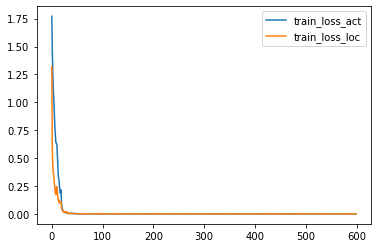

In [47]:
# train loss act vs loc
train_loss_act_df = pd.DataFrame(train_loss_act)
train_loss_act_df = train_loss_act_df.rename(columns={0:'train_loss_act'})
train_loss_loc_df = pd.DataFrame(train_loss_loc)
train_loss_loc_df = train_loss_loc_df.rename(columns={0:'train_loss_loc'})
pd.concat([train_loss_act_df,train_loss_loc_df], axis=1).plot()

<AxesSubplot:>

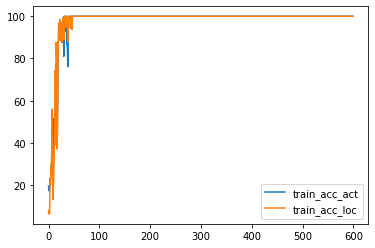

In [48]:
# train acc act vs loc
train_acc_act_df = pd.DataFrame(train_acc_act)
train_acc_act_df = train_acc_act_df.rename(columns={0:'train_acc_act'})
train_acc_loc_df = pd.DataFrame(train_acc_loc)
train_acc_loc_df = train_acc_loc_df.rename(columns={0:'train_acc_loc'})
pd.concat([train_acc_act_df,train_acc_loc_df], axis=1).plot()

<AxesSubplot:>

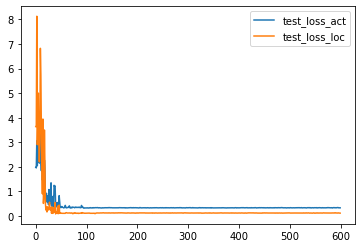

In [49]:
# test loss act vs loc
test_loss_act_df = pd.DataFrame(test_loss_act)
test_loss_act_df = test_loss_act_df.rename(columns={0:'test_loss_act'})
test_loss_loc_df = pd.DataFrame(test_loss_loc)
test_loss_loc_df = test_loss_loc_df.rename(columns={0:'test_loss_loc'})
pd.concat([test_loss_act_df,test_loss_loc_df], axis=1).plot()

<AxesSubplot:>

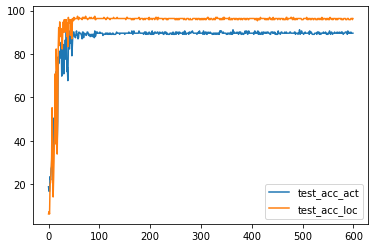

In [50]:
# test acc act vs loc
test_acc_act_df = pd.DataFrame(test_acc_act)
test_acc_act_df = test_acc_act_df.rename(columns={0:'test_acc_act'})
test_acc_loc_df = pd.DataFrame(test_acc_loc)
test_acc_loc_df = test_acc_loc_df.rename(columns={0:'test_acc_loc'})
pd.concat([test_acc_act_df,test_acc_loc_df], axis=1).plot()

# Komparasi

## train

In [ ]:
#backup before replaced by resnet
# d_train_loss_act= train_loss_act
# d_train_loss_loc=train_loss_loc
# d_test_loss_act=test_loss_act
# d_test_loss_loc = test_loss_loc
# d_train_acc_act=train_acc_act
# d_train_acc_loc = train_acc_loc
# d_test_acc_act = test_acc_act
# d_test_acc_loc= test_acc_loc

<AxesSubplot:>

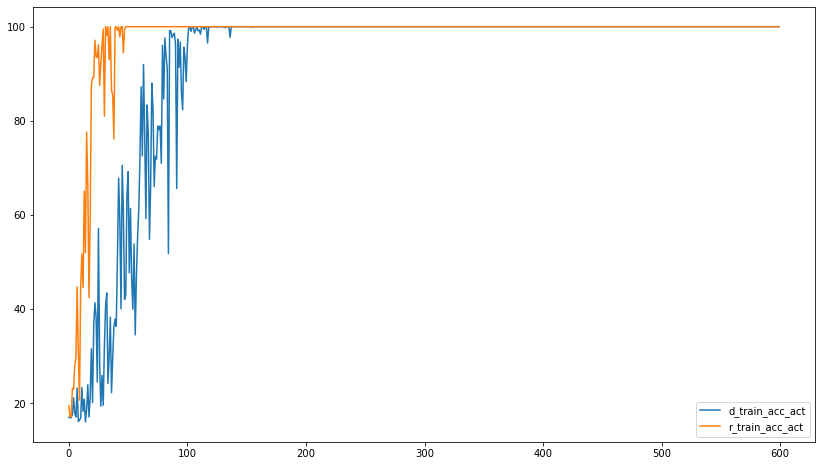

In [51]:
# train acc act
d_train_acc_act_df = pd.DataFrame(d_train_acc_act)
d_train_acc_act_df = d_train_acc_act_df.rename(columns={0:'d_train_acc_act'})
r_train_acc_act_df = pd.DataFrame(r_train_acc_act)
r_train_acc_act_df = r_train_acc_act_df.rename(columns={0:'r_train_acc_act'})
pd.concat([d_train_acc_act_df,r_train_acc_act_df], axis=1).plot(figsize=(14,8))

<AxesSubplot:>

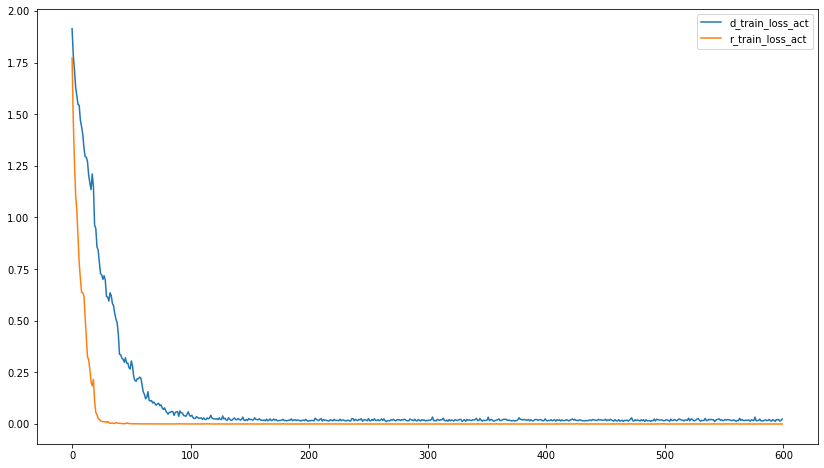

In [52]:
# train loss act
d_train_loss_act_df = pd.DataFrame(d_train_loss_act)
d_train_loss_act_df = d_train_loss_act_df.rename(columns={0:'d_train_loss_act'})
r_train_loss_act_df = pd.DataFrame(r_train_loss_act)
r_train_loss_act_df = r_train_loss_act_df.rename(columns={0:'r_train_loss_act'})
pd.concat([d_train_loss_act_df,r_train_loss_act_df], axis=1).plot(figsize=(14,8))

<AxesSubplot:>

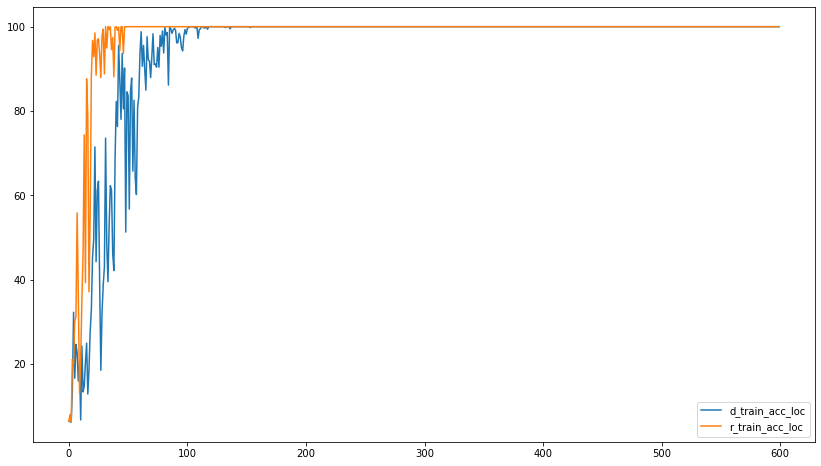

In [53]:
# train acc loc
d_train_acc_loc_df = pd.DataFrame(d_train_acc_loc)
d_train_acc_loc_df = d_train_acc_loc_df.rename(columns={0:'d_train_acc_loc'})
r_train_acc_loc_df = pd.DataFrame(r_train_acc_loc)
r_train_acc_loc_df = r_train_acc_loc_df.rename(columns={0:'r_train_acc_loc'})
pd.concat([d_train_acc_loc_df,r_train_acc_loc_df], axis=1).plot(figsize=(14,8))

<AxesSubplot:>

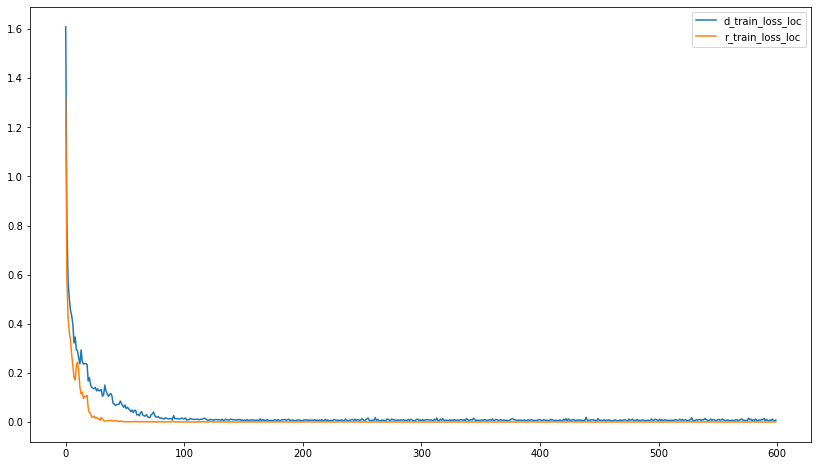

In [54]:
# train loss loc
d_train_loss_loc_df = pd.DataFrame(d_train_loss_loc)
d_train_loss_loc_df = d_train_loss_loc_df.rename(columns={0:'d_train_loss_loc'})
r_train_loss_loc_df = pd.DataFrame(r_train_loss_loc)
r_train_loss_loc_df = r_train_loss_loc_df.rename(columns={0:'r_train_loss_loc'})
pd.concat([d_train_loss_loc_df,r_train_loss_loc_df], axis=1).plot(figsize=(14,8))

## validation

<AxesSubplot:>

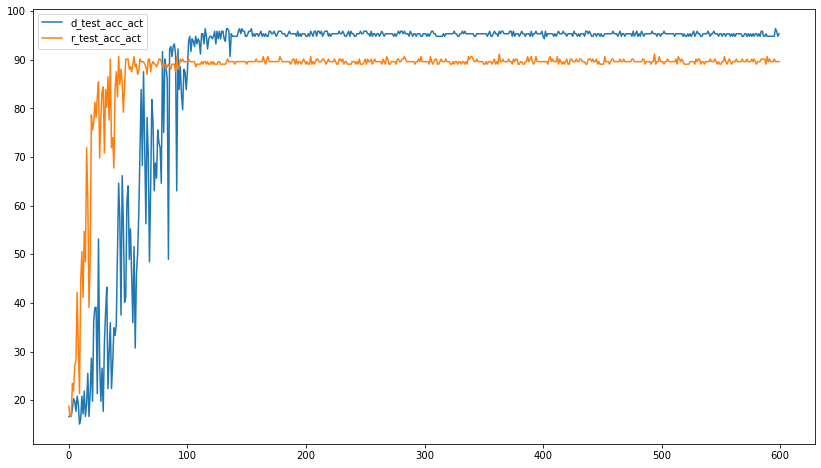

In [55]:
# val acc act
d_test_acc_act_df = pd.DataFrame(d_test_acc_act)
d_test_acc_act_df = d_test_acc_act_df.rename(columns={0:'d_test_acc_act'})
r_test_acc_act_df = pd.DataFrame(r_test_acc_act)
r_test_acc_act_df = r_test_acc_act_df.rename(columns={0:'r_test_acc_act'})
pd.concat([d_test_acc_act_df,r_test_acc_act_df], axis=1).plot(figsize=(14,8))

<AxesSubplot:>

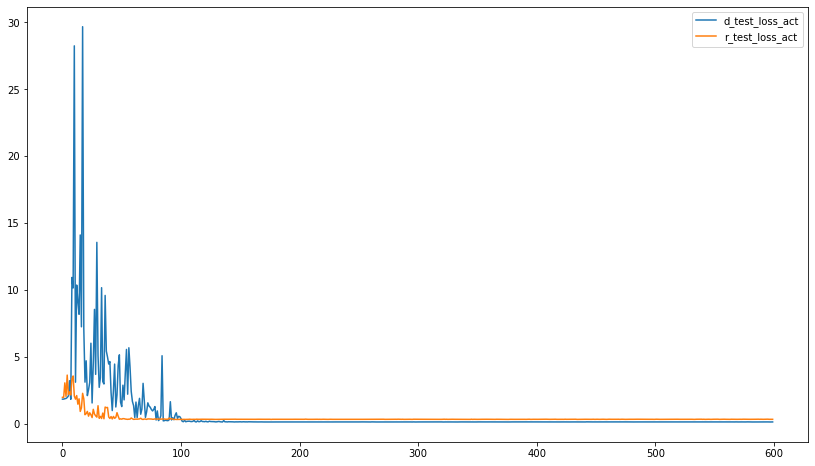

In [56]:
# val loss act
d_test_loss_act_df = pd.DataFrame(d_test_loss_act)
d_test_loss_act_df = d_test_loss_act_df.rename(columns={0:'d_test_loss_act'})
r_test_loss_act_df = pd.DataFrame(r_test_loss_act)
r_test_loss_act_df = r_test_loss_act_df.rename(columns={0:'r_test_loss_act'})
pd.concat([d_test_loss_act_df,r_test_loss_act_df], axis=1).plot(figsize=(14,8))

<AxesSubplot:>

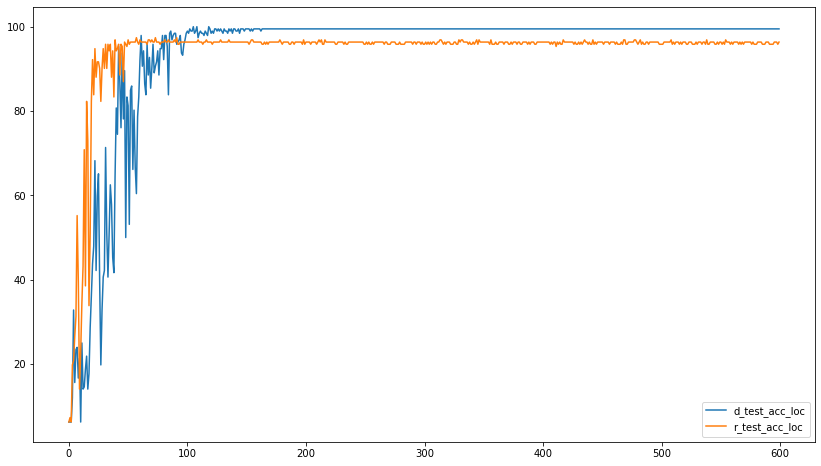

In [57]:
# val acc loc
d_test_acc_loc_df = pd.DataFrame(d_test_acc_loc)
d_test_acc_loc_df = d_test_acc_loc_df.rename(columns={0:'d_test_acc_loc'})
r_test_acc_loc_df = pd.DataFrame(r_test_acc_loc)
r_test_acc_loc_df = r_test_acc_loc_df.rename(columns={0:'r_test_acc_loc'})
pd.concat([d_test_acc_loc_df,r_test_acc_loc_df], axis=1).plot(figsize=(14,8))

<AxesSubplot:>

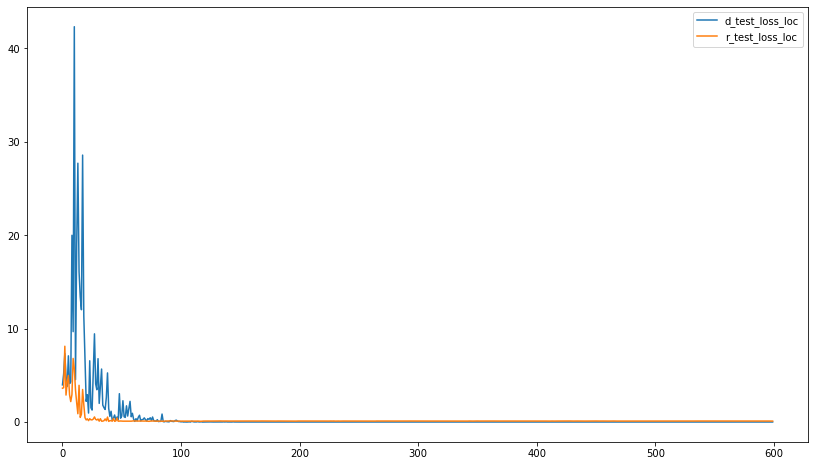

In [58]:
# val loss loc
d_test_loss_loc_df = pd.DataFrame(d_test_loss_loc)
d_test_loss_loc_df = d_test_loss_loc_df.rename(columns={0:'d_test_loss_loc'})
r_test_loss_loc_df = pd.DataFrame(r_test_loss_loc)
r_test_loss_loc_df = r_test_loss_loc_df.rename(columns={0:'r_test_loss_loc'})
pd.concat([d_test_loss_loc_df,r_test_loss_loc_df], axis=1).plot(figsize=(14,8))

# saving

In [59]:
d_train_loss_act

array([[1.91371216],
       [1.7862466 ],
       [1.71478287],
       [1.63117223],
       [1.58716407],
       [1.54674942],
       [1.54325213],
       [1.4699695 ],
       [1.43994115],
       [1.40333314],
       [1.33799284],
       [1.29472895],
       [1.29215744],
       [1.27004481],
       [1.2042615 ],
       [1.16756332],
       [1.13517506],
       [1.2107365 ],
       [1.14859273],
       [0.96251191],
       [0.94746065],
       [0.85820954],
       [0.84180736],
       [0.78166542],
       [0.72838145],
       [0.7218247 ],
       [0.70037143],
       [0.7182004 ],
       [0.69803074],
       [0.61757739],
       [0.61495702],
       [0.59550279],
       [0.6355413 ],
       [0.62303338],
       [0.58453693],
       [0.57234651],
       [0.53548608],
       [0.50771624],
       [0.49093872],
       [0.4350446 ],
       [0.33767794],
       [0.33641905],
       [0.31899661],
       [0.31389817],
       [0.29964522],
       [0.32118011],
       [0.29496073],
       [0.295

In [61]:
np.savetxt('d_train_loss_act.txt',d_train_loss_act)

In [62]:
np.savetxt('d_train_loss_act.txt',d_train_loss_act)
np.savetxt('d_train_loss_loc.txt',d_train_loss_loc)
np.savetxt('d_test_loss_act.txt',d_test_loss_act)
np.savetxt('d_test_loss_loc.txt',d_test_loss_loc)
np.savetxt('d_train_acc_act.txt',d_train_acc_act)
np.savetxt('d_train_acc_loc.txt',d_train_acc_loc)
np.savetxt('d_test_acc_act.txt',d_test_acc_act)
np.savetxt('d_test_acc_loc.txt',d_test_acc_loc)

In [63]:
np.savetxt('r_train_loss_act.txt',r_train_loss_act)
np.savetxt('r_train_loss_loc.txt',r_train_loss_loc)
np.savetxt('r_test_loss_act.txt',r_test_loss_act)
np.savetxt('r_test_loss_loc.txt',r_test_loss_loc)
np.savetxt('r_train_acc_act.txt',r_train_acc_act)
np.savetxt('r_train_acc_loc.txt',r_train_acc_loc)
np.savetxt('r_test_acc_act.txt',r_test_acc_act)
np.savetxt('r_test_acc_loc.txt',r_test_acc_loc)

# Load Model

In [64]:
test_batch_size = 512

In [2]:
test_data

NameError: name 'test_data' is not defined